# Trabajo Fin de Master

---

**Nombre y apellidos:** JOHAN DAVID HERNANDEZ RAMIREZ

**Usuario VIU:** jhernandezr@student.universidadviu.com

---

---
# Inicialización
---

## Importación de Librerias y carga de dataset

In [1]:
# Imports generales

import io
import pandas as pd
import numpy as np
import holidays
from datetime import timedelta
from numpy import corrcoef, transpose, arange
import plotly.express as px

import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import plotly.express as px
import seaborn as sns
from fitter import Fitter
from scipy.stats import beta
from scipy import stats

from pycaret import clustering
from pycaret.clustering import *

from scipy.stats import chi2_contingency

from sklearn.impute import KNNImputer
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
from sklearn.cluster import SpectralClustering
from sklearn.mixture._gaussian_mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier  
from sklearn.metrics import accuracy_score, classification_report 
import plotnine as p9

from mpl_toolkits.mplot3d import Axes3D

## Funciones

In [2]:
# Función para calcular cuartiles Q1 y Q3 y tratar outliers por límites superior e inferior
def treat_outliers(df, column_name, column_name_new):
    column = df[column_name]

    q1 = np.percentile(column, 25)
    q3 = np.percentile(column, 75)
    iqr = q3 - q1

    lower_limit = q1 - 1.5 * iqr
    upper_limit = q3 + 1.5 * iqr

    # Reemplazar valores atípicos en la columna especificada
    df[column_name_new] = np.where(column < lower_limit, lower_limit,
                                    np.where(column > upper_limit, upper_limit, column))

    return df

# Está función fue creada para la entrega de la primera práctica de la asignatura Míneria de Datos

In [3]:
df_original = pd.read_csv('data/registro_atencion_unidad_observacion_urgencia.csv')

In [4]:
df_original.head(10)

NumeroFactura  CodigoPrestador FechaIngreso HoraIngreso  CausaExterna  \
0        288306      50010217203   2019-12-26       23:38            13   
1    4129237242      50010425930   2019-12-21       05:17            13   
2    4129237242      50010425930   2019-12-23       07:29            13   
3    4129237242      50010425930   2019-12-29       12:47            13   
4    4129237242      50010425930   2019-12-29       09:16            13   
5    4129237242      50010425930   2019-12-20       04:23            13   
6      CL375831      50010909923   2019-12-16       07:31            13   
7        275951      50010217203   2019-11-17       14:49            13   
8        275947      50010217203   2019-11-17       14:49            13   
9    4129237242      50010425930   2019-12-29       05:36            13   

  CodigoDiagnosticoPrincipalSalida CodigoDiagnosticoRelN1Salida  \
0                             A059                         I48X   
1                             R509                         \"\"   
2                             N23X                         \"\"   
3                             S002                         \"\"   
4                             C698                         \"\"   
5                             I10X                         \"\"   
6                             S019                         S400   
7                             K831                         C257   
8                             K831                         C257   
9                             N23X                         N200   

  CodigoDiagnosticoRelN2Salida CodigoDiagnosticoRelN3Salida  DestinoUsuario  \
0                         \"\"                         \"\"               3   
1                         \"\"                         \"\"               1   
2                         \"\"                         \"\"               1   
3                         \"\"                         \"\"               1   
4                         \"\"                         \"\"               1   
5                         \"\"                         \"\"               1   
6                         Y040                         \"\"               1   
7                         \"\"                         \"\"               3   
8                         \"\"                         \"\"               3   
9                         \"\"                         \"\"               1   

   ...  HoraSalida CodigoEAPB TipoUsuario Edad UnidadMedidaEdad  Sexo  \
0  ...       13:55     EPS010           1   44                1     M   
1  ...       07:33     EPS010           1   45                1     M   
2  ...       11:25     EPS010           1   43                1     M   
3  ...       03:56     EPS010           1   44                1     M   
4  ...       10:00     EPS010           1   41                1     M   
5  ...       06:09     EPS010           1   40                1     M   
6  ...       11:50     EPS010           1   39                1     M   
7  ...       15:54     EPS010           1   91                1     M   
8  ...       15:54     EPS010           1   91                1     M   
9  ...       09:27     EPS010           1   42                1     M   

   CodDepto  CodMunicipio ZonaResidencia   Ano  
0         5             1              U  2019  
1         5             1              U  2019  
2         5             1              U  2019  
3         5             1              U  2019  
4         5             1              U  2019  
5         8             1              U  2019  
6         5             1              U  2019  
7         5             1              U  2019  
8         5             1              U  2019  
9         5            88              U  2019  

[10 rows x 23 columns]

In [5]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1708104 entries, 0 to 1708103
Data columns (total 23 columns):
 #   Column                            Dtype 
---  ------                            ----- 
 0   NumeroFactura                     object
 1   CodigoPrestador                   int64 
 2   FechaIngreso                      object
 3   HoraIngreso                       object
 4   CausaExterna                      int64 
 5   CodigoDiagnosticoPrincipalSalida  object
 6   CodigoDiagnosticoRelN1Salida      object
 7   CodigoDiagnosticoRelN2Salida      object
 8   CodigoDiagnosticoRelN3Salida      object
 9   DestinoUsuario                    int64 
 10  EstadoSalida                      int64 
 11  CausaBasicaMuerteUrgencias        object
 12  FechaSalida                       object
 13  HoraSalida                        object
 14  CodigoEAPB                        object
 15  TipoUsuario                       int64 
 16  Edad                              int64 
 17  UnidadMe

In [6]:
print(f"El tamaño del conjunto de datos es: {df_original.shape[0]} filas y {df_original.shape[1]} columnas")

El tamaño del conjunto de datos es: 1708104 filas y 23 columnas


La descripción y explicación del dataset y sus columnas se encuentran disponibles en el archivo json con el nombre "diccionario_registro_atencion_unidad_observacion_urgencias"

In [7]:
# Identificar tipos de variables
numeric_cols = df_original.select_dtypes(include=np.number).columns.tolist()
categorical_cols = df_original.select_dtypes(include='object').columns.tolist()

# Imprimir las variables de cada tipo
print("Variables numéricas:")
print(numeric_cols)

print("\nVariables categóricas:")
print(categorical_cols)
# Está sesión de código fue creado para la entrega de la primera práctica de la asignatura Míneria de Datos

Variables numéricas:
['CodigoPrestador', 'CausaExterna', 'DestinoUsuario', 'EstadoSalida', 'TipoUsuario', 'Edad', 'UnidadMedidaEdad', 'Ano']

Variables categóricas:
['NumeroFactura', 'FechaIngreso', 'HoraIngreso', 'CodigoDiagnosticoPrincipalSalida', 'CodigoDiagnosticoRelN1Salida', 'CodigoDiagnosticoRelN2Salida', 'CodigoDiagnosticoRelN3Salida', 'CausaBasicaMuerteUrgencias', 'FechaSalida', 'HoraSalida', 'CodigoEAPB', 'Sexo', 'CodDepto', 'CodMunicipio', 'ZonaResidencia']


In [8]:
df_original.describe()

CodigoPrestador  CausaExterna  DestinoUsuario  EstadoSalida  \
count     1.708104e+06  1.708104e+06    1.708104e+06  1.708104e+06   
mean      5.001043e+10  1.215118e+01    1.431796e+00  1.025470e+00   
std       4.946561e+05  2.998387e+00    8.193293e-01  1.575488e-01   
min       5.001012e+10  1.000000e+00    1.000000e+00  1.000000e+00   
25%       5.001022e+10  1.300000e+01    1.000000e+00  1.000000e+00   
50%       5.001022e+10  1.300000e+01    1.000000e+00  1.000000e+00   
75%       5.001043e+10  1.300000e+01    1.000000e+00  1.000000e+00   
max       5.001851e+10  1.500000e+01    3.000000e+00  2.000000e+00   

        TipoUsuario          Edad  UnidadMedidaEdad           Ano  
count  1.708104e+06  1.708104e+06      1.708104e+06  1.708104e+06  
mean   1.983753e+00  3.968092e+01      1.026717e+00  2.020355e+03  
std    1.377455e+00  2.391889e+01      1.725662e-01  1.212279e+00  
min    1.000000e+00  0.000000e+00      1.000000e+00  2.019000e+03  
25%    1.000000e+00  2.200000e+01      1.000000e+00  2.019000e+03  
50%    1.000000e+00  3.500000e+01      1.000000e+00  2.020000e+03  
75%    2.000000e+00  5.900000e+01      1.000000e+00  2.022000e+03  
max    8.000000e+00  1.820000e+02      3.000000e+00  2.022000e+03

In [9]:
Preprocess_df = df_original.copy()

Duplicamos el dataset para no perder los datos originales, esta es una práctica que me gustar seguir para volver a ejecutar el código nuevamente y no perder los datos originales.

## Análisis de datos faltantes

In [10]:
Preprocess_df.shape

(1708104, 23)

In [11]:
Preprocess_df.isnull().sum()


NumeroFactura                            0
CodigoPrestador                          0
FechaIngreso                             0
HoraIngreso                              0
CausaExterna                             0
CodigoDiagnosticoPrincipalSalida         0
CodigoDiagnosticoRelN1Salida        516710
CodigoDiagnosticoRelN2Salida        633391
CodigoDiagnosticoRelN3Salida        670736
DestinoUsuario                           0
EstadoSalida                             0
CausaBasicaMuerteUrgencias          668684
FechaSalida                              0
HoraSalida                               0
CodigoEAPB                               0
TipoUsuario                              0
Edad                                     0
UnidadMedidaEdad                         0
Sexo                                     0
CodDepto                                33
CodMunicipio                            33
ZonaResidencia                           0
Ano                                      0
dtype: int6

En el análisis de valores nulos presentado, se observa que la mayoría de las columnas no contienen datos faltantes, lo que sugiere un buen nivel de integridad en esos campos. Sin embargo, algunas columnas presentan una cantidad significativa de valores nulos:

- CodigoDiagnosticoRelN1Salida, CodigoDiagnosticoRelN2Salida, y CodigoDiagnosticoRelN3Salida tienen un gran número de valores faltantes (516,710; 633,391; y 670,736, respectivamente), lo cual puede indicar que los diagnósticos relacionados no siempre se registran o no aplican en ciertos casos.

- CausaBasicaMuerteUrgencias también muestra una cantidad elevada de valores nulos (668,684), lo que podría reflejar que este dato solo se completa en situaciones específicas, como fallecimientos.

- CodDepto y CodMunicipio presentan 33 valores faltantes cada uno, sin embargo dado el número tan bajo vamos a proceder a eliminar estos registros.

In [12]:
Preprocess_df = Preprocess_df.dropna(subset=['CodDepto', 'CodMunicipio'])

In [13]:
Preprocess_df.isnull().sum()

NumeroFactura                            0
CodigoPrestador                          0
FechaIngreso                             0
HoraIngreso                              0
CausaExterna                             0
CodigoDiagnosticoPrincipalSalida         0
CodigoDiagnosticoRelN1Salida        516679
CodigoDiagnosticoRelN2Salida        633358
CodigoDiagnosticoRelN3Salida        670703
DestinoUsuario                           0
EstadoSalida                             0
CausaBasicaMuerteUrgencias          668651
FechaSalida                              0
HoraSalida                               0
CodigoEAPB                               0
TipoUsuario                              0
Edad                                     0
UnidadMedidaEdad                         0
Sexo                                     0
CodDepto                                 0
CodMunicipio                             0
ZonaResidencia                           0
Ano                                      0
dtype: int6

In [14]:
Preprocess_df.shape

(1708071, 23)

## Indentificación de valores duplicados

In [15]:
Preprocess_df[Preprocess_df.duplicated(keep=False)]

NumeroFactura  CodigoPrestador FechaIngreso HoraIngreso  CausaExterna  \
5586          1009594      50010558603   2021-05-12       09:23            15   
5587          1009594      50010558603   2021-05-12       09:23            15   
7651         CP179362      50010209201   2022-12-12       17:22            13   
7881         TP302799      50010209202   2022-10-05       07:35            13   
7882         TP302799      50010209202   2022-10-05       07:35            13   
...               ...              ...          ...         ...           ...   
1688152       1058368      50010558603   2021-11-09       13:54            15   
1688153       1058368      50010558603   2021-11-09       13:54            15   
1688289       1058368      50010558603   2021-11-11       23:50            15   
1688290       1058368      50010558603   2021-11-11       23:50            15   
1688294       1058368      50010558603   2021-11-11       23:50            15   

        CodigoDiagnosticoPrincipalSalida CodigoDiagnosticoRelN1Salida  \
5586                                R18X                         \"\"   
5587                                R18X                         \"\"   
7651                                N201                          NaN   
7881                                D630                          NaN   
7882                                D630                          NaN   
...                                  ...                          ...   
1688152                             C509                         \"\"   
1688153                             C509                         \"\"   
1688289                             C509                         \"\"   
1688290                             C509                         \"\"   
1688294                             C509                         \"\"   

        CodigoDiagnosticoRelN2Salida CodigoDiagnosticoRelN3Salida  \
5586                            \"\"                         \"\"   
5587                            \"\"                         \"\"   
7651                             NaN                          NaN   
7881                             NaN                          NaN   
7882                             NaN                          NaN   
...                              ...                          ...   
1688152                         \"\"                         \"\"   
1688153                         \"\"                         \"\"   
1688289                         \"\"                         \"\"   
1688290                         \"\"                         \"\"   
1688294                         \"\"                         \"\"   

         DestinoUsuario  ...  HoraSalida CodigoEAPB TipoUsuario Edad  \
5586                  1  ...       16:50     EPS040           1   60   
5587                  1  ...       16:50     EPS040           1   60   
7651                  3  ...       17:59     RES004           5   56   
7881                  1  ...       06:13     EMP002           5   55   
7882                  1  ...       06:13     EMP002           5   55   
...                 ...  ...         ...        ...         ...  ...   
1688152               3  ...       18:21     EPSS40           2   45   
1688153               3  ...       18:21     EPSS40           2   45   
1688289               3  ...       17:24     EPSS40           2   49   
1688290               3  ...       17:24     EPSS40           2   49   
1688294               3  ...       17:24     EPSS40           2   49   

        UnidadMedidaEdad  Sexo  CodDepto  CodMunicipio ZonaResidencia   Ano  
5586                   1     F         5           266              U  2021  
5587                   1     F         5           266              U  2021  
7651                   1     M         5             1              U  2022  
7881                   1     F         5             1              U  2022  
7882                   1     F         5             1              U  202

In [16]:
Preprocess_df[Preprocess_df['NumeroFactura']=='TP302799']

NumeroFactura  CodigoPrestador FechaIngreso HoraIngreso  CausaExterna  \
7881      TP302799      50010209202   2022-10-05       07:35            13   
7882      TP302799      50010209202   2022-10-05       07:35            13   

     CodigoDiagnosticoPrincipalSalida CodigoDiagnosticoRelN1Salida  \
7881                             D630                          NaN   
7882                             D630                          NaN   

     CodigoDiagnosticoRelN2Salida CodigoDiagnosticoRelN3Salida  \
7881                          NaN                          NaN   
7882                          NaN                          NaN   

      DestinoUsuario  ...  HoraSalida CodigoEAPB TipoUsuario Edad  \
7881               1  ...       06:13     EMP002           5   55   
7882               1  ...       06:13     EMP002           5   55   

     UnidadMedidaEdad  Sexo  CodDepto  CodMunicipio ZonaResidencia   Ano  
7881                1     F         5             1              U  2022  
7882                1     F         5             1              U  2022  

[2 rows x 23 columns]

Vamos a proceder a eliminar los valores duplicados

In [17]:
# Eliminar duplicados dejando solo un registro de las instancias duplicadas
Preprocess_df = Preprocess_df.drop_duplicates(keep='first')

In [18]:
Preprocess_df[Preprocess_df['NumeroFactura']=='TP302799']

NumeroFactura  CodigoPrestador FechaIngreso HoraIngreso  CausaExterna  \
7881      TP302799      50010209202   2022-10-05       07:35            13   

     CodigoDiagnosticoPrincipalSalida CodigoDiagnosticoRelN1Salida  \
7881                             D630                          NaN   

     CodigoDiagnosticoRelN2Salida CodigoDiagnosticoRelN3Salida  \
7881                          NaN                          NaN   

      DestinoUsuario  ...  HoraSalida CodigoEAPB TipoUsuario Edad  \
7881               1  ...       06:13     EMP002           5   55   

     UnidadMedidaEdad  Sexo  CodDepto  CodMunicipio ZonaResidencia   Ano  
7881                1     F         5             1              U  2022  

[1 rows x 23 columns]

In [19]:
Preprocess_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1702897 entries, 0 to 1708103
Data columns (total 23 columns):
 #   Column                            Dtype 
---  ------                            ----- 
 0   NumeroFactura                     object
 1   CodigoPrestador                   int64 
 2   FechaIngreso                      object
 3   HoraIngreso                       object
 4   CausaExterna                      int64 
 5   CodigoDiagnosticoPrincipalSalida  object
 6   CodigoDiagnosticoRelN1Salida      object
 7   CodigoDiagnosticoRelN2Salida      object
 8   CodigoDiagnosticoRelN3Salida      object
 9   DestinoUsuario                    int64 
 10  EstadoSalida                      int64 
 11  CausaBasicaMuerteUrgencias        object
 12  FechaSalida                       object
 13  HoraSalida                        object
 14  CodigoEAPB                        object
 15  TipoUsuario                       int64 
 16  Edad                              int64 
 17  UnidadMedidaE

In [20]:
# Calcular el porcentaje de instancias conservadas
total_instancias = 1708071
instancias_conservadas = 1701763
porcentaje_conservado = (instancias_conservadas / total_instancias) * 100
porcentaje_conservado

99.63069450860064

Después de eliminar los registros duplicados, se conservaron aproximadamente el 99.63% de las instancias originales. Esto indica que la eliminación de duplicados tuvo un impacto mínimo en el tamaño total del DataFrame, dado el gran número de registros iniciales

## Limpieza de Columnas "CodDepto" y "CodMunicipio"

Vamos a limpiar y a homologar los códigos de ambos columnas, de igual manera basados en BD del estado traeremos el nombre de cada departamento y municipio para análisis univariante

In [21]:
# Base de datos Facilitada por Fenalcoantioquia
cod_muni_dpto = pd.read_excel('data/cod municipios departamentos.xlsx')

In [22]:
cod_muni_dpto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1126 entries, 0 to 1125
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   CódigoDepartamento                        1126 non-null   int64  
 1   CódigoMunicipio                           1126 non-null   int64  
 2   Departamento                              1126 non-null   object 
 3   Municipio                                 1126 non-null   object 
 4   cod_2                                     923 non-null    float64
 5   cod_unificado                             1126 non-null   int64  
 6   Region_departamento                       1126 non-null   object 
 7   Cobertura servicios básicos departamento  1126 non-null   object 
 8   Clasifiación casos municipio              1126 non-null   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 79.3+ KB


In [23]:
cod_muni_dpto

CódigoDepartamento  CódigoMunicipio Departamento   Municipio  cod_2  \
0                      5                2    Antioquia   ABEJORRAL    2.0   
1                      5                4    Antioquia    ABRIAQUI    4.0   
2                      5               21    Antioquia  ALEJANDRIA   21.0   
3                      5               30    Antioquia       AMAGA   30.0   
4                      5               31    Antioquia      AMALFI   31.0   
...                  ...              ...          ...         ...    ...   
1121                  17              665       Caldas    SAN JOSE  665.0   
1122                  17              777       Caldas       SUPIA  777.0   
1123                  17              867       Caldas    VICTORIA  867.0   
1124                  17              873       Caldas  VILLAMARIA  873.0   
1125                  17              877       Caldas     VITERBO    NaN   

      cod_unificado Region_departamento  \
0               502              Andina   
1               504              Andina   
2              5021              Andina   
3              5030              Andina   
4              5031              Andina   
...             ...                 ...   
1121         170665              Andina   
1122         170777              Andina   
1123         170867              Andina   
1124         170873              Andina   
1125         170877              Andina   

     Cobertura servicios básicos departamento Clasifiación casos municipio  
0                                        Alta                        Medio  
1                                        Alta                     Muy Bajo  
2                                        Alta                         Bajo  
3                                        Alta                        Medio  
4                                        Alta                         Bajo  
...                                       ...                          ...  
1121                                     Alta                     Muy Bajo  
1122                                     Alta                     Muy Bajo  
1123                                     Alta                     Muy Bajo  
1124                                     Alta                     Muy Bajo  
1125                                     Alta                     Muy Bajo  

[1126 rows x 9 columns]

In [24]:
# Limpieza de nombres y Homologación
cod_muni_dpto['Departamento'] = cod_muni_dpto['Departamento'].str.strip().str.upper()
cod_muni_dpto['Municipio'] = cod_muni_dpto['Municipio'].str.strip().str.upper()

In [25]:
lista_cod_dep = Preprocess_df.CodDepto.unique()
lista_cod_dep

array([5, 8, 17, 11, 76, 23, 73, 27, 54, 13, 15, 66, 68, 50, 47, 70, 20,
       44, 81, 91, 25, 52, 63, 19, 88, 41, 85, 95, 86, 97, 18, 0.0, 99,
       94.0, '05', '11', '15', '23', '27', '47', '76', '73', '17', '68',
       '19', '41', '13', '66', '63', '54', '70', '52', '85', '88', '25',
       '\\"\\"', '20', '95'], dtype=object)

In [26]:
Preprocess_df['CodDepto'] = Preprocess_df['CodDepto'].replace('05','5')

In [27]:
# Suponiendo que 'CodDepto' es la columna con valores problemáticos
Preprocess_df['CodDepto'] = Preprocess_df['CodDepto'].apply(
    lambda x: pd.to_numeric(x, errors='coerce') if isinstance(x, str) else x
)

In [28]:
Preprocess_df.isnull().sum()

NumeroFactura                            0
CodigoPrestador                          0
FechaIngreso                             0
HoraIngreso                              0
CausaExterna                             0
CodigoDiagnosticoPrincipalSalida         0
CodigoDiagnosticoRelN1Salida        516173
CodigoDiagnosticoRelN2Salida        632830
CodigoDiagnosticoRelN3Salida        670170
DestinoUsuario                           0
EstadoSalida                             0
CausaBasicaMuerteUrgencias          668178
FechaSalida                              0
HoraSalida                               0
CodigoEAPB                               0
TipoUsuario                              0
Edad                                     0
UnidadMedidaEdad                         0
Sexo                                     0
CodDepto                                 1
CodMunicipio                             0
ZonaResidencia                           0
Ano                                      0
dtype: int6

In [29]:
Preprocess_df[Preprocess_df['CodDepto'].isnull()]

NumeroFactura  CodigoPrestador FechaIngreso HoraIngreso  CausaExterna  \
1369295    HM80076942      50010217501   2020-03-08       01:42             7   

        CodigoDiagnosticoPrincipalSalida CodigoDiagnosticoRelN1Salida  \
1369295                             S212                         \"\"   

        CodigoDiagnosticoRelN2Salida CodigoDiagnosticoRelN3Salida  \
1369295                         \"\"                         \"\"   

         DestinoUsuario  ...  HoraSalida CodigoEAPB TipoUsuario Edad  \
1369295               1  ...       11:33     EPSS40           1   18   

        UnidadMedidaEdad  Sexo  CodDepto  CodMunicipio ZonaResidencia   Ano  
1369295                1     M       NaN          \"\"              U  2020  

[1 rows x 23 columns]

Este registro tampoco tiene el código del municipio por lo cual vamos a eliminar este registro

In [30]:
# Eliminar el registro donde 'CodDepto' es nulo
Preprocess_df = Preprocess_df[Preprocess_df['CodDepto'].notnull()]

In [31]:
Preprocess_df.isnull().sum()

NumeroFactura                            0
CodigoPrestador                          0
FechaIngreso                             0
HoraIngreso                              0
CausaExterna                             0
CodigoDiagnosticoPrincipalSalida         0
CodigoDiagnosticoRelN1Salida        516173
CodigoDiagnosticoRelN2Salida        632830
CodigoDiagnosticoRelN3Salida        670170
DestinoUsuario                           0
EstadoSalida                             0
CausaBasicaMuerteUrgencias          668178
FechaSalida                              0
HoraSalida                               0
CodigoEAPB                               0
TipoUsuario                              0
Edad                                     0
UnidadMedidaEdad                         0
Sexo                                     0
CodDepto                                 0
CodMunicipio                             0
ZonaResidencia                           0
Ano                                      0
dtype: int6

In [32]:
Preprocess_df['CodMunicipio'] = Preprocess_df['CodMunicipio'].astype('int')

In [33]:
lista_cod_mun = Preprocess_df.CodMunicipio.unique()
lista_cod_mun

array([  1,  88, 129, 631, 266, 360, 380,  45, 212, 308,   2, 847,  34,
       154,  40, 792, 660, 240, 364, 483, 425, 649, 667, 615, 264, 756,
       761, 890,  79, 125, 318, 887,  91, 347, 142, 679, 837,  36, 809,
       209, 664, 893,  93, 237, 591, 686,  13, 190, 690, 284, 234, 147,
       854, 543, 501,  30, 321, 361, 579, 642, 665,  31,  42, 736, 842,
        77, 790, 585, 647, 400, 858, 480, 670, 411, 604,  44, 282, 871,
       197, 353, 313, 148, 674, 104, 390, 440, 656, 697, 113, 255, 673,
       607, 572, 150,  87, 206, 376, 541,  86, 368, 138, 101,  38,  51,
        55, 659, 789, 172,   4, 490, 217, 576, 215, 777, 107, 807, 276,
       306, 885, 861, 652, 662, 819, 310, 475, 892, 658, 628, 467, 430,
       315, 856, 120, 145, 683, 570, 131, 689, 250, 705, 794, 620, 134,
       687,  81, 754, 245, 495, 682, 372, 381, 834, 621, 109, 743, 175,
       701, 614, 450, 466,  83, 675,  75, 750, 787, 388, 555, 174, 824,
       513,  73, 130,  99, 160, 126, 655, 612, 899, 600, 110,   

In [34]:
# Convertir a DataFrame y ordenar para verifica que los datos quedaron correctos
df_cod_mun = pd.DataFrame(sorted(Preprocess_df.CodMunicipio.unique()), columns=['CodMunicipio'])

# Mostrar el DataFrame
df_cod_mun

CodMunicipio
0               0
1               1
2               2
3               3
4               4
..            ...
459           893
460           894
461           895
462           898
463           899

[464 rows x 1 columns]

In [35]:
.

SyntaxError: invalid syntax (1933637684.py, line 1)

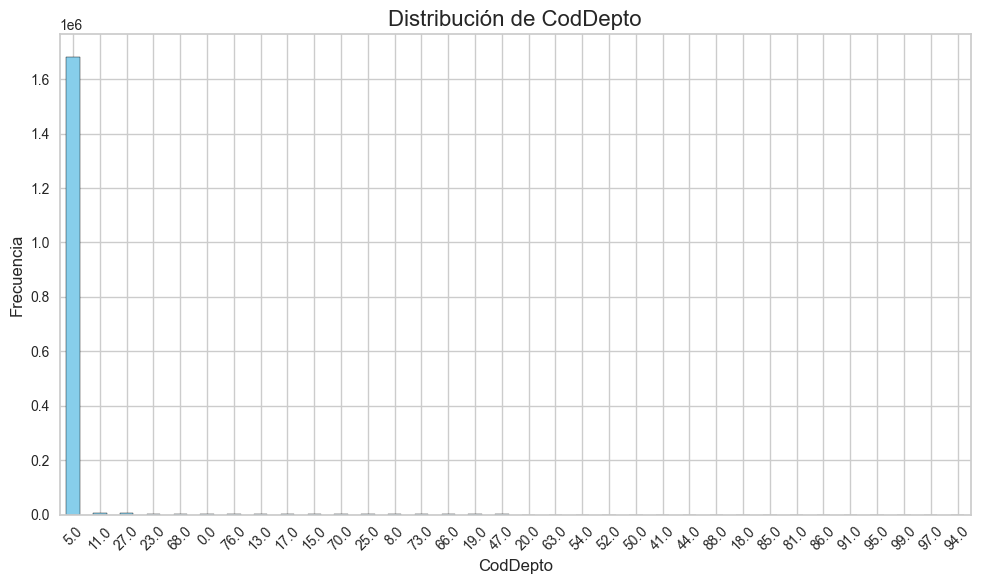

In [36]:
# Contar los valores únicos de CodDepto
value_counts = Preprocess_df.CodDepto.value_counts()

# Crear la gráfica de barras
plt.figure(figsize=(10, 6))
value_counts.plot(kind='bar', color='skyblue', edgecolor='black')

# Agregar título y etiquetas
plt.title('Distribución de CodDepto', fontsize=16)
plt.xlabel('CodDepto', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)

# Mostrar la gráfica
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x si es necesario
plt.tight_layout()
plt.show()


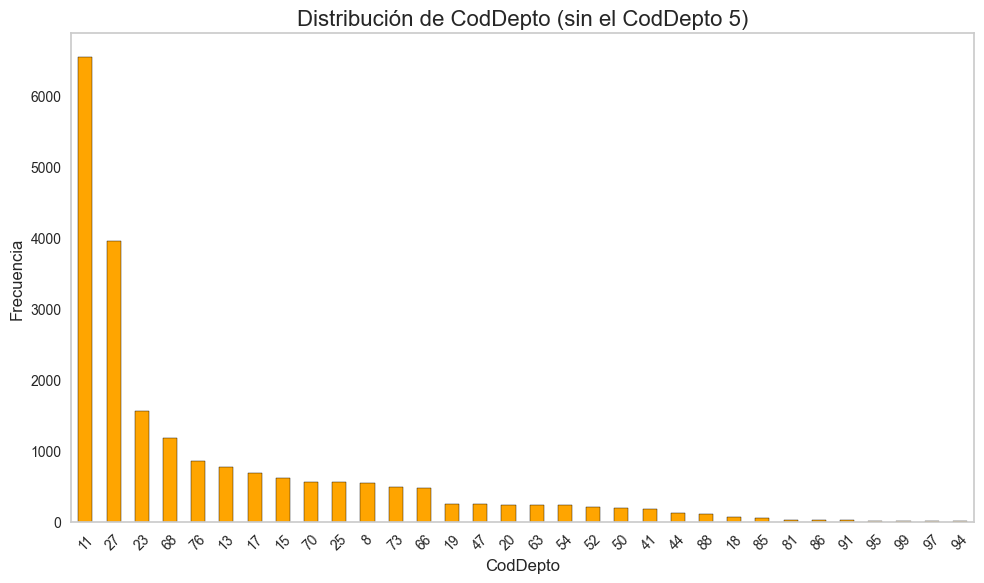

In [73]:
# Filtrar los valores donde CodDepto no es 5
filtered_value_counts = Preprocess_df[Preprocess_df.CodDepto != 5].CodDepto.value_counts()

# Crear la gráfica de barras
plt.figure(figsize=(10, 6))
filtered_value_counts.plot(kind='bar', color='orange', edgecolor='black')

# Agregar título y etiquetas
plt.title('Distribución de CodDepto (sin el CodDepto 5)', fontsize=16)
plt.xlabel('CodDepto', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)

# Mostrar la gráfica
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x si es necesario
plt.tight_layout()
plt.grid(False)
plt.show()


In [ ]:
# Filtrar los valores donde CodDepto no es 5
filtered_value_counts = Preprocess_df[Preprocess_df.CodDepto != 5].CodDepto.value_counts()

In [38]:
# cod_dpto = cod_muni_dpto.drop_duplicates(subset='CódigoDepartamento', keep='first')
# cod_mun = cod_muni_dpto.drop_duplicates(subset='CódigoMunicipio', keep='first')

In [39]:
cod_dpto = cod_muni_dpto.copy()
cod_mun = cod_muni_dpto.copy()

In [40]:
cod_mun

CódigoDepartamento  CódigoMunicipio Departamento   Municipio  cod_2  \
0                      5                2    ANTIOQUIA   ABEJORRAL    2.0   
1                      5                4    ANTIOQUIA    ABRIAQUI    4.0   
2                      5               21    ANTIOQUIA  ALEJANDRIA   21.0   
3                      5               30    ANTIOQUIA       AMAGA   30.0   
4                      5               31    ANTIOQUIA      AMALFI   31.0   
...                  ...              ...          ...         ...    ...   
1121                  17              665       CALDAS    SAN JOSE  665.0   
1122                  17              777       CALDAS       SUPIA  777.0   
1123                  17              867       CALDAS    VICTORIA  867.0   
1124                  17              873       CALDAS  VILLAMARIA  873.0   
1125                  17              877       CALDAS     VITERBO    NaN   

      cod_unificado Region_departamento  \
0               502              Andina   
1               504              Andina   
2              5021              Andina   
3              5030              Andina   
4              5031              Andina   
...             ...                 ...   
1121         170665              Andina   
1122         170777              Andina   
1123         170867              Andina   
1124         170873              Andina   
1125         170877              Andina   

     Cobertura servicios básicos departamento Clasifiación casos municipio  
0                                        Alta                        Medio  
1                                        Alta                     Muy Bajo  
2                                        Alta                         Bajo  
3                                        Alta                        Medio  
4                                        Alta                         Bajo  
...                                       ...                          ...  
1121                                     Alta                     Muy Bajo  
1122                                     Alta                     Muy Bajo  
1123                                     Alta                     Muy Bajo  
1124                                     Alta                     Muy Bajo  
1125                                     Alta                     Muy Bajo  

[1126 rows x 9 columns]

In [41]:
Preprocess_df['CodDepto'] = Preprocess_df['CodDepto'].astype(int)
Preprocess_df['CodMunicipio'] = Preprocess_df['CodMunicipio'].astype(int)
Preprocess_df['cod_unificado'] = Preprocess_df['CodDepto'].astype(str) + '0' + Preprocess_df['CodMunicipio'].astype(str)
Preprocess_df['cod_unificado'] = Preprocess_df['cod_unificado'].astype(int)

In [42]:
Preprocess_df.head(2)

NumeroFactura  CodigoPrestador FechaIngreso HoraIngreso  CausaExterna  \
0        288306      50010217203   2019-12-26       23:38            13   
1    4129237242      50010425930   2019-12-21       05:17            13   

  CodigoDiagnosticoPrincipalSalida CodigoDiagnosticoRelN1Salida  \
0                             A059                         I48X   
1                             R509                         \"\"   

  CodigoDiagnosticoRelN2Salida CodigoDiagnosticoRelN3Salida  DestinoUsuario  \
0                         \"\"                         \"\"               3   
1                         \"\"                         \"\"               1   

   ...  CodigoEAPB TipoUsuario Edad UnidadMedidaEdad Sexo  CodDepto  \
0  ...      EPS010           1   44                1    M         5   
1  ...      EPS010           1   45                1    M         5   

   CodMunicipio  ZonaResidencia   Ano  cod_unificado  
0             1               U  2019            501  
1             1               U  2019            501  

[2 rows x 24 columns]

In [43]:
Preprocess_df = Preprocess_df.merge(cod_dpto[['cod_unificado', 'Departamento', 'Municipio', 'Region_departamento', 'Cobertura servicios básicos departamento', 
                                              'Clasifiación casos municipio']], left_on='cod_unificado', right_on='cod_unificado', how='left')

In [44]:
Preprocess_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1702896 entries, 0 to 1702895
Data columns (total 29 columns):
 #   Column                                    Dtype 
---  ------                                    ----- 
 0   NumeroFactura                             object
 1   CodigoPrestador                           int64 
 2   FechaIngreso                              object
 3   HoraIngreso                               object
 4   CausaExterna                              int64 
 5   CodigoDiagnosticoPrincipalSalida          object
 6   CodigoDiagnosticoRelN1Salida              object
 7   CodigoDiagnosticoRelN2Salida              object
 8   CodigoDiagnosticoRelN3Salida              object
 9   DestinoUsuario                            int64 
 10  EstadoSalida                              int64 
 11  CausaBasicaMuerteUrgencias                object
 12  FechaSalida                               object
 13  HoraSalida                                object
 14  CodigoEAPB        

In [45]:
# Preprocess_df = Preprocess_df.merge(cod_mun[['CódigoMunicipio', 'Municipio']], left_on='CodMunicipio', right_on='CódigoMunicipio', how='left')

In [46]:
Preprocess_df.isnull().sum()

NumeroFactura                                    0
CodigoPrestador                                  0
FechaIngreso                                     0
HoraIngreso                                      0
CausaExterna                                     0
CodigoDiagnosticoPrincipalSalida                 0
CodigoDiagnosticoRelN1Salida                516173
CodigoDiagnosticoRelN2Salida                632830
CodigoDiagnosticoRelN3Salida                670170
DestinoUsuario                                   0
EstadoSalida                                     0
CausaBasicaMuerteUrgencias                  668178
FechaSalida                                      0
HoraSalida                                       0
CodigoEAPB                                       0
TipoUsuario                                      0
Edad                                             0
UnidadMedidaEdad                                 0
Sexo                                             0
CodDepto                       

In [47]:
Preprocess_df[Preprocess_df['Departamento'].isnull()]

NumeroFactura  CodigoPrestador FechaIngreso HoraIngreso  CausaExterna  \
22318        CP188104      50010209201   2022-12-10       12:18            13   
30823         3676262      50010214401   2019-07-25       22:52            13   
30824         3676268      50010214401   2019-07-25       22:52            13   
30825         3676274      50010214401   2019-07-25       22:52            13   
32713         3676322      50010214401   2019-07-25       22:52            13   
...               ...              ...          ...         ...           ...   
1681387       3752726      50010214401   2021-02-24       13:50            13   
1693982       1065808      50010558603   2021-10-27       04:05            15   
1693983       1058055      50010558603   2021-10-30       11:15            15   
1693984       1065806      50010558603   2021-10-22       10:14            15   
1700761       3753318      50010214401   2021-02-25       18:55            15   

        CodigoDiagnosticoPrincipalSalida CodigoDiagnosticoRelN1Salida  \
22318                               N390                         R509   
30823                               K632                         K632   
30824                               K632                         K632   
30825                               K632                         K632   
32713                               K632                         K632   
...                                  ...                          ...   
1681387                             Z321                         O200   
1693982                             C679                         \"\"   
1693983                             N390                         \"\"   
1693984                             C679                         \"\"   
1700761                             O054                         \"\"   

        CodigoDiagnosticoRelN2Salida CodigoDiagnosticoRelN3Salida  \
22318                            NaN                          NaN   
30823                           K509                         J939   
30824                           K509                         J939   
30825                           K509                         J939   
32713                           K509                         J939   
...                              ...                          ...   
1681387                         \"\"                         \"\"   
1693982                         \"\"                         \"\"   
1693983                         \"\"                         \"\"   
1693984                         \"\"                         \"\"   
1700761                         \"\"                         \"\"   

         DestinoUsuario  ...  CodDepto CodMunicipio ZonaResidencia   Ano  \
22318                 1  ...        27          450              U  2022   
30823                 3  ...        27          160              U  2019   
30824                 3  ...        27          160              U  2019   
30825                 3  ...        27          160              U  2019   
32713                 3  ...        27          160              U  2019   
...                 ...  ...       ...          ...            ...   ...   
1681387               1  ...        52          480              U  2021   
1693982               1  ...         5           87              U  2021   
1693983               3  ...         5           87              U  2021   
1693984               1  ...         5           87              U  2021   
1700761               1  ...        52          480              U  2021   

        cod_unificado  Departamento  Municipio  Region_departamento  \
22318          270450           NaN        NaN                  NaN   
30823          270160           NaN        NaN                  NaN   
30824          270160           NaN        NaN                  NaN   
30825          270160           NaN        NaN                  NaN   
32713          270160           NaN        NaN               

In [48]:
Preprocess_df = Preprocess_df.dropna(subset=['Departamento', 'Municipio'])

In [49]:
Preprocess_df.isnull().sum()

NumeroFactura                                    0
CodigoPrestador                                  0
FechaIngreso                                     0
HoraIngreso                                      0
CausaExterna                                     0
CodigoDiagnosticoPrincipalSalida                 0
CodigoDiagnosticoRelN1Salida                515035
CodigoDiagnosticoRelN2Salida                631687
CodigoDiagnosticoRelN3Salida                669019
DestinoUsuario                                   0
EstadoSalida                                     0
CausaBasicaMuerteUrgencias                  667030
FechaSalida                                      0
HoraSalida                                       0
CodigoEAPB                                       0
TipoUsuario                                      0
Edad                                             0
UnidadMedidaEdad                                 0
Sexo                                             0
CodDepto                       

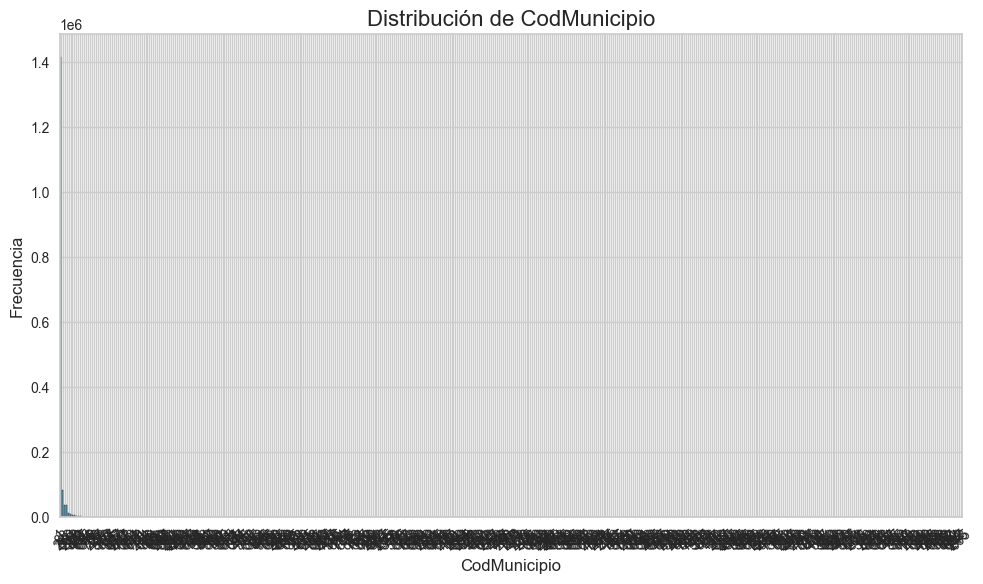

In [50]:
# Contar los valores únicos de CodMunicipio
value_counts = Preprocess_df.CodMunicipio.value_counts()

# Crear la gráfica de barras
plt.figure(figsize=(10, 6))
value_counts.plot(kind='bar', color='skyblue', edgecolor='black')

# Agregar título y etiquetas
plt.title('Distribución de CodMunicipio', fontsize=16)
plt.xlabel('CodMunicipio', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)

# Mostrar la gráfica
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x si es necesario
plt.tight_layout()
plt.show()

In [51]:
# value_counts_municipios = Preprocess_df.cod_unificado.value_counts().reset_index()
# value_counts_municipios.to_csv('C:/Users/Johan/Downloads/value_counts_municipios.csv') 

In [52]:
# df_1 = Preprocess_df[Preprocess_df['CódigoDepartamento'].isnull()]
# df_1['CodDepto'].value_counts()

Podemos ver que los valores nulos, hacen referencia a códigos con valores 0.0 lo que sugiere que el código de Departamento y de Municipio no están identificados por lo cúal procederemos a eliminar

In [53]:
# # Eliminar el registro donde 'CodDepto' 0.0
# Preprocess_df = Preprocess_df[Preprocess_df['CódigoDepartamento'].notnull()]

In [54]:
Preprocess_df.isnull().sum()

NumeroFactura                                    0
CodigoPrestador                                  0
FechaIngreso                                     0
HoraIngreso                                      0
CausaExterna                                     0
CodigoDiagnosticoPrincipalSalida                 0
CodigoDiagnosticoRelN1Salida                515035
CodigoDiagnosticoRelN2Salida                631687
CodigoDiagnosticoRelN3Salida                669019
DestinoUsuario                                   0
EstadoSalida                                     0
CausaBasicaMuerteUrgencias                  667030
FechaSalida                                      0
HoraSalida                                       0
CodigoEAPB                                       0
TipoUsuario                                      0
Edad                                             0
UnidadMedidaEdad                                 0
Sexo                                             0
CodDepto                       

In [55]:
df_2 = Preprocess_df[Preprocess_df['Municipio'].isnull()]
df_2['CodMunicipio'].value_counts()

Series([], Name: count, dtype: int64)

In [56]:
# Contar el número de registros por departamento
registros_por_departamento = Preprocess_df.groupby('Departamento').size().reset_index()
registros_por_departamento = registros_por_departamento.rename(columns={0:'Cantidad'}).sort_values(by='Cantidad', ascending=False)

# Mostrar el resultado
registros_por_departamento

Departamento  Cantidad
1            ANTIOQUIA   1680281
26  SANTA FE DE BOGOTÁ      6539
11               CHOCO      3945
12             CORDOBA      1561
27           SANTANDER      1172
4              BOLIVAR      1080
30     VALLE DEL CAUCA       853
6               CALDAS       681
5               BOYACA       613
28               SUCRE       563
13        CUNDINAMARCA       557
3            ATLANTICO       539
29              TOLIMA       492
24           RISARALDA       478
9                CAUCA       254
18           MAGDALENA       246
23             QUINDIO       235
10               CESAR       235
21  NORTE DE SANTANDER       232
20              NARIÑO       212
19                META       197
16               HUILA       181
17          LA GUAJIRA       118
25          SAN ANDRES       108
7              CAQUETA        63
8             CASANARE        51
2               ARAUCA        31
22            PUTUMAYO        23
0             AMAZONAS        22
15            GUAVIARE        17
32             VICHADA         5
14             GUAINIA         4
31              VAUPES         4

In [69]:
registros_por_departamento.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33 entries, 1 to 31
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Departamento  33 non-null     object
 1   Cantidad      33 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 792.0+ bytes


<Figure size 1000x600 with 0 Axes>

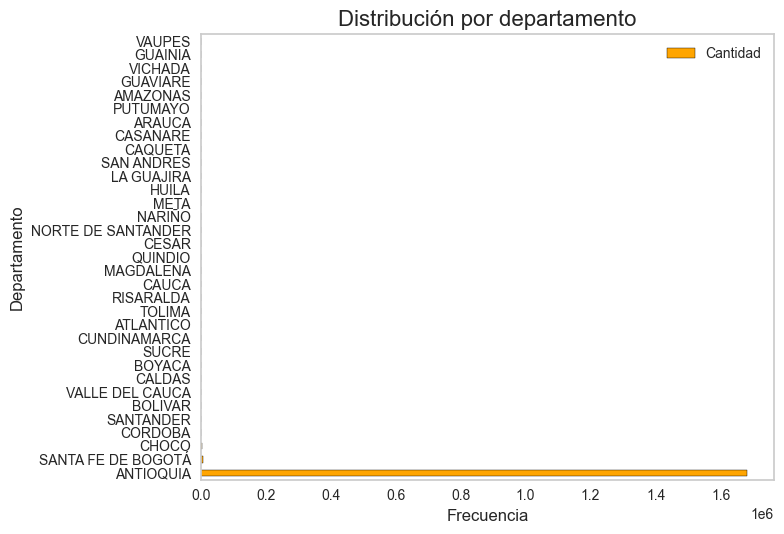

In [72]:
# Crear la gráfica de barras horizontales
plt.figure(figsize=(10, 6))
registros_por_departamento.plot(kind='barh', x='Departamento', y='Cantidad', color='orange', edgecolor='black')

# Agregar título y etiquetas
plt.title('Distribución por departamento', fontsize=16)
plt.xlabel('Frecuencia', fontsize=12)
plt.ylabel('Departamento', fontsize=12)

# Mostrar la gráfica
plt.tight_layout()
plt.grid(False)
plt.show()



In [75]:
filtered_value_counts

Departamento
SANTA FE DE BOGOTÁ    1
CHOCO                 1
GUAINIA               1
VICHADA               1
GUAVIARE              1
AMAZONAS              1
PUTUMAYO              1
ARAUCA                1
CASANARE              1
CAQUETA               1
SAN ANDRES            1
LA GUAJIRA            1
HUILA                 1
META                  1
NARIÑO                1
NORTE DE SANTANDER    1
CESAR                 1
QUINDIO               1
MAGDALENA             1
CAUCA                 1
RISARALDA             1
TOLIMA                1
ATLANTICO             1
CUNDINAMARCA          1
SUCRE                 1
BOYACA                1
CALDAS                1
VALLE DEL CAUCA       1
BOLIVAR               1
SANTANDER             1
CORDOBA               1
VAUPES                1
Name: count, dtype: int64

In [76]:
registros_por_departamento[registros_por_departamento['Departamento'] != 'ANTIOQUIA']

Departamento  Cantidad
26  SANTA FE DE BOGOTÁ      6539
11               CHOCO      3945
12             CORDOBA      1561
27           SANTANDER      1172
4              BOLIVAR      1080
30     VALLE DEL CAUCA       853
6               CALDAS       681
5               BOYACA       613
28               SUCRE       563
13        CUNDINAMARCA       557
3            ATLANTICO       539
29              TOLIMA       492
24           RISARALDA       478
9                CAUCA       254
18           MAGDALENA       246
23             QUINDIO       235
10               CESAR       235
21  NORTE DE SANTANDER       232
20              NARIÑO       212
19                META       197
16               HUILA       181
17          LA GUAJIRA       118
25          SAN ANDRES       108
7              CAQUETA        63
8             CASANARE        51
2               ARAUCA        31
22            PUTUMAYO        23
0             AMAZONAS        22
15            GUAVIARE        17
32             VICHADA         5
14             GUAINIA         4
31              VAUPES         4

<Figure size 1000x600 with 0 Axes>

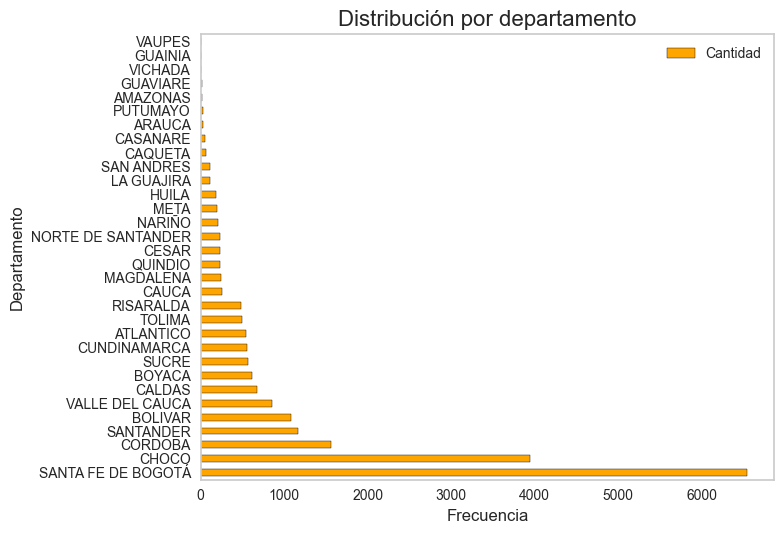

In [77]:
# Filtrar los valores donde Departamento no es 5
filtered_value_counts = registros_por_departamento[registros_por_departamento['Departamento'] != 'ANTIOQUIA']

# Crear la gráfica de barras horizontales
plt.figure(figsize=(10, 6))
filtered_value_counts.plot(kind='barh', x='Departamento', y='Cantidad', color='orange', edgecolor='black')

# Agregar título y etiquetas
plt.title('Distribución por departamento', fontsize=16)
plt.xlabel('Frecuencia', fontsize=12)
plt.ylabel('Departamento', fontsize=12)

# Mostrar la gráfica
plt.tight_layout()
plt.grid(False)
plt.show()

In [78]:
# Contar el número de registros por departamento
registros_por_municipios = Preprocess_df.groupby('Municipio').size().reset_index()
registros_por_municipios = registros_por_municipios.rename(columns={0:'Cantidad'}).sort_values(by='Cantidad', ascending=False)

# Mostrar el resultado
registros_por_municipios

Municipio  Cantidad
351     MEDELLIN   1400804
74         BELLO     85437
214     ENVIGADO     38884
272       ITAGUI     37583
498     SABANETA     14387
..           ...       ...
585     SANTIAGO         1
380         MUZO         1
587  SANTO TOMAS         1
169      CORINTO         1
224      FOMEQUE         1

[698 rows x 2 columns]

<Figure size 1000x600 with 0 Axes>

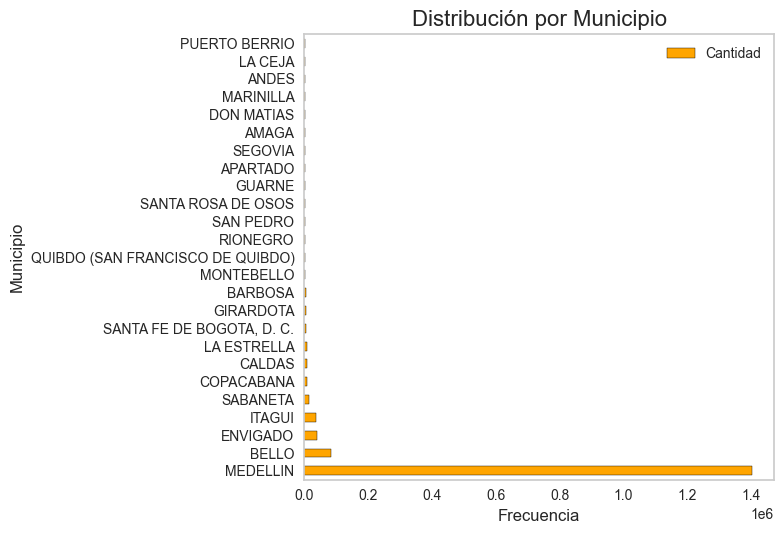

In [82]:
# Filtrar los valores donde Departamento no es 5
filtered_value_counts = registros_por_municipios[registros_por_municipios['Municipio'] != 'FOMEQUE'].head(25)

# Crear la gráfica de barras horizontales
plt.figure(figsize=(10, 6))
filtered_value_counts.plot(kind='barh', x='Municipio', y='Cantidad', color='orange', edgecolor='black')

# Agregar título y etiquetas
plt.title('Distribución por Municipio', fontsize=16)
plt.xlabel('Frecuencia', fontsize=12)
plt.ylabel('Municipio', fontsize=12)

# Mostrar la gráfica
plt.tight_layout()
plt.grid(False)
plt.show()

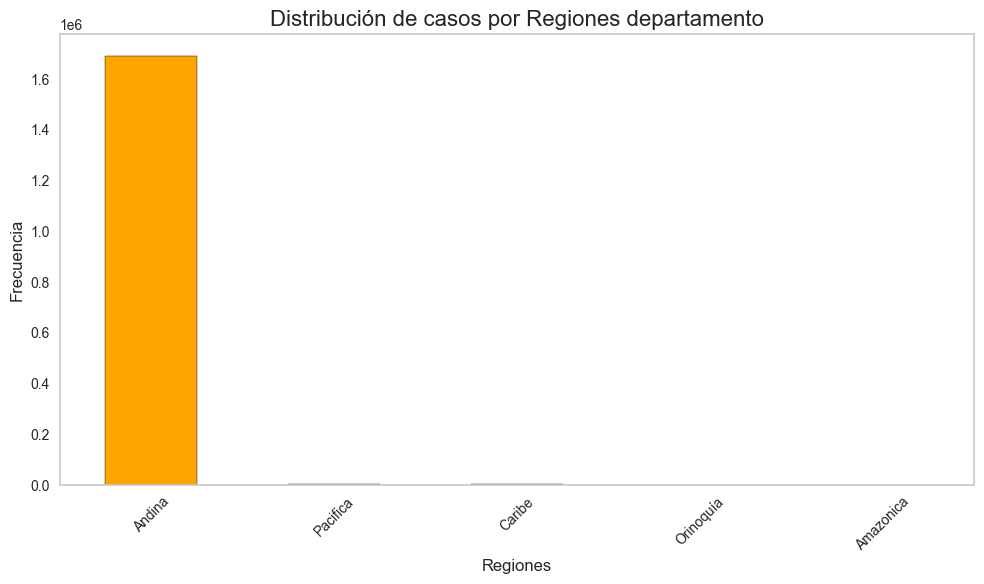

In [ ]:
# Contar los valores únicos de CodMunicipio
value_counts = Preprocess_df.Region_departamento.value_counts()

# Crear la gráfica de barras
plt.figure(figsize=(10, 6))
value_counts.plot(kind='bar', color='orange', edgecolor='black')

# Agregar título y etiquetas
plt.title('Distribución de casos por Regiones departamento', fontsize=16)
plt.xlabel('Regiones', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)

# Mejorar diseño
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x si es necesario
plt.grid(False)  # Quitar las líneas de la cuadrícula
plt.tight_layout()

# Mostrar la gráfica
plt.show()


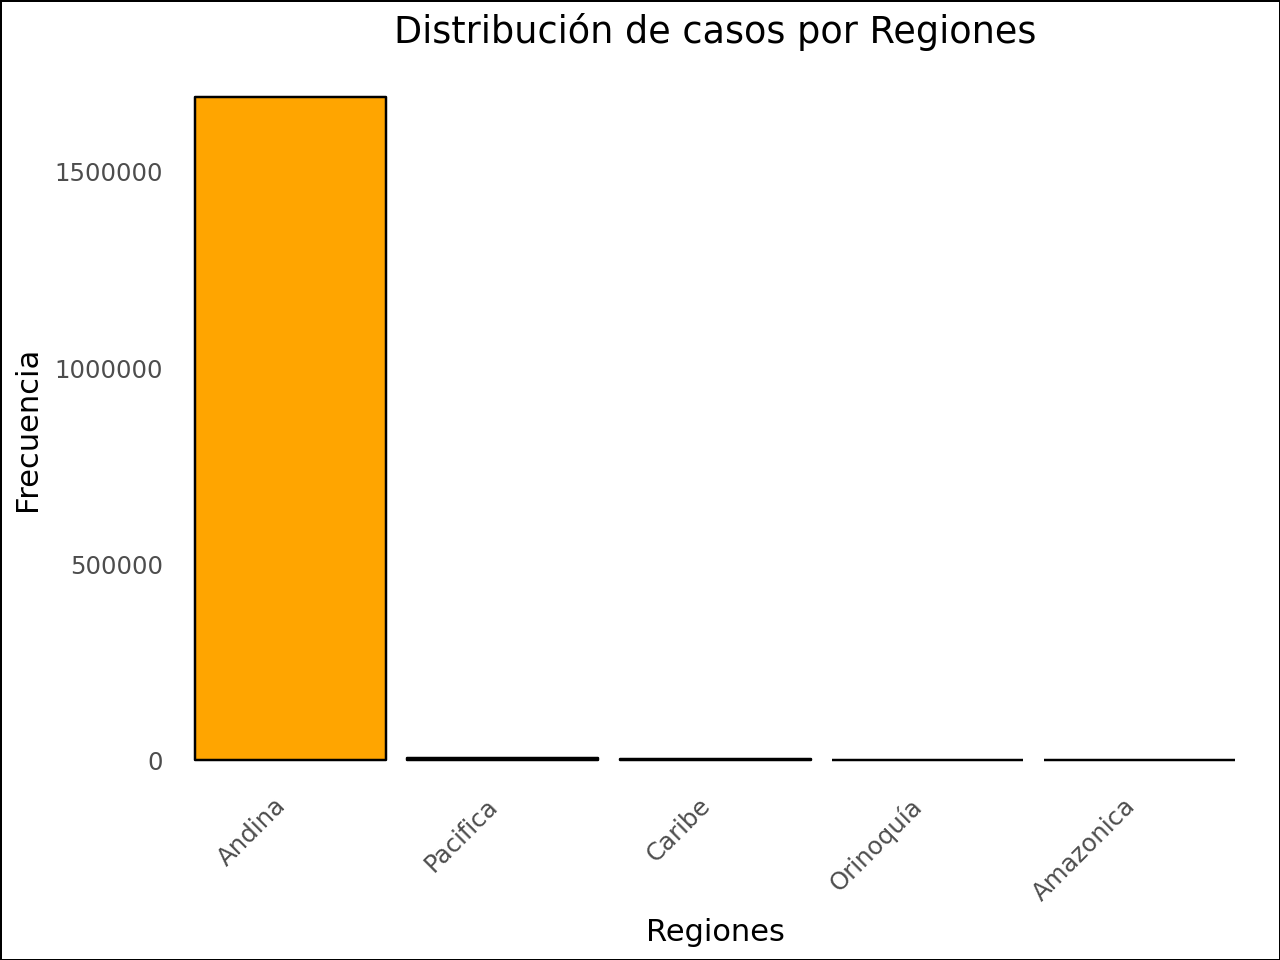

In [ ]:
import pandas as pd
import plotnine as p9


# Contar los valores únicos
value_counts = Preprocess_df['Region_departamento'].value_counts().reset_index()
value_counts.columns = ['Region_departamento', 'Frecuencia']
value_counts =value_counts.sort_values(by='Frecuencia', ascending=False)

# Convertir la columna en categoría ordenada
value_counts['Region_departamento'] = pd.Categorical(
    value_counts['Region_departamento'],
    categories=value_counts['Region_departamento'],
    ordered=True
)

# Crear la gráfica con ggplot
plot = (
    p9.ggplot(value_counts, p9.aes(x='Region_departamento', y='Frecuencia')) +
    p9.geom_bar(stat='identity', fill='orange', color='black') +
    p9.theme_minimal() +
    p9.theme(
        axis_text_x=p9.element_text(rotation=45, hjust=1),
        panel_grid_major=p9.element_blank(),  # Quitar líneas de cuadrícula
        panel_grid_minor=p9.element_blank(),
        panel_background=p9.element_rect(fill='white', color=None),  # Fondo blanco
        plot_background=p9.element_rect(fill='white', color=None)
    ) +
    p9.labs(title="Distribución de casos por Regiones",
            x="Regiones",
            y="Frecuencia")
)

# Mostrar el gráfico
plot



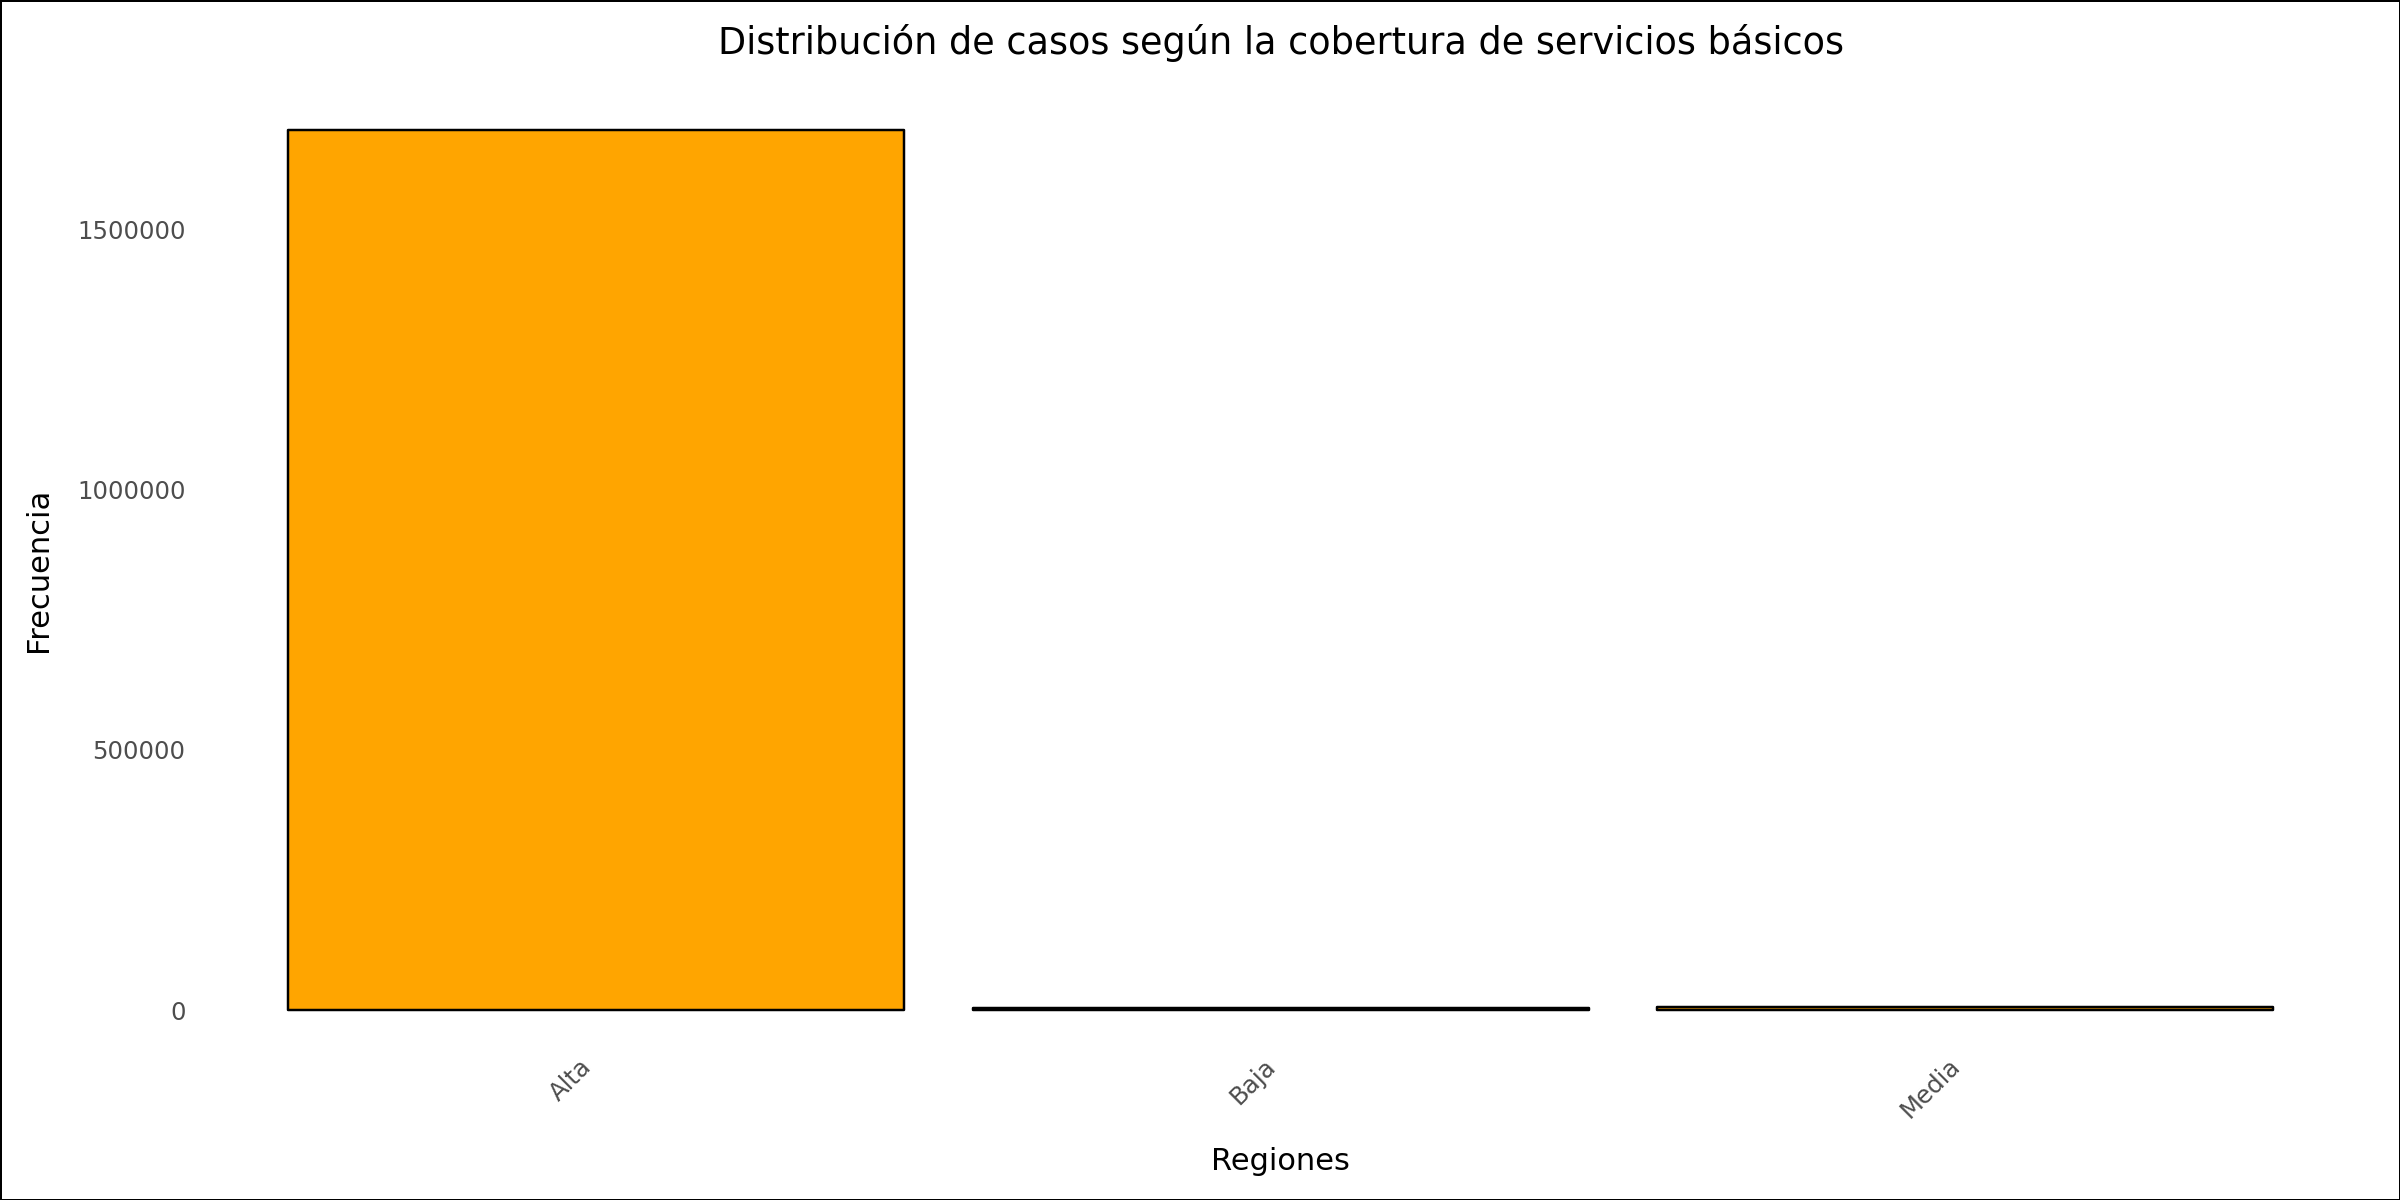

In [ ]:
# Contar los valores únicos
value_counts = Preprocess_df['Cobertura servicios básicos departamento'].value_counts().reset_index()
value_counts.columns = ['Cobertura servicios básicos departamento', 'Frecuencia']

# Crear la gráfica con ggplot
plot = (
    p9.ggplot(value_counts, p9.aes(x='Cobertura servicios básicos departamento', y='Frecuencia')) +
    p9.geom_bar(stat='identity', fill='orange', color='black') +
    p9.theme_minimal() +
    p9.theme(
        figure_size=(12, 6),  # Cambiar tamaño de la figura (ancho x alto en pulgadas)
        axis_text_x=p9.element_text(rotation=45, hjust=1),
        panel_grid_major=p9.element_blank(),  # Quitar líneas de cuadrícula
        panel_grid_minor=p9.element_blank(),
        panel_background=p9.element_rect(fill='white', color=None),  # Fondo blanco
        plot_background=p9.element_rect(fill='white', color=None)
    ) +
    p9.labs(title="Distribución de casos según la cobertura de servicios básicos",
            x="Regiones",
            y="Frecuencia")
)

# Mostrar el gráfico
plot

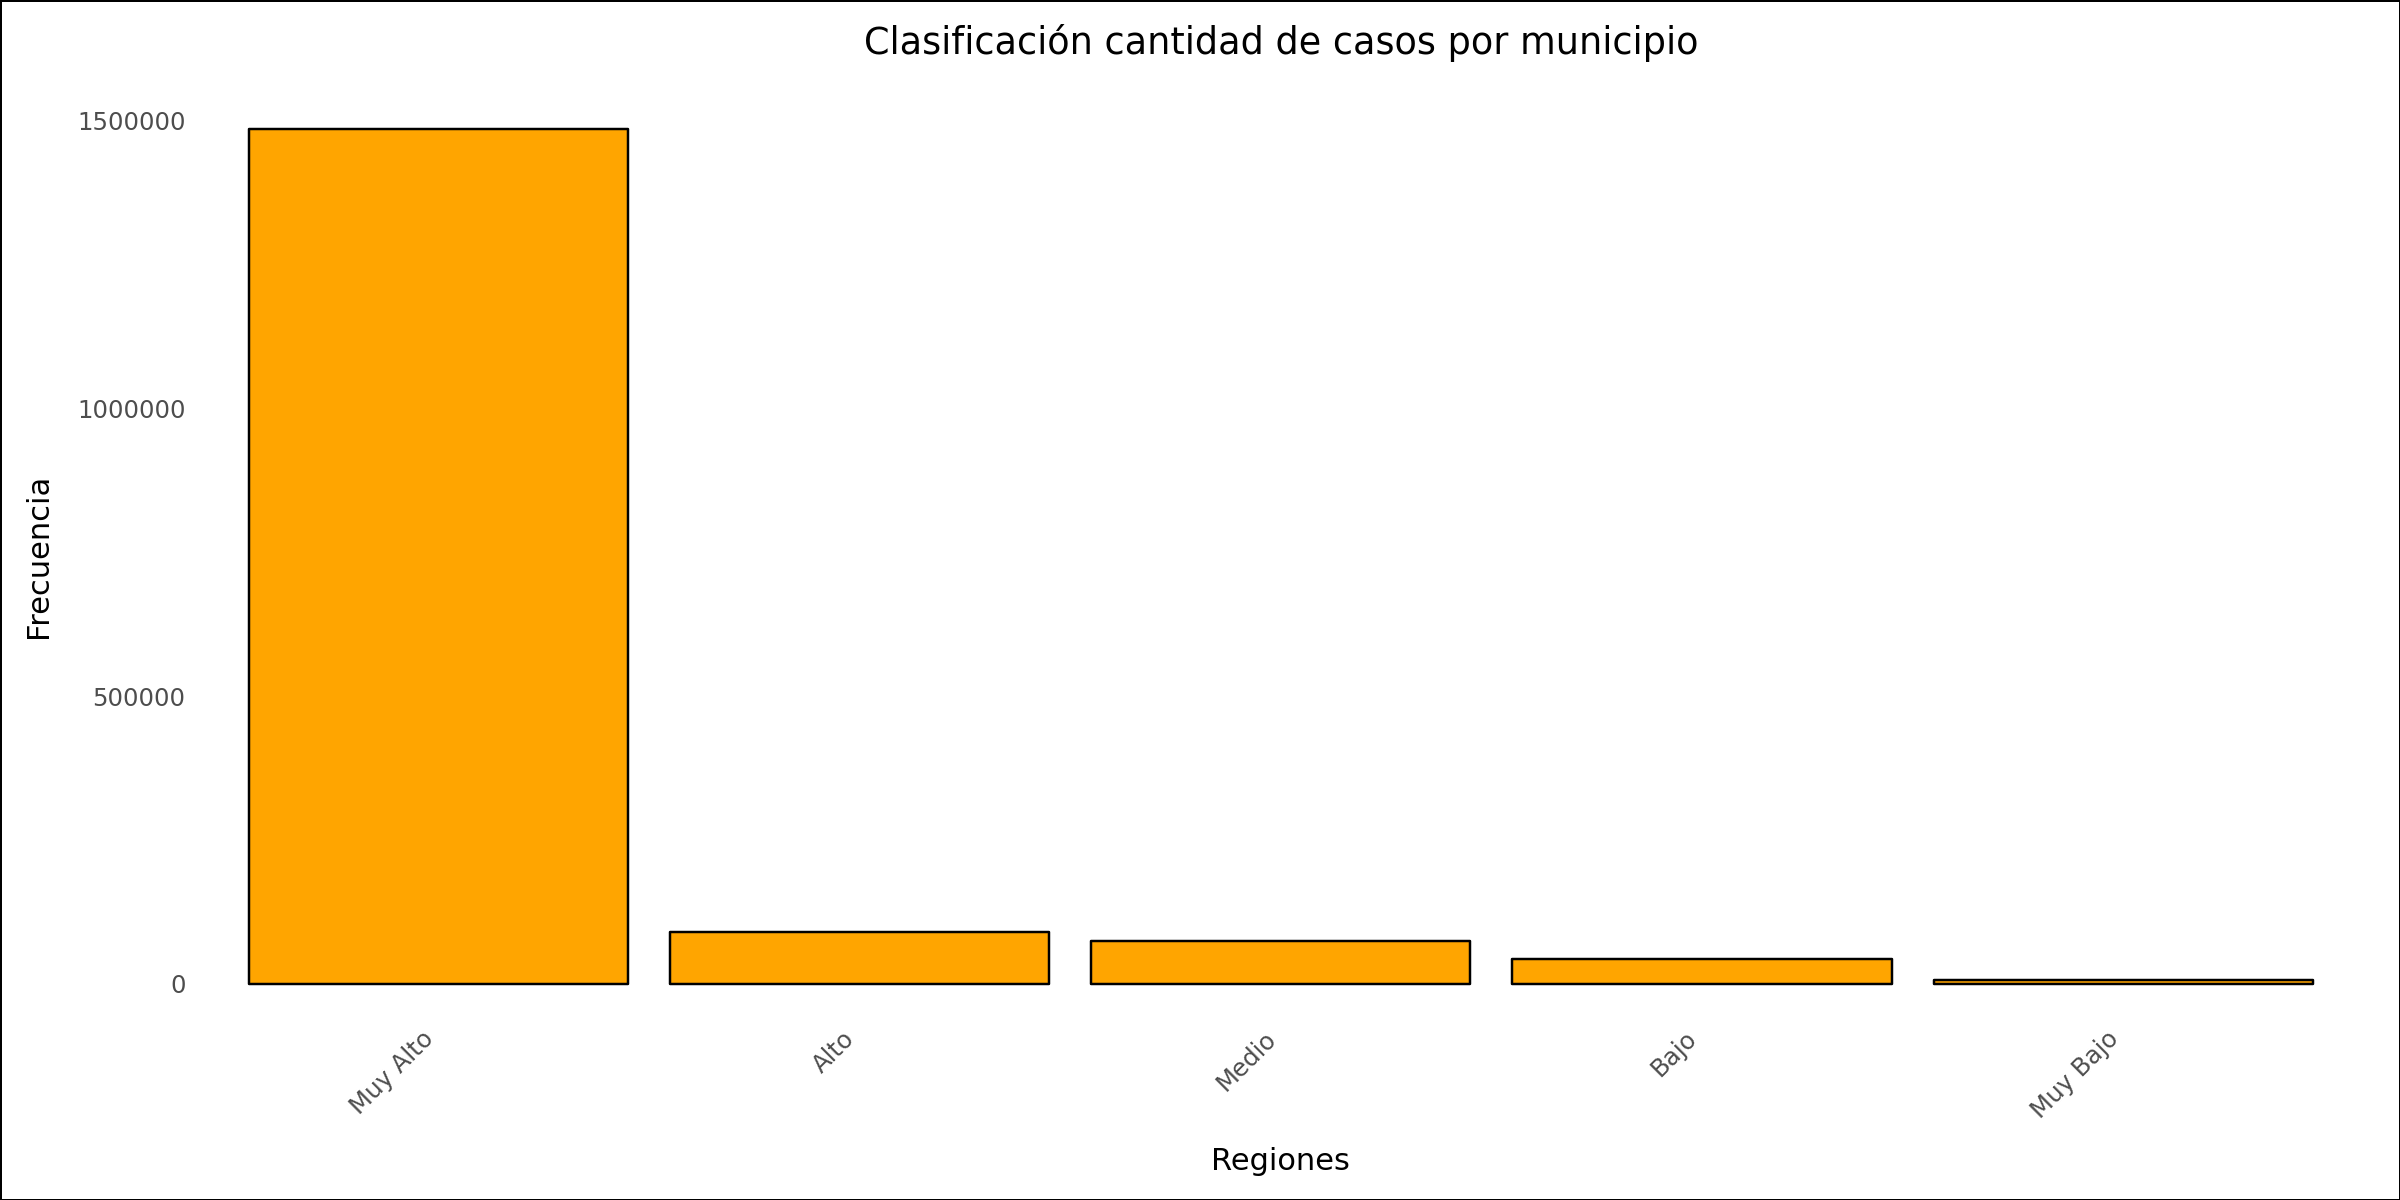

In [ ]:
# Contar los valores únicos
value_counts = Preprocess_df['Clasifiación casos municipio'].value_counts().reset_index()
value_counts.columns = ['Clasifiación casos municipio', 'Frecuencia']
value_counts =value_counts.sort_values(by='Frecuencia', ascending=False)

# Convertir la columna en categoría ordenada
value_counts['Clasifiación casos municipio'] = pd.Categorical(
    value_counts['Clasifiación casos municipio'],
    categories=value_counts['Clasifiación casos municipio'],
    ordered=True
)

# Crear la gráfica con ggplot
plot = (
    p9.ggplot(value_counts, p9.aes(x='Clasifiación casos municipio', y='Frecuencia')) +
    p9.geom_bar(stat='identity', fill='orange', color='black') +
    p9.theme_minimal() +
    p9.theme(
        figure_size=(12, 6),  # Cambiar tamaño de la figura (ancho x alto en pulgadas)
        axis_text_x=p9.element_text(rotation=45, hjust=1),
        panel_grid_major=p9.element_blank(),  # Quitar líneas de cuadrícula
        panel_grid_minor=p9.element_blank(),
        panel_background=p9.element_rect(fill='white', color=None),  # Fondo blanco
        plot_background=p9.element_rect(fill='white', color=None)
    ) +
    p9.labs(title="Clasificación cantidad de casos por municipio",
            x="Regiones",
            y="Frecuencia")
)

# Mostrar el gráfico
plot

In [ ]:
Preprocess_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1701592 entries, 0 to 1702895
Data columns (total 29 columns):
 #   Column                                    Dtype 
---  ------                                    ----- 
 0   NumeroFactura                             object
 1   CodigoPrestador                           int64 
 2   FechaIngreso                              object
 3   HoraIngreso                               object
 4   CausaExterna                              int64 
 5   CodigoDiagnosticoPrincipalSalida          object
 6   CodigoDiagnosticoRelN1Salida              object
 7   CodigoDiagnosticoRelN2Salida              object
 8   CodigoDiagnosticoRelN3Salida              object
 9   DestinoUsuario                            int64 
 10  EstadoSalida                              int64 
 11  CausaBasicaMuerteUrgencias                object
 12  FechaSalida                               object
 13  HoraSalida                                object
 14  CodigoEAPB             

In [ ]:
# registros_por_departamento.to_csv('depar.csv', index=False)

In [ ]:
import json
from urllib.request import urlopen
with urlopen('https://gist.githubusercontent.com/john-guerra/43c7656821069d00dcbc/raw/be6a6e239cd5b5b803c6e7c2ec405b793a9064dd/Colombia.geo.json') as response:
    counties = json.load(response)

In [ ]:
import plotly.graph_objs as go
import plotly.offline as pyo # para exportar en html

locs = registros_por_departamento['Departamento']

for loc in counties['features']:
    loc['id'] = loc['properties']['NOMBRE_DPT']
fig = go.Figure(go.Choroplethmapbox(
                    geojson=counties,
                    locations=locs,
                    z=registros_por_departamento['Cantidad'],
                    colorscale='Viridis',
                    colorbar_title="Cantidad"))
fig.update_layout(mapbox_style="carto-positron",
                        mapbox_zoom=3.4,
                        mapbox_center = {"lat": 4.570868, "lon": -74.2973328})
fig.show()

In [ ]:
# Contar el número de registros por departamento
registros_por_departamento_2 = Preprocess_df[Preprocess_df['Departamento']!='ANTIOQUIA']

# Contar el número de registros por departamento
registros_por_departamento_2 = registros_por_departamento_2.groupby('Departamento').size().reset_index()
registros_por_departamento_2 = registros_por_departamento_2.rename(columns={0:'Cantidad'})

# Mostrar el resultado
registros_por_departamento_2

Departamento  Cantidad
0             AMAZONAS        22
1               ARAUCA        31
2            ATLANTICO       539
3              BOLIVAR      1080
4               BOYACA       613
5               CALDAS       681
6              CAQUETA        63
7             CASANARE        51
8                CAUCA       254
9                CESAR       235
10               CHOCO      3945
11             CORDOBA      1561
12        CUNDINAMARCA       557
13             GUAINIA         4
14            GUAVIARE        17
15               HUILA       181
16          LA GUAJIRA       118
17           MAGDALENA       246
18                META       197
19              NARIÑO       212
20  NORTE DE SANTANDER       232
21            PUTUMAYO        23
22             QUINDIO       235
23           RISARALDA       478
24          SAN ANDRES       108
25  SANTA FE DE BOGOTÁ      6539
26           SANTANDER      1172
27               SUCRE       563
28              TOLIMA       492
29     VALLE DEL CAUCA       853
30              VAUPES         4
31             VICHADA         5

In [ ]:
import plotly.graph_objs as go
import plotly.offline as pyo # para exportar en html

locs = registros_por_departamento_2['Departamento']

for loc in counties['features']:
    loc['id'] = loc['properties']['NOMBRE_DPT']
fig = go.Figure(go.Choroplethmapbox(
                    geojson=counties,
                    locations=locs,
                    z=registros_por_departamento_2['Cantidad'],
                    colorscale='Viridis',
                    colorbar_title="Cantidad"))
fig.update_layout(mapbox_style="carto-positron",
                        mapbox_zoom=3.4,
                        mapbox_center = {"lat": 4.570868, "lon": -74.2973328})
fig.show()

In [ ]:
Preprocess_df.Municipio.unique()

array(['MEDELLIN',
       'BARRANQUILLA (DISTRITO ESPECIAL  INDUSTRIAL Y PORTUARIO DE BARRANQUILLA)',
       'BELLO', 'CALDAS', 'SABANETA', 'MANIZALES', 'ENVIGADO',
       'SANTA FE DE BOGOTA, D. C.', 'ITAGUI', 'LA ESTRELLA', 'APARTADO',
       'COPACABANA', 'GIRARDOTA', 'ABEJORRAL', 'URRAO', 'ANDES',
       'CAUCASIA', 'ANORI', 'TARSO', 'SAN LUIS', 'EBEJICO', 'JARDIN',
       'NARIÑO', 'MACEO', 'SAN CARLOS', 'SAN RAFAEL', 'RIONEGRO',
       'ENTRERRIOS', 'SONSON', 'SOPETRAN', 'YOLOMBO', 'BARBOSA',
       'CAICEDO', 'GUARNE', 'YARUMAL', 'BETANIA', 'HELICONIA', 'CARACOLI',
       'SANTA BARBARA', 'TURBO', 'ANDALUCIA', 'TITIRIBI', 'CONCORDIA',
       'SAN PEDRO', 'YONDO', 'BETULIA', 'DON MATIAS', 'PUERTO TRIUNFO',
       'SANTA ROSA DE OSOS', 'AGUADAS', 'CISNEROS', 'SANTO DOMINGO',
       'FRONTINO', 'DABEIBA', 'CAREPA', 'VALDIVIA', 'PEQUE', 'OLAYA',
       'AMAGA', 'GUATAPE', 'ITUANGO', 'PUERTO BERRIO', 'SALGAR',
       'SAN PEDRO DE URABA', 'AMALFI', 'ANTIOQUIA', 'SEGOVIA', 'URAMITA',


In [ ]:
Preprocess_df.DestinoUsuario.value_counts()

DestinoUsuario
1    1328636
3     362983
2       9973
Name: count, dtype: int64

##  Análisis univariante

In [ ]:
Preprocess_df.columns

Index(['NumeroFactura', 'CodigoPrestador', 'FechaIngreso', 'HoraIngreso',
       'CausaExterna', 'CodigoDiagnosticoPrincipalSalida',
       'CodigoDiagnosticoRelN1Salida', 'CodigoDiagnosticoRelN2Salida',
       'CodigoDiagnosticoRelN3Salida', 'DestinoUsuario', 'EstadoSalida',
       'CausaBasicaMuerteUrgencias', 'FechaSalida', 'HoraSalida', 'CodigoEAPB',
       'TipoUsuario', 'Edad', 'UnidadMedidaEdad', 'Sexo', 'CodDepto',
       'CodMunicipio', 'ZonaResidencia', 'Ano', 'cod_unificado',
       'Departamento', 'Municipio', 'Region_departamento',
       'Cobertura servicios básicos departamento',
       'Clasifiación casos municipio'],
      dtype='object')

### NumeroFactura

In [ ]:
Preprocess_df.NumeroFactura

0               288306
1           4129237242
2           4129237242
3           4129237242
4           4129237242
              ...     
1702891    GE132960245
1702892    GE022428660
1702893    GE152119657
1702894    GE271690105
1702895    GE271690104
Name: NumeroFactura, Length: 1701592, dtype: object

Esta columna representa la factura que las IPS emiten a las EPS para cobrar por los servicios brindados al paciente. Esta columna no será tenida en cuenta en el desarrollo del modelo, Sin embargo, también es posible analizar cuántos servicios están asociados a cada factura.

In [ ]:
Preprocess_df[Preprocess_df['NumeroFactura']=='00020']

NumeroFactura  CodigoPrestador FechaIngreso HoraIngreso  CausaExterna  \
132513         00020      50011427610   2019-02-05       14:00            13   
132514         00020      50011427610   2019-02-23       14:00            13   
132515         00020      50011427610   2019-02-24       14:00            13   
132516         00020      50011427610   2019-02-03       14:00            13   
132517         00020      50011427610   2019-02-08       14:00            13   
...              ...              ...          ...         ...           ...   
880728         00020      50011427610   2019-02-05       14:00            13   
908934         00020      50011427610   2019-02-27       14:00            13   
908938         00020      50011427610   2019-02-22       14:00            13   
944940         00020      50011427610   2019-02-05       14:00            13   
944942         00020      50011427610   2019-02-14       14:00            13   

       CodigoDiagnosticoPrincipalSalida CodigoDiagnosticoRelN1Salida  \
132513                             J459                          NaN   
132514                             J459                          NaN   
132515                             A09X                          NaN   
132516                             J459                          NaN   
132517                             J189                          NaN   
...                                 ...                          ...   
880728                             R568                          NaN   
908934                             R104                         R11X   
908938                             S724                         M869   
944940                             M179                         R51X   
944942                             B209                          NaN   

       CodigoDiagnosticoRelN2Salida CodigoDiagnosticoRelN3Salida  \
132513                          NaN                          NaN   
132514                          NaN                          NaN   
132515                          NaN                          NaN   
132516                          NaN                          NaN   
132517                          NaN                          NaN   
...                             ...                          ...   
880728                          NaN                          NaN   
908934                          NaN                          NaN   
908938                         G822                          NaN   
944940                          NaN                          NaN   
944942                          NaN                          NaN   

        DestinoUsuario  ...  CodDepto CodMunicipio ZonaResidencia   Ano  \
132513               1  ...         5            1              U  2019   
132514               1  ...         5            1              U  2019   
132515               1  ...         5            1              U  2019   
132516               1  ...         5            1              U  2019   
132517               1  ...         5            1              U  2019   
...                ...  ...       ...          ...            ...   ...   
880728               1  ...         5            1              U  2019   
908934               1  ...         5            1              U  2019   
908938               1  ...         5            1              U  2019   
944940               1  ...         5            1              U  2019   
944942               1  ...         5            1              U  2019   

       cod_unificado  Departamento  Municipio  Region_departamento  \
132513           501     ANTIOQUIA   MEDELLIN               Andina   
132514           501     ANTIOQUIA   MEDELLIN               Andina   
132515           501     ANTIOQUIA   MEDELLIN               Andina   
132516           501     ANTIOQUIA   MEDELLIN               Andina   
132517           501     ANTIOQUIA   MEDELLIN               Andina   
...              ...           ...        .

In [ ]:
# Asegúrate de reemplazar 'df' por el nombre de tu DataFrame
servicios_por_factura = Preprocess_df.groupby('NumeroFactura').size().reset_index(name='CantidadServicios')

# Mostrar los primeros registros como ejemplo
servicios_por_factura


NumeroFactura  CantidadServicios
0         00001331721                  1
1               00020               1653
2               00021                  2
3               00022                  2
4               00023                  2
...               ...                ...
1346081      UTBU1023               2115
1346082      UTBU1063                653
1346083      UTBU1302                228
1346084     YA0102644                 19
1346085     YA0103126                 16

[1346086 rows x 2 columns]

In [ ]:
import plotly.graph_objects as go

# Datos preparados previamente
facturas_por_cantidad_servicios = servicios_por_factura.groupby('CantidadServicios').size().reset_index(name='NumeroFacturas')

# Ordenar los datos en orden descendente
facturas_por_cantidad_servicios = facturas_por_cantidad_servicios.sort_values(by='NumeroFacturas', ascending=False)

# Calcular el porcentaje acumulado
facturas_por_cantidad_servicios['PorcentajeAcumulado'] = facturas_por_cantidad_servicios['NumeroFacturas'].cumsum() / facturas_por_cantidad_servicios['NumeroFacturas'].sum() * 100

# Crear gráfico de Pareto dinámico
fig = go.Figure()

# Agregar barras para el número de facturas
fig.add_trace(go.Bar(
    x=facturas_por_cantidad_servicios['CantidadServicios'],
    y=facturas_por_cantidad_servicios['NumeroFacturas'],
    name='Número de Facturas',
    marker_color='skyblue',
    text=facturas_por_cantidad_servicios['NumeroFacturas'],  # Mostrar valores
    textposition='outside'
))

# Agregar línea acumulativa
fig.add_trace(go.Scatter(
    x=facturas_por_cantidad_servicios['CantidadServicios'],
    y=facturas_por_cantidad_servicios['PorcentajeAcumulado'],
    name='Porcentaje Acumulado',
    mode='lines+markers',
    line=dict(color='orange', width=2),
    marker=dict(size=8),
    yaxis='y2'  # Usar segundo eje Y
))

# Configurar diseño del gráfico
fig.update_layout(
    title='Gráfico de Pareto: Distribución de Facturas por Servicios',
    xaxis=dict(title='Cantidad de Servicios'),
    yaxis=dict(
        title='Número de Facturas',
        side='left',
        showgrid=False
    ),
    yaxis2=dict(
        title='Porcentaje Acumulado (%)',
        side='right',
        overlaying='y',
        range=[0, 110],  # Asegura que la línea llegue al 100%
        showgrid=False
    ),
    legend=dict(x=0.8, y=1.2),
    template='plotly_white',
    bargap=0.2
)

# Mostrar gráfico
fig.show()



Se observa que el 97.31% de las instancias están asociadas a un solo servicio. Los casos restantes son atípicos, con excepción de aquellas instancias que están asociadas a dos servicios, que representan solo el 2.61%. Los demás escenarios podrían estar relacionados con jornadas de salud.

### CodigoPrestador

Está columna hace referencia a los Instituciones prestadoras de salud 

In [ ]:
ips_df = pd.read_excel('data/Tabla IPS.xlsx')

In [ ]:
ips_df.head(5)

tienNombre       codigo sigla  \
0  IPS Públicas    500102144   NaN   
1  IPS Públicas  50010214401   NaN   
2  IPS Públicas    500102178   NaN   
3  IPS Públicas  50010217801   NaN   
4  IPS Públicas  50010217802   NaN   

                                              nombre  \
0  HOSPITAL GENERAL DE MEDELLIN LUZ CASTRO DE GUT...   
1  HOSPITAL GENERAL DE MEDELLÍN LUZ CASTRO DE GUT...   
2               EMPRESA SOCIAL DEL ESTADO METROSALUD   
3               SEDE ADMINISTRATIVA EDIFICIO SACATIN   
4     UNIDAD HOSPITALARIA DE BELEN HECTOR ABAD GOMEZ   

                        gerente depaNombre muniNombre  \
0   CARLOS MARIO RIVERA ESCOBAR  Antioquia   MEDELLÍN   
1  THEIDER JOVANY SERNA JIMENEZ  Antioquia   MEDELLÍN   
2         ALEJANDRO GOMEZ LOPEZ  Antioquia   MEDELLÍN   
3     JUAN DAVID ARTEAGA FLÓREZ  Antioquia   MEDELLÍN   
4  MAURICIO ANTONIO TORO ZAPATA  Antioquia   MEDELLÍN   

                                           direccion             telefono  \
0  Cra. 48 No.32-102 Medellin - Antioquia - Colombia         (094)3847302   
1                               CARRERA 48 N° 32-102              3847302   
2                           KR 50 # 44-27 ED SACATIN           5745117505   
3                   KR 50 # 44 - 27 ED SACATIN COLON  6045117505 ext 1501   
4                                     CL 28 # 77-124     5117505 ext 6114   

                              email                    url url_red  \
0         gestioncalidad@hgm.gov.co         www.hgm.gov.co     NaN   
1         gestioncalidad@hgm.gov.co         www.hgm.gov.co     NaN   
2        gerencia@metrosalud.gov.co  www.metrosalud.gov.co     NaN   
3        gerencia@metrosalud.gov.co                    NaN     NaN   
4  direccionbelen@metrosalud.gov.co                    NaN     NaN   

  clasificación  
0      HOSPITAL  
1      HOSPITAL  
2          OTRA  
3          OTRA  
4      HOSPITAL

In [ ]:
Preprocess_df = Preprocess_df.merge(ips_df[['codigo','nombre']], left_on='CodigoPrestador', right_on='codigo', how='left')

In [ ]:
Preprocess_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1701592 entries, 0 to 1701591
Data columns (total 31 columns):
 #   Column                                    Dtype  
---  ------                                    -----  
 0   NumeroFactura                             object 
 1   CodigoPrestador                           int64  
 2   FechaIngreso                              object 
 3   HoraIngreso                               object 
 4   CausaExterna                              int64  
 5   CodigoDiagnosticoPrincipalSalida          object 
 6   CodigoDiagnosticoRelN1Salida              object 
 7   CodigoDiagnosticoRelN2Salida              object 
 8   CodigoDiagnosticoRelN3Salida              object 
 9   DestinoUsuario                            int64  
 10  EstadoSalida                              int64  
 11  CausaBasicaMuerteUrgencias                object 
 12  FechaSalida                               object 
 13  HoraSalida                                object 
 14  Co

In [ ]:
Preprocess_df.isnull().sum()

NumeroFactura                                    0
CodigoPrestador                                  0
FechaIngreso                                     0
HoraIngreso                                      0
CausaExterna                                     0
CodigoDiagnosticoPrincipalSalida                 0
CodigoDiagnosticoRelN1Salida                515035
CodigoDiagnosticoRelN2Salida                631687
CodigoDiagnosticoRelN3Salida                669019
DestinoUsuario                                   0
EstadoSalida                                     0
CausaBasicaMuerteUrgencias                  667030
FechaSalida                                      0
HoraSalida                                       0
CodigoEAPB                                       0
TipoUsuario                                      0
Edad                                             0
UnidadMedidaEdad                                 0
Sexo                                             0
CodDepto                       

In [ ]:
ips_null =Preprocess_df[Preprocess_df.nombre.isnull()]

In [ ]:
ips_null

NumeroFactura  CodigoPrestador FechaIngreso HoraIngreso  CausaExterna  \
372            993502      50010558603   2021-02-22       16:13            15   
373            993634      50010558603   2021-02-22       16:13            15   
433            993634      50010558603   2021-03-19       12:13            15   
440            993634      50010558603   2021-03-11       13:33            15   
445            993502      50010558603   2021-02-21       16:13            15   
...               ...              ...          ...         ...           ...   
1700162        985514      50010558603   2021-02-15       13:34            15   
1700169        985509      50010558603   2021-02-20       12:14            13   
1700240        985514      50010558603   2021-02-09       12:49            15   
1701326        993502      50010558603   2021-02-24       08:51            15   
1701344        993502      50010558603   2021-02-13       21:25            15   

        CodigoDiagnosticoPrincipalSalida CodigoDiagnosticoRelN1Salida  \
372                                 C509                         \"\"   
373                                 C509                         \"\"   
433                                 C509                         \"\"   
440                                 C509                         \"\"   
445                                 C509                         \"\"   
...                                  ...                          ...   
1700162                             C509                         \"\"   
1700169                             C509                         \"\"   
1700240                             C509                         \"\"   
1701326                             C509                         \"\"   
1701344                             C509                         \"\"   

        CodigoDiagnosticoRelN2Salida CodigoDiagnosticoRelN3Salida  \
372                             \"\"                         \"\"   
373                             \"\"                         \"\"   
433                             \"\"                         \"\"   
440                             \"\"                         \"\"   
445                             \"\"                         \"\"   
...                              ...                          ...   
1700162                         \"\"                         \"\"   
1700169                         \"\"                         \"\"   
1700240                         \"\"                         \"\"   
1701326                         \"\"                         \"\"   
1701344                         \"\"                         \"\"   

         DestinoUsuario  ...  ZonaResidencia   Ano cod_unificado Departamento  \
372                   3  ...               U  2021           501    ANTIOQUIA   
373                   3  ...               U  2021           501    ANTIOQUIA   
433                   3  ...               U  2021           501    ANTIOQUIA   
440                   3  ...               U  2021           501    ANTIOQUIA   
445                   3  ...               U  2021          5040    ANTIOQUIA   
...                 ...  ...             ...   ...           ...          ...   
1700162               3  ...               U  2021           501    ANTIOQUIA   
1700169               1  ...               U  2021          5093    ANTIOQUIA   
1700240               3  ...               U  2021         50893    ANTIOQUIA   
1701326               1  ...               U  2021         50308    ANTIOQUIA   
1701344               1  ...               U  2021         50591    ANTIOQUIA   

              Municipio  Region_departamento  \
372            MEDELLIN               Andina   
373            MEDELLIN               Andina   
433            MEDELLIN               Andina   
440            MEDELLIN               Andina   
445               ANORI               Andina   
...                 ...                  ...   
1700162        MEDEL

In [ ]:
ips_null.CodigoPrestador.unique()

array([50010558603, 50010558606, 50010212403, 50011616301, 50010425913,
       50010558604, 50010480601, 50018509280, 50010909901], dtype=int64)

Se realizó una búsqueda y no se logró encontrar los nombres de estás IPS, muy posiblemente estas ya culminaron sus servicios, por lo cual le pondremos una etiqueta de "Sin Definir", para lograr hacer nuestra gráfica

In [ ]:
Preprocess_df['nombre'].fillna('Sin Definir', inplace=True)

In [ ]:
Preprocess_df.isnull().sum()

NumeroFactura                                    0
CodigoPrestador                                  0
FechaIngreso                                     0
HoraIngreso                                      0
CausaExterna                                     0
CodigoDiagnosticoPrincipalSalida                 0
CodigoDiagnosticoRelN1Salida                515035
CodigoDiagnosticoRelN2Salida                631687
CodigoDiagnosticoRelN3Salida                669019
DestinoUsuario                                   0
EstadoSalida                                     0
CausaBasicaMuerteUrgencias                  667030
FechaSalida                                      0
HoraSalida                                       0
CodigoEAPB                                       0
TipoUsuario                                      0
Edad                                             0
UnidadMedidaEdad                                 0
Sexo                                             0
CodDepto                       

In [ ]:
import plotly.express as px

# Agrupar por la columna 'nombre' y contar las instancias
nombre_counts = Preprocess_df['nombre'].value_counts().reset_index()
nombre_counts.columns = ['nombre', 'cantidad_instancias']

# Crear el gráfico de barras interactivo
fig = px.bar(nombre_counts, 
             x= 'cantidad_instancias',
             y= 'nombre',
             title='Frecuencia de Instancias por Nombre', 
             labels={'nombre': 'Nombre', 'cantidad_instancias': 'Cantidad de Instancias'},
             color='cantidad_instancias',  # Color basado en la cantidad de instancias
             color_continuous_scale='Viridis')  # Escala de colores

# Mostrar el gráfico
fig.show()


In [ ]:
import plotly.graph_objects as go

# Agrupar por la columna 'nombre' y contar las instancias
nombre_counts = Preprocess_df['nombre'].value_counts().reset_index()
nombre_counts.columns = ['nombre', 'cantidad_instancias']

# Ordenar de mayor a menor
nombre_counts = nombre_counts.sort_values(by='cantidad_instancias', ascending=False)

# Calcular el porcentaje acumulado
nombre_counts['percent'] = nombre_counts['cantidad_instancias'] / nombre_counts['cantidad_instancias'].sum() * 100
nombre_counts['percent_cum'] = nombre_counts['percent'].cumsum()

# Crear el gráfico de Pareto (barras + línea acumulada)
fig = go.Figure()

# Agregar las barras
fig.add_trace(go.Bar(
    x=nombre_counts['nombre'],
    y=nombre_counts['cantidad_instancias'],
    name='Cantidad de Instancias',
    marker_color='blue'
))

# Agregar la línea del porcentaje acumulado
fig.add_trace(go.Scatter(
    x=nombre_counts['nombre'],
    y=nombre_counts['percent_cum'],
    name='Porcentaje Acumulado',
    mode='lines+markers',
    yaxis='y2',  # Usamos un segundo eje Y para el porcentaje
    marker_color='red',
    line=dict(color='red', width=2)
))

# Configuración del gráfico
fig.update_layout(
    title='Gráfico de Pareto: Frecuencia de Instancias por Nombre',
    xaxis_title='Nombre',
    yaxis_title='Cantidad de Instancias',
    yaxis=dict(
        tickmode='linear',
        dtick=50000,  # Establecer incremento de 10k en el eje Y
    ),
    yaxis2=dict(
        title='Porcentaje Acumulado',
        overlaying='y',
        side='right',
        range=[0, 100]
    ),
    barmode='stack',
    xaxis_tickangle=-45,
    template='plotly_white',
    width=1500,  # Establecer el ancho de la gráfica
    height=800   # Establecer la altura de la gráfica
)

# Mostrar el gráfico
fig.show()


El 80% de los servicios están concentrados en el 18 instituciones

In [ ]:
Preprocess_df.rename(columns={'nombre':'Nombre prestador'}, inplace=True)

In [ ]:
Preprocess_df

NumeroFactura  CodigoPrestador FechaIngreso HoraIngreso  CausaExterna  \
0              288306      50010217203   2019-12-26       23:38            13   
1          4129237242      50010425930   2019-12-21       05:17            13   
2          4129237242      50010425930   2019-12-23       07:29            13   
3          4129237242      50010425930   2019-12-29       12:47            13   
4          4129237242      50010425930   2019-12-29       09:16            13   
...               ...              ...          ...         ...           ...   
1701587   GE132960245      50010217804   2021-04-10       15:06            15   
1701588   GE022428660      50010217802   2021-04-07       19:32            13   
1701589   GE152119657      50010217809   2021-04-22       10:03            15   
1701590   GE271690105      50010217807   2021-04-22       17:23            15   
1701591   GE271690104      50010217807   2021-04-22       17:23            15   

        CodigoDiagnosticoPrincipalSalida CodigoDiagnosticoRelN1Salida  \
0                                   A059                         I48X   
1                                   R509                         \"\"   
2                                   N23X                         \"\"   
3                                   S002                         \"\"   
4                                   C698                         \"\"   
...                                  ...                          ...   
1701587                             O034                         \"\"   
1701588                             O200                         \"\"   
1701589                             T159                         \"\"   
1701590                             U071                         \"\"   
1701591                             U071                         \"\"   

        CodigoDiagnosticoRelN2Salida CodigoDiagnosticoRelN3Salida  \
0                               \"\"                         \"\"   
1                               \"\"                         \"\"   
2                               \"\"                         \"\"   
3                               \"\"                         \"\"   
4                               \"\"                         \"\"   
...                              ...                          ...   
1701587                         \"\"                         \"\"   
1701588                         \"\"                         \"\"   
1701589                         \"\"                         \"\"   
1701590                         \"\"                         \"\"   
1701591                         \"\"                         \"\"   

         DestinoUsuario  ...  ZonaResidencia   Ano cod_unificado Departamento  \
0                     3  ...               U  2019           501    ANTIOQUIA   
1                     1  ...               U  2019           501    ANTIOQUIA   
2                     1  ...               U  2019           501    ANTIOQUIA   
3                     1  ...               U  2019           501    ANTIOQUIA   
4                     1  ...               U  2019           501    ANTIOQUIA   
...                 ...  ...             ...   ...           ...          ...   
1701587               1  ...               U  2021           501    ANTIOQUIA   
1701588               3  ...               U  2021           501    ANTIOQUIA   
1701589               1  ...               U  2021           501    ANTIOQUIA   
1701590               1  ...               U  2021           501    ANTIOQUIA   
1701591               1  ...               U  2021           501    ANTIOQUIA   

        Municipio  Region_departamento  \
0        MEDELLIN               Andina   
1        MEDELLIN               Andina   
2        MEDELLIN               Andina   
3        MEDELLIN               Andina   
4        MEDELLIN               Andina   
...           ...                  ...   
1701587  MEDELLIN               Andina   
1701588  MEDELLIN   

In [ ]:
# Preprocess_df['Nombre prestador'].to_csv('C:/Users/Johan/Downloads/Nombre prestador_2.csv',index=False,encoding='utf-8-sig' )

In [ ]:
Preprocess_df = Preprocess_df.merge(ips_df[['codigo', 'tienNombre', 'clasificación']], left_on='CodigoPrestador', right_on='codigo', how='left')

In [ ]:
Preprocess_df.rename(columns={'tienNombre':'Prestador:publica/privada', "clasificación":'Tipo Prestador'}, inplace=True)

In [ ]:
Preprocess_df.drop(columns=['codigo_x', 'codigo_y'],inplace=True)

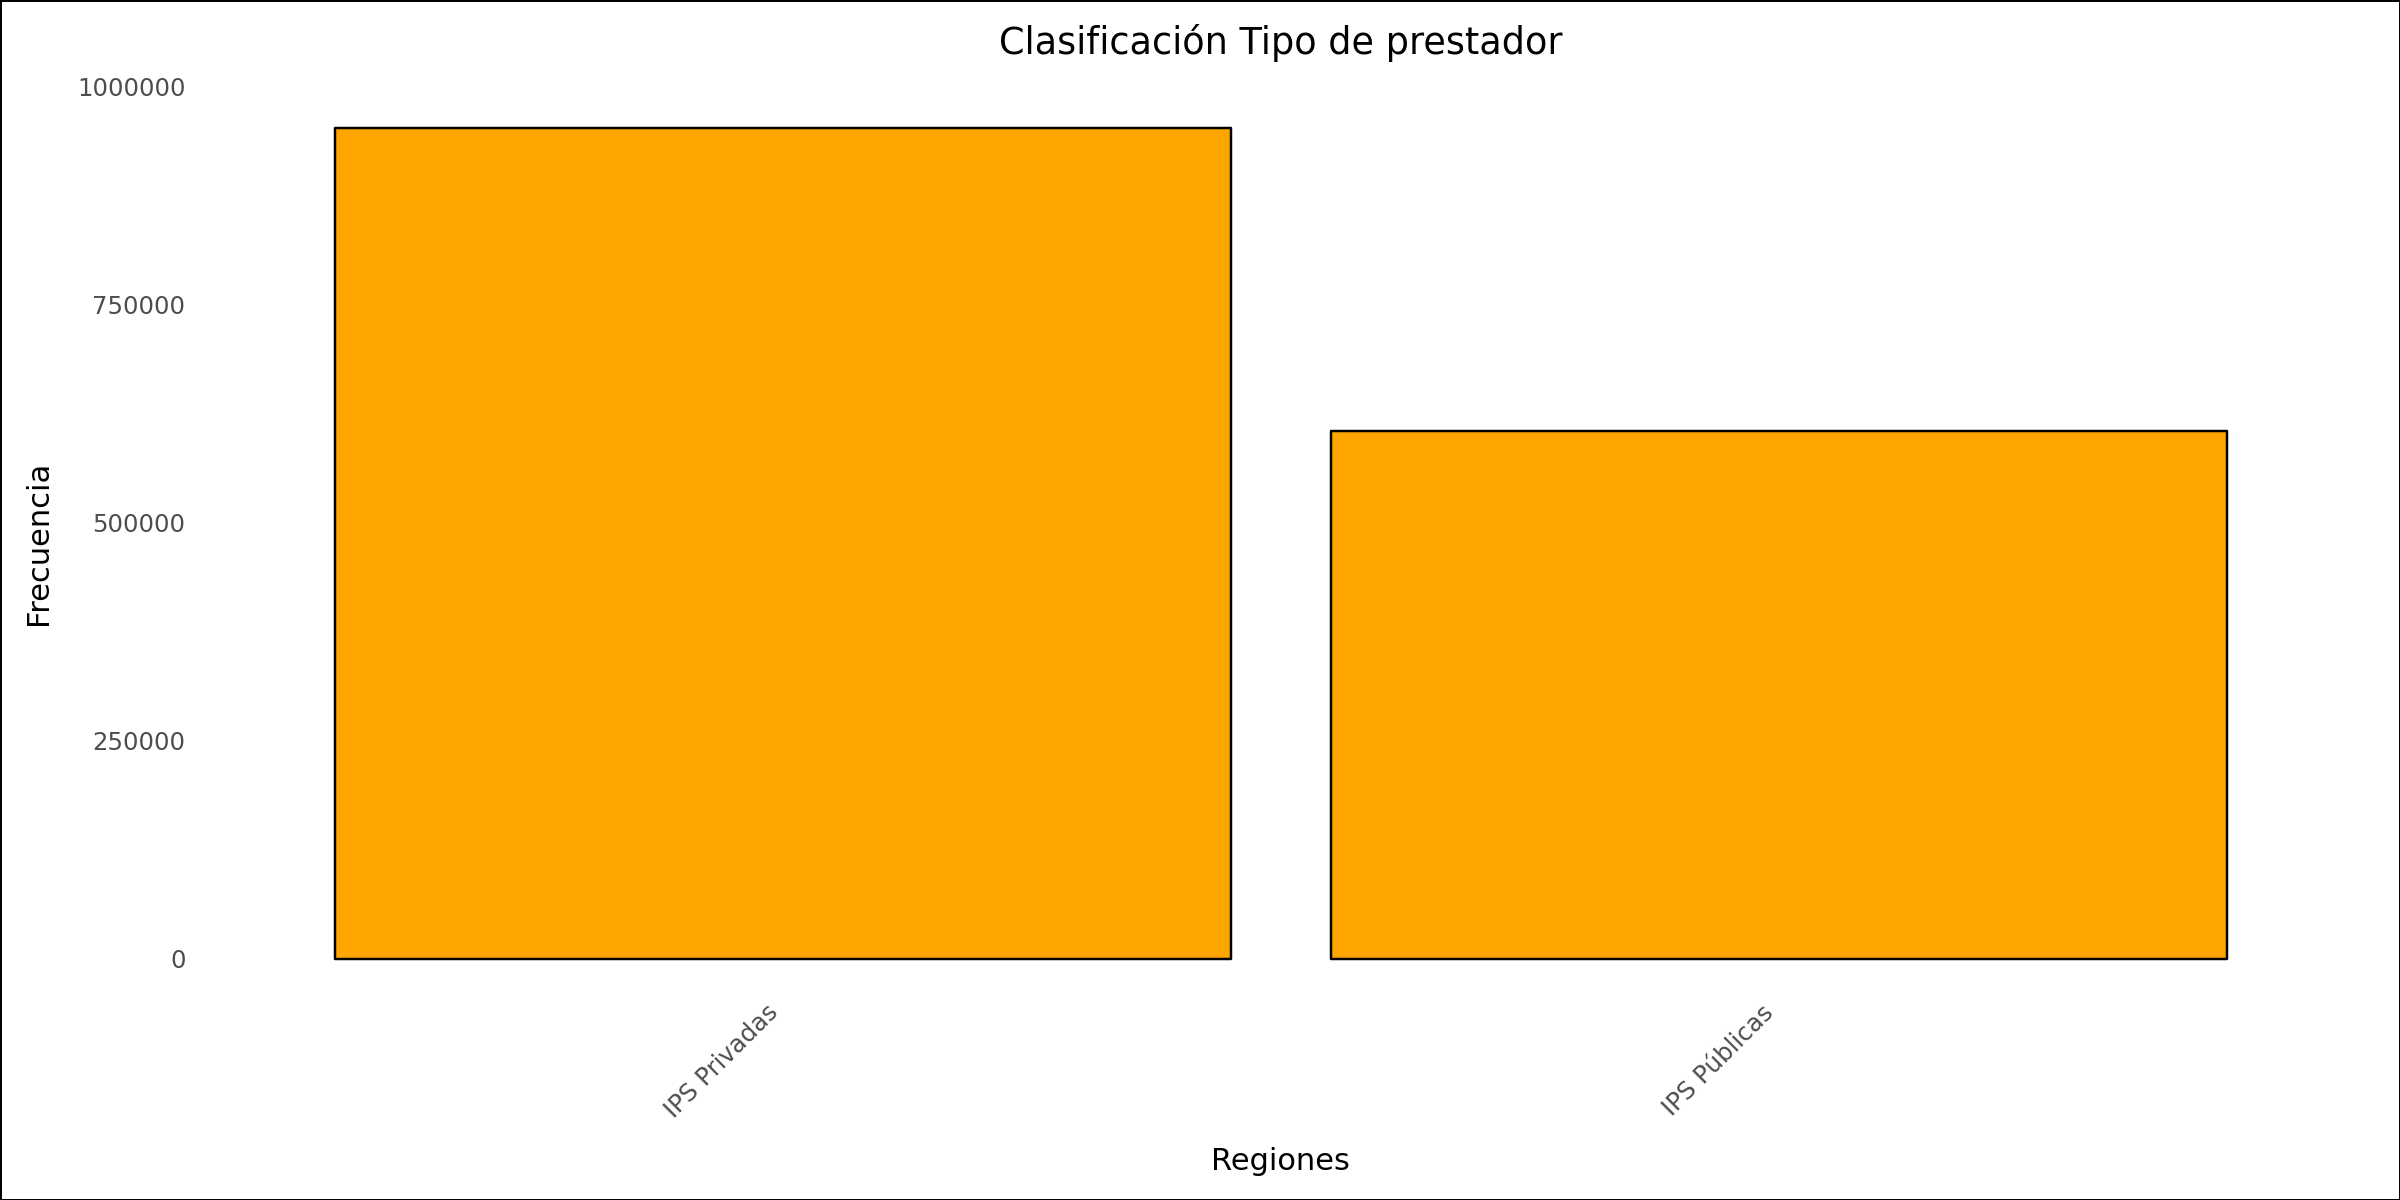

In [ ]:
# Contar los valores únicos
value_counts = Preprocess_df['Prestador:publica/privada'].value_counts().reset_index()
value_counts.columns = ['Prestador:publica/privada', 'Frecuencia']
value_counts =value_counts.sort_values(by='Frecuencia', ascending=False)

# Convertir la columna en categoría ordenada
value_counts['Prestador:publica/privada'] = pd.Categorical(
    value_counts['Prestador:publica/privada'],
    categories=value_counts['Prestador:publica/privada'],
    ordered=True
)

# Crear la gráfica con ggplot
plot = (
    p9.ggplot(value_counts, p9.aes(x='Prestador:publica/privada', y='Frecuencia')) +
    p9.geom_bar(stat='identity', fill='orange', color='black') +
    p9.theme_minimal() +
    p9.theme(
        figure_size=(12, 6),  # Cambiar tamaño de la figura (ancho x alto en pulgadas)
        axis_text_x=p9.element_text(rotation=45, hjust=1),
        panel_grid_major=p9.element_blank(),  # Quitar líneas de cuadrícula
        panel_grid_minor=p9.element_blank(),
        panel_background=p9.element_rect(fill='white', color=None),  # Fondo blanco
        plot_background=p9.element_rect(fill='white', color=None)
    ) +
    p9.labs(title="Clasificación Tipo de prestador",
            x="Regiones",
            y="Frecuencia")
)

# Mostrar el gráfico
plot

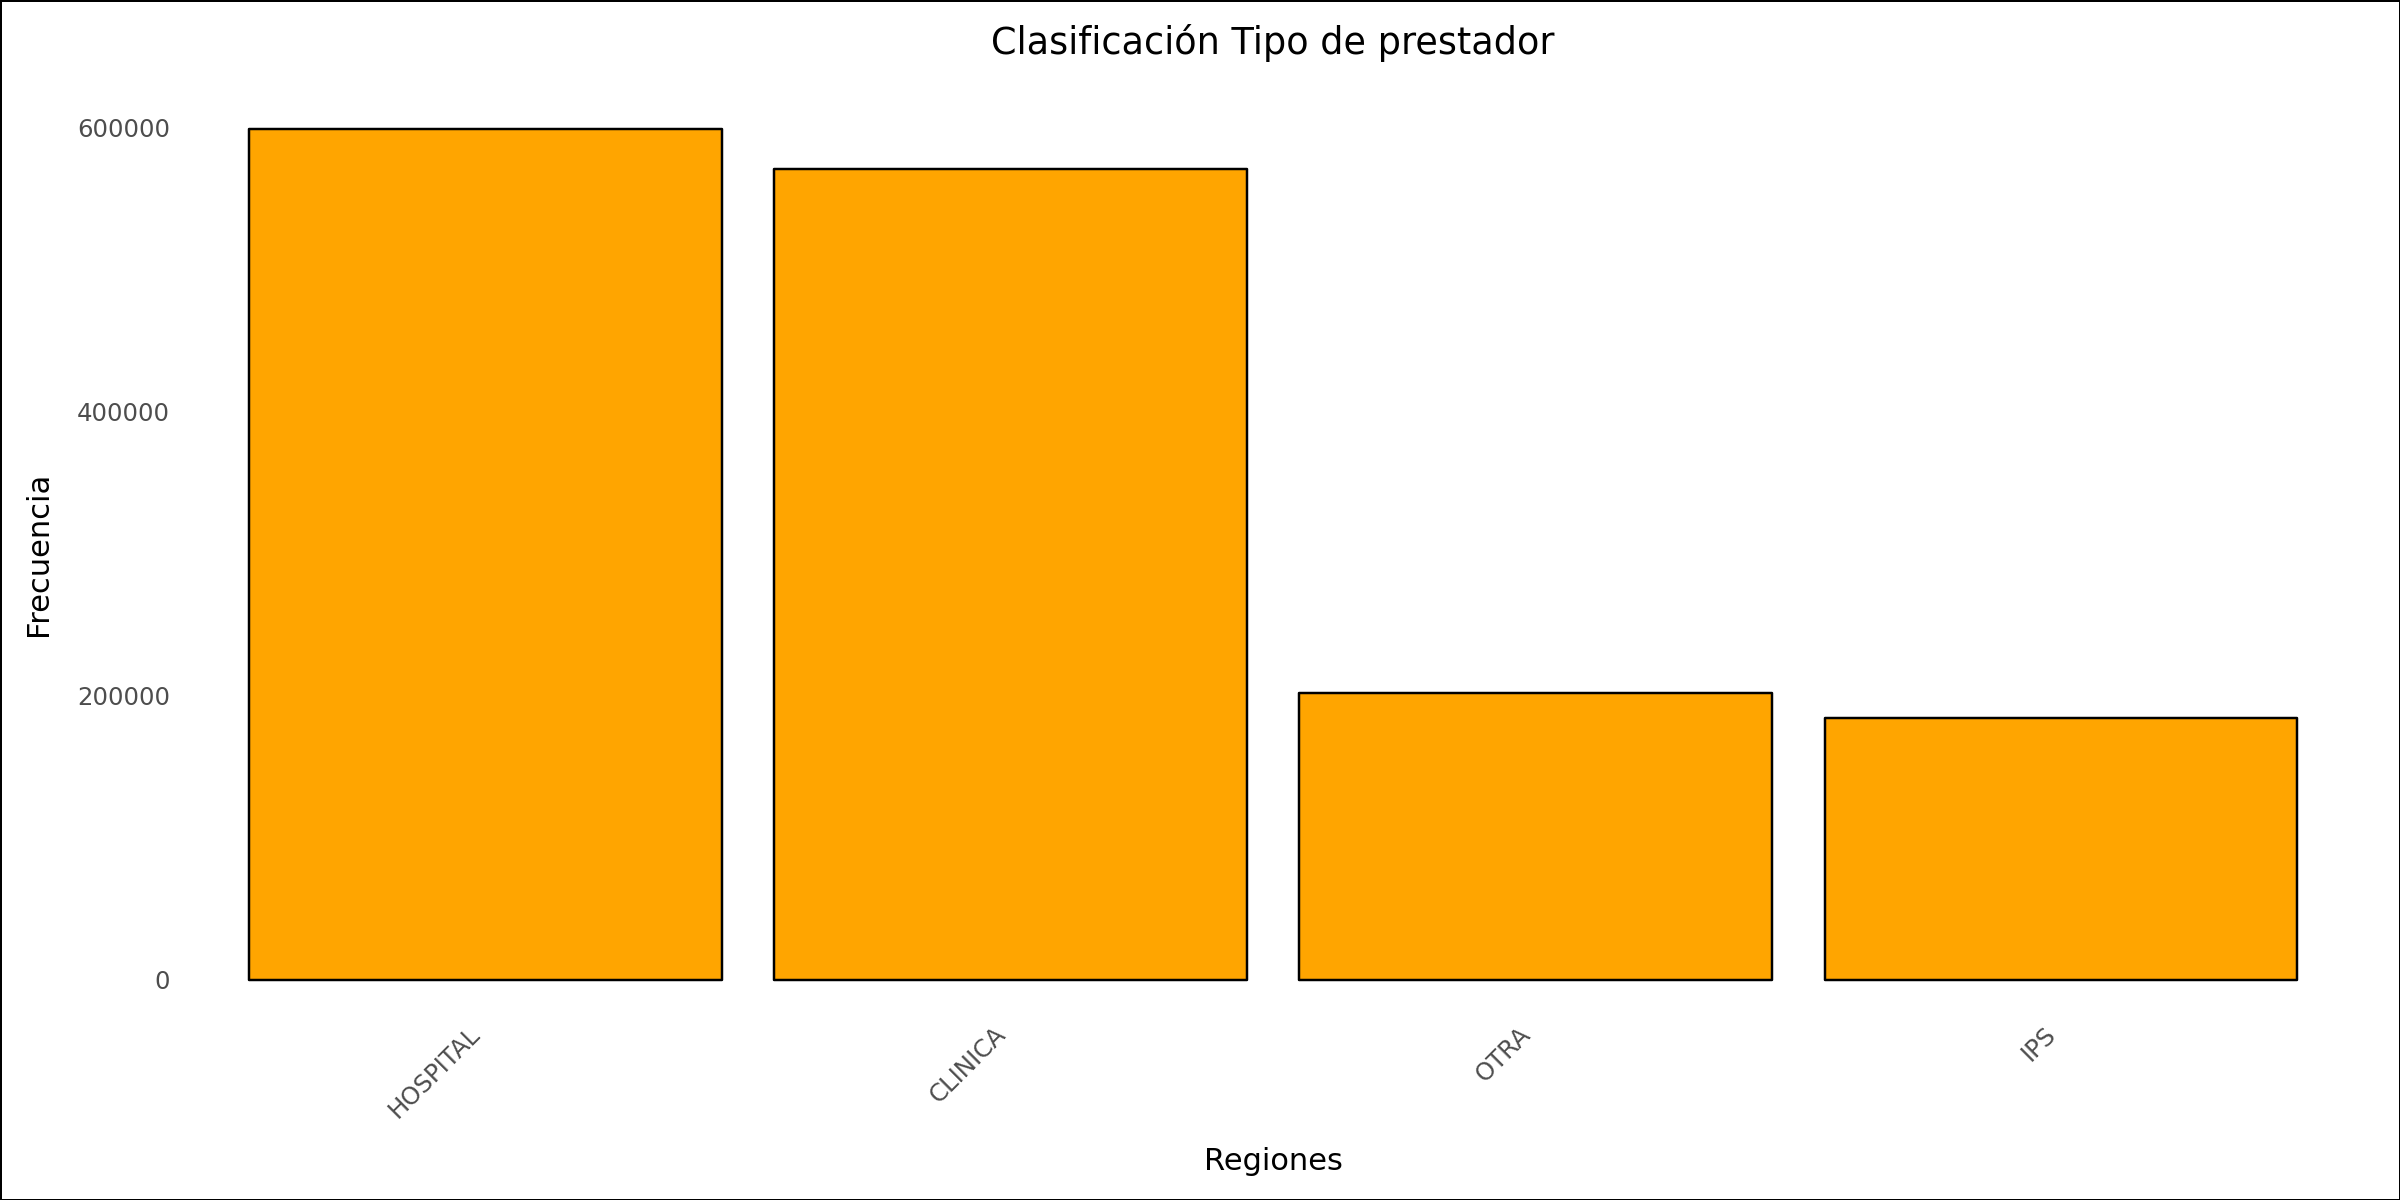

In [ ]:
# Contar los valores únicos
value_counts = Preprocess_df['Tipo Prestador'].value_counts().reset_index()
value_counts.columns = ['Tipo Prestador', 'Frecuencia']
value_counts =value_counts.sort_values(by='Frecuencia', ascending=False)

# Convertir la columna en categoría ordenada
value_counts['Tipo Prestador'] = pd.Categorical(
    value_counts['Tipo Prestador'],
    categories=value_counts['Tipo Prestador'],
    ordered=True
)

# Crear la gráfica con ggplot
plot = (
    p9.ggplot(value_counts, p9.aes(x='Tipo Prestador', y='Frecuencia')) +
    p9.geom_bar(stat='identity', fill='orange', color='black') +
    p9.theme_minimal() +
    p9.theme(
        figure_size=(12, 6),  # Cambiar tamaño de la figura (ancho x alto en pulgadas)
        axis_text_x=p9.element_text(rotation=45, hjust=1),
        panel_grid_major=p9.element_blank(),  # Quitar líneas de cuadrícula
        panel_grid_minor=p9.element_blank(),
        panel_background=p9.element_rect(fill='white', color=None),  # Fondo blanco
        plot_background=p9.element_rect(fill='white', color=None)
    ) +
    p9.labs(title="Clasificación Tipo de prestador",
            x="Regiones",
            y="Frecuencia")
)

# Mostrar el gráfico
plot

In [ ]:
Preprocess_df.columns

Index(['NumeroFactura', 'CodigoPrestador', 'FechaIngreso', 'HoraIngreso',
       'CausaExterna', 'CodigoDiagnosticoPrincipalSalida',
       'CodigoDiagnosticoRelN1Salida', 'CodigoDiagnosticoRelN2Salida',
       'CodigoDiagnosticoRelN3Salida', 'DestinoUsuario', 'EstadoSalida',
       'CausaBasicaMuerteUrgencias', 'FechaSalida', 'HoraSalida', 'CodigoEAPB',
       'TipoUsuario', 'Edad', 'UnidadMedidaEdad', 'Sexo', 'CodDepto',
       'CodMunicipio', 'ZonaResidencia', 'Ano', 'cod_unificado',
       'Departamento', 'Municipio', 'Region_departamento',
       'Cobertura servicios básicos departamento',
       'Clasifiación casos municipio', 'Nombre prestador',
       'Prestador:publica/privada', 'Tipo Prestador'],
      dtype='object')

In [ ]:
Preprocess_df = Preprocess_df[['NumeroFactura', 'Ano', 'FechaIngreso', 'HoraIngreso', 'FechaSalida', 'HoraSalida',
                               'cod_unificado',
                               'CodigoPrestador', 'Nombre prestador', 'Prestador:publica/privada', 'Tipo Prestador',
                               'CodMunicipio', 'Municipio', 'Clasifiación casos municipio', 
                               'CodDepto','Departamento', 'Region_departamento', 'Cobertura servicios básicos departamento', 
                               'CausaExterna', 
                               'CodigoDiagnosticoPrincipalSalida',   'CodigoDiagnosticoRelN1Salida', 'CodigoDiagnosticoRelN2Salida','CodigoDiagnosticoRelN3Salida', 
                               'DestinoUsuario', 
                               'EstadoSalida',
                               'CausaBasicaMuerteUrgencias',  
                               'CodigoEAPB',
                               'TipoUsuario', 
                               'Edad', 
                               'UnidadMedidaEdad', 
                               'Sexo', 
                               'ZonaResidencia', 
                               ]]

In [ ]:
Preprocess_df['Prestador:publica/privada'].value_counts() 

Prestador:publica/privada
IPS Privadas    952392
IPS Públicas    604895
Name: count, dtype: int64

In [ ]:
# Filtrar los registros donde la columna tiene valores nulos
registros_nulos = Preprocess_df[Preprocess_df['Prestador:publica/privada'].isnull()]

registros_nulos['Nombre prestador'].value_counts()

Nombre prestador
Sin Definir    144305
Name: count, dtype: int64

In [ ]:
# Eliminar registros donde 'Nombre prestador' es nulo
Preprocess_df = Preprocess_df.dropna(subset=['Tipo Prestador'])

In [ ]:
Preprocess_df.isnull().sum()

NumeroFactura                                    0
Ano                                              0
FechaIngreso                                     0
HoraIngreso                                      0
FechaSalida                                      0
HoraSalida                                       0
cod_unificado                                    0
CodigoPrestador                                  0
Nombre prestador                                 0
Prestador:publica/privada                        0
Tipo Prestador                                   0
CodMunicipio                                     0
Municipio                                        0
Clasifiación casos municipio                     0
CodDepto                                         0
Departamento                                     0
Region_departamento                              0
Cobertura servicios básicos departamento         0
CausaExterna                                     0
CodigoDiagnosticoPrincipalSalid

In [ ]:
# Convertir la columna 'Prestador' a numérica
Preprocess_df['Prestador:1.publica/0.privada'] = Preprocess_df["Prestador:publica/privada"].map({"IPS Públicas": 1, "IPS Privadas": 0})

In [ ]:
Preprocess_df.CausaExterna.unique()

array([13,  5, 11, 15,  2,  8,  7,  3,  1, 10,  9, 14,  4,  6, 12],
      dtype=int64)

In [ ]:
Preprocess_df.CausaExterna.value_counts()

CausaExterna
13    1260785
15     107726
5       83585
2       53084
1       19300
7       15943
3        4023
11       3641
8        2741
14       1844
10       1606
4        1532
9         640
12        520
6         317
Name: count, dtype: int64

"description": "Causa externa: \n01 = Accidente de trabajo\n02 = Accidente de tránsito\n03 = Accidente rábico\n04 = Accidente ofídico\n05 = Otro tipo de accidente\n06 = Evento catastrófico\n07 = Lesión por agresión\n08 = Lesión auto infligida\n09 = Sospecha de maltrato físico\n10 = Sospecha de abuso sexual\n11 = Sospecha de violencia sexual\n12 = Sospecha de maltrato emocional\n13 = Enfermedad general\n14 = Enfermedad laboral\n15 = Otra"

In [ ]:
import pandas as pd

# Crear el diccionario de mapeo
dict_categorias = {
    1: "Accidente de trabajo",
    2: "Accidente de tránsito",
    3: "Mordeduras y picaduras de animales",
    4: "Mordeduras y picaduras de animales",
    5: "Otros accidentes",
    6: "Otros accidentes",
    7: "Violencia y maltrato",
    8: "Violencia y maltrato",
    9: "Violencia y maltrato",
    10: "Violencia y maltrato",
    11: "Violencia y maltrato",
    12: "Violencia y maltrato",
    13: "Enfermedad general",
    14: "Enfermedad laboral",
    15: "Otros accidentes"
}


# Aplicar la recategorización
Preprocess_df["CausaExternaNueva"] = Preprocess_df["CausaExterna"].map(dict_categorias)

In [ ]:
Preprocess_df.CausaExternaNueva.value_counts()

CausaExternaNueva
Enfermedad general                    1260785
Otros accidentes                       191628
Accidente de tránsito                   53084
Violencia y maltrato                    25091
Accidente de trabajo                    19300
Mordeduras y picaduras de animales       5555
Enfermedad laboral                       1844
Name: count, dtype: int64

In [ ]:
Preprocess_df.EstadoSalida.value_counts()

EstadoSalida
1    1514210
2      43077
Name: count, dtype: int64

In [ ]:
Preprocess_df.CodigoEAPB.value_counts()

CodigoEAPB
EPSS40    432629
EPS010    355168
EPS002    119086
EPS037    115121
14-11      74405
           ...  
05101          1
23686          1
23807          1
66170          1
13-22          1
Name: count, Length: 346, dtype: int64

### CodigoEAPB

In [ ]:
eps_df = pd.read_excel('data/administradoras.xls')

In [ ]:
eps_df.head(3)

cod_ase                         nom_ase  dir_ase regimen  retroalime  \
0   37177  ABN AMRO SEGUROS (COLOMBIA) SA      NaN     NaN       False   
1   37024                     ACE SEGUROS      NaN     NaN       False   
2  HC1413  AIG COLOMBIA SEGUROS DE VIDA S      NaN     NaN       False   

   activa            fec_inact codigo_supersalud  
0   False  2016-01-23 00:00:00             37177  
1   False  2014-11-19 00:00:00             37024  
2    True                -   -            HC1413

In [ ]:
eps_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495 entries, 0 to 494
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   cod_ase            495 non-null    object 
 1   nom_ase            495 non-null    object 
 2   dir_ase            0 non-null      float64
 3   regimen            8 non-null      object 
 4   retroalime         495 non-null    bool   
 5   activa             495 non-null    bool   
 6   fec_inact          495 non-null    object 
 7   codigo_supersalud  495 non-null    object 
dtypes: bool(2), float64(1), object(5)
memory usage: 24.3+ KB


In [ ]:
# Convertir la columna a tipo object y quitar ceros iniciales
eps_df['cod_ase'] = eps_df['cod_ase'].astype('object').apply(lambda x: x.lstrip('0') if isinstance(x, str) else x)

In [ ]:
Preprocess_df_eps = Preprocess_df.copy()
# Convertir explícitamente a cadena y eliminar ceros iniciales
Preprocess_df_eps['CodigoEAPB'] = Preprocess_df_eps['CodigoEAPB'].apply(
    lambda x: str(x).zfill(5).lstrip('0') if pd.notnull(x) else x
).astype('object')

In [ ]:
Preprocess_df_eps = pd.merge(Preprocess_df, eps_df[['cod_ase','nom_ase']], left_on='CodigoEAPB', right_on='cod_ase', how='left')

In [ ]:
Preprocess_df_eps.isnull().sum()

NumeroFactura                                    0
Ano                                              0
FechaIngreso                                     0
HoraIngreso                                      0
FechaSalida                                      0
HoraSalida                                       0
cod_unificado                                    0
CodigoPrestador                                  0
Nombre prestador                                 0
Prestador:publica/privada                        0
Tipo Prestador                                   0
CodMunicipio                                     0
Municipio                                        0
Clasifiación casos municipio                     0
CodDepto                                         0
Departamento                                     0
Region_departamento                              0
Cobertura servicios básicos departamento         0
CausaExterna                                     0
CodigoDiagnosticoPrincipalSalid

In [ ]:
df1 = Preprocess_df_eps[Preprocess_df_eps.nom_ase.isna()]

In [ ]:
lista = list(df1.CodigoEAPB.unique())

In [ ]:
eps_dict = {
    '05001': 'Compensar EPS',
    'EMP005': 'E.P.S. Sanitas S.A.',
    'EPSS05': 'E.P.S. Sanitas S.A.',
    'AT1317': 'Mundial de seguros',
    'AT1329': 'Seguros del estado',
    'AT1318': 'Compañía Suramericana de seguros',
    '76001': 'Asociación Mutual Barrios Unidos de Quibdó (AMBUQ EPS)',
    'EPSS08': 'Compensar EPS',
    '13-1': 'Generali Colombia-Seguros Generales S.A.',
    '14-11': 'ARL SURA',
    'EMP029': 'Colpatria Medicina Prepagada S.A.',
    'EPS042': 'Coosalud EPS S.A.',
    '05000': 'Dirección Departamental de Salud de Antioquia',
    'ESSC07': 'ASOCIACIÓN MUTUAL SER EMPRESA SOLIDARIA DE SALUD E.S.S',
    'EMP029': 'Colpatria Medicina Prepagada S.A.',
    'EPS042': 'Coosalud EPS S.A.',
    '05000': 'Dirección Departamental de Salud de Antioquia',
    'ESSC07': 'ASOCIACIÓN MUTUAL SER EMPRESA SOLIDARIA DE SALUD E.S.S',
    'EMP029': 'Colpatria Medicina Prepagada S.A.',
    'EPS042': 'Coosalud EPS S.A.',
    '05000': 'Dirección Departamental de Salud de Antioquia',
    'ESSC07': 'ASOCIACIÓN MUTUAL SER EMPRESA SOLIDARIA DE SALUD E.S.S',
    'EMP029': 'Colpatria Medicina Prepagada S.A.',
    'EPS042': 'Coosalud EPS S.A.',
    '05000': 'Dirección Departamental de Salud de Antioquia',
    'ESSC07': 'ASOCIACIÓN MUTUAL SER EMPRESA SOLIDARIA DE SALUD E.S.S',
    'EMP029': 'Colpatria Medicina Prepagada S.A.',
    'EPS042': 'Coosalud EPS S.A.',
    '05000': 'Dirección Departamental de Salud de Antioquia',
    'ESSC07': 'ASOCIACIÓN MUTUAL SER EMPRESA SOLIDARIA DE SALUD E.S.S',  
    'AT1306': 'SEGUROS COLPATRIA S.A.',
    'POL001': 'POLICIA NACIONAL',
    'ARL001': 'ARL FONDO DE RIESGOS LABORALES',
     'AT1333': 'Liberty Seguros',
    'CCFC50': 'Caja de Compensación Familiar del Oriente Colombiano (COMFAORIENTE)',  # :contentReference[oaicite:0]{index=0}
    'EPSS48': 'Asociación Mutual SER Empresa Solidaria de Salud - Mutual SER EPS',  # :contentReference[oaicite:1]{index=1}
    'AT1324': 'La Previsora S.A',
    'EPSS42': 'Coosalud EPS S.A.',  # :contentReference[oaicite:2]{index=2}
    'EPS048': 'Asociación Mutual SER Empresa Solidaria de Salud - Mutual SER EPS',  # :contentReference[oaicite:3]{index=3}
    'CCF050': 'Caja de Compensación Familiar del Oriente Colombiano (COMFAORIENTE)',  # :contentReference[oaicite:0]{index=0}
    '17001': 'Dirección Departamental de Salud de Caldas',  # :contentReference[oaicite:1]{index=1}
    'EPSS01': 'ALIANSALUD EPS S.A',
    'ESSC02': 'Empresa Mutual para el Desarrollo Integral de la Salud (EMDISALUD ESS-EPS-S)',  # :contentReference[oaicite:2]{index=2}
    'RES012': 'Universidad de Córdoba',  # :contentReference[oaicite:0]{index=0}
    'AT1301': 'Colseguro',
    '27001': 'Dirección Departamental de Salud de Chocó',  # :contentReference[oaicite:0]{index=0}
    '66001': 'Dirección Departamental de Salud de Risaralda',  # :contentReference[oaicite:1]{index=1}
    '41001': 'Dirección Departamental de Salud de Huila',  # :contentReference[oaicite:0]{index=0}
    '05002': 'Dirección Municipal de Salud de Abejorral',  # :contentReference[oaicite:1]{index=1}
    '08001': 'Dirección Departamental de Salud de Atlántico',  # :contentReference[oaicite:0]{index=0}
    '63001': 'Dirección Departamental de Salud de Quindío',  # :contentReference[oaicite:1]{index=1}
    '20001': 'Dirección Departamental de Salud de Cesar',  # :contentReference[oaicite:2]{index=2}
    '70001': 'Dirección Departamental de Salud de Sucre',  # :contentReference[oaicite:3]{index=3}
    '54001': 'Dirección Departamental de Salud de Norte de Santander',  # :contentReference[oaicite:4]{index=4}
    '44001': 'Dirección Departamental de Salud de La Guajira',  # :contentReference[oaicite:5]{index=5}
    'EPS046': 'Fundación Salud Mía EPS',  # :contentReference[oaicite:6]{index=6}
    'RES013': 'Universidad de Nariño',  # :contentReference[oaicite:7]{index=7}
    '68001': 'Dirección Departamental de Salud de Santander',  # :contentReference[oaicite:8]{index=8}
    'Emp029': 'Colpatria Medicina Prepagada S.A.',  # :contentReference[oaicite:9]{index=9}
    'Emp028': 'Coomeva Medicina Prepagada S.A.',


    '15-2': 'Otra',
    '13-7': 'Otra',
    '13-6': 'Otra',
    'EPSS22': 'Otra',
    '15-1': 'Otra',
    '13-9': 'Otra',
    '000000': 'Otra',
    'RES019': 'Otra',
    '14-10': 'Otra',
    'ESS001': 'Otra',
    '14-9': 'Otra',
    'HC1401': 'Otra',
    '13-44': 'Otra',
    '1333': 'Otra',
    'ARP005': 'Otra',
    'ARP006': 'Otra',
    'ESS048': 'Otra',
    'PPL001': 'Otra',
    'ARL008': 'Otra',
    'ARL009': 'Otra',
    'RES016': 'Otra'

}

eps_dict_2 = {
    '66594': 'Dirección Departamental de Salud de',
    '05088': 'Dirección Departamental de Salud de',
    '05172': 'Dirección Departamental de Salud de',
    '05308': 'Dirección Departamental de Salud de',
    '05607': 'Dirección Departamental de Salud de',
    '05490': 'Dirección Departamental de Salud de',
    '05792': 'Dirección Departamental de Salud de',
    '05250': 'Dirección Departamental de Salud de',
    '05150': 'Dirección Departamental de Salud de',
    '05890': 'Dirección Departamental de Salud de',
    '05313': 'Dirección Departamental de Salud de',
    '05190': 'Dirección Departamental de Salud de',
    '05360': 'Dirección Departamental de Salud de',
    '05679': 'Dirección Departamental de Salud de',
    '05237': 'Dirección Departamental de Salud de',
    '13670': 'Dirección Departamental de Salud de',
    '05045': 'Dirección Departamental de Salud de',
    '05425': 'Dirección Departamental de Salud de',
    '05837': 'Dirección Departamental de Salud de',
    '05107': 'Dirección Departamental de Salud de',
    '05756': 'Dirección Departamental de Salud de',
    '05656': 'Dirección Departamental de Salud de',
    '05380': 'Dirección Departamental de Salud de',
    '05440': 'Dirección Departamental de Salud de',
    '05129': 'Dirección Departamental de Salud de',
    '05197': 'Dirección Departamental de Salud de',
    '05266': 'Dirección Departamental de Salud de',
    '05690': 'Dirección Departamental de Salud de',
    '54874': 'Dirección Departamental de Salud de',
    '05361': 'Dirección Departamental de Salud de',
    '50001': 'Dirección Departamental de Salud de',
    '73001': 'Dirección Departamental de Salud de',
    '05212': 'Dirección Departamental de Salud de',
    '05615': 'Dirección Departamental de Salud de',
    '05652': 'Dirección Departamental de Salud de',
    '05147': 'Dirección Departamental de Salud de',
    '05861': 'Dirección Departamental de Salud de',
    '05541': 'Dirección Departamental de Salud de',
    '05059': 'Dirección Departamental de Salud de',
    '05887': 'Dirección Departamental de Salud de',
    '05736': 'Dirección Departamental de Salud de',
    '05042': 'Dirección Departamental de Salud de',
    '05376': 'Dirección Departamental de Salud de',
    '05240': 'Dirección Departamental de Salud de',
    '05642': 'Dirección Departamental de Salud de',
    '05670': 'Dirección Departamental de Salud de',
    '05660': 'Dirección Departamental de Salud de',
    '05154': 'Dirección Departamental de Salud de',
    '05686': 'Dirección Departamental de Salud de',
    '05315': 'Dirección Departamental de Salud de',
    '05364': 'Dirección Departamental de Salud de',
    '05034': 'Dirección Departamental de Salud de',
    '05138': 'Dirección Departamental de Salud de',
    '05079': 'Dirección Departamental de Salud de',
    '05480': 'Dirección Departamental de Salud de',
    '05142': 'Dirección Departamental de Salud de',
    '05665': 'Dirección Departamental de Salud de',
    '05664': 'Dirección Departamental de Salud de',
    '05854': 'Dirección Departamental de Salud de',
    '05051': 'Dirección Departamental de Salud de',
    '05667': 'Dirección Departamental de Salud de',
    '5088': 'Dirección Departamental de Salud de',
    '05206': 'Dirección Departamental de Salud de',
    '05658': 'Dirección Departamental de Salud de',
    '05038': 'Dirección Departamental de Salud de',
    '05411': 'Dirección Departamental de Salud de',
    '05789': 'Dirección Departamental de Salud de',
    '05674': 'Dirección Departamental de Salud de',
    '05353': 'Dirección Departamental de Salud de',
    '05148': 'Dirección Departamental de Salud de',
    '05483': 'Dirección Departamental de Salud de',
    '5284': 'Dirección Departamental de Salud de',
    '05101': 'Dirección Departamental de Salud de',
    '05347': 'Dirección Departamental de Salud de',
    '05318': 'Dirección Departamental de Salud de',
    '05282': 'Dirección Departamental de Salud de',
    '66170': 'Dirección Departamental de Salud de',
    '05847': 'Dirección Departamental de Salud de',
    '13001': 'Dirección Departamental de Salud de',
    '13657': 'Dirección Departamental de Salud de',
    '05134': 'Dirección Departamental de Salud de',
    '05649': 'Dirección Departamental de Salud de',
    '05284': 'Dirección Departamental de Salud de',
    '05040': 'Dirección Departamental de Salud de',
    '23660': 'Dirección Departamental de Salud de',
    '23672': 'Dirección Departamental de Salud de',
    '76520': 'Dirección Departamental de Salud de',
    '08000': 'Dirección Departamental de Salud de',
    '68081': 'Dirección Departamental de Salud de',
    '70742': 'Dirección Departamental de Salud de',
    '13430': 'Dirección Departamental de Salud de',
    '41349': 'Dirección Departamental de Salud de',
    '50313': 'Dirección Departamental de Salud de',
    '23417': 'Dirección Departamental de Salud de',
    '66088': 'Dirección Departamental de Salud de',
    '20570': 'Dirección Departamental de Salud de',
    '17042': 'Dirección Departamental de Salud de',
    '05604': 'Dirección Departamental de Salud de',
    '70717': 'Dirección Departamental de Salud de',
    '05321': 'Dirección Departamental de Salud de',
    '17380': 'Dirección Departamental de Salud de',
    '08433': 'Dirección Departamental de Salud de',
    '13836': 'Dirección Departamental de Salud de',
    '23686': 'Dirección Departamental de Salud de',
    '23807': 'Dirección Departamental de Salud de',
    '13650': 'Dirección Departamental de Salud de',
    '05209': 'Dirección Departamental de Salud de'
}


In [ ]:
# Llenar la columna 'nom_ase' basada en el diccionario eps_dict y la columna 'CodigoEAPB'
Preprocess_df_eps['nom_ase'] = Preprocess_df_eps.apply(
    lambda row: eps_dict.get(row['CodigoEAPB'], row['nom_ase']) if pd.isnull(row['nom_ase']) else row['nom_ase'],
    axis=1
)

In [ ]:
# Llenar la columna 'nom_ase' basándose en 'CodigoEAPB', 'Departamento', y el diccionario eps_dict_2
Preprocess_df_eps['nom_ase'] = Preprocess_df_eps.apply(
    lambda row: f"{eps_dict_2.get(row['CodigoEAPB'], 'Dirección Departamental de Salud de')} {row['Departamento']}"
    if pd.isnull(row['nom_ase']) else row['nom_ase'],
    axis=1
)

In [ ]:
Preprocess_df_eps.isnull().sum()

NumeroFactura                                    0
Ano                                              0
FechaIngreso                                     0
HoraIngreso                                      0
FechaSalida                                      0
HoraSalida                                       0
cod_unificado                                    0
CodigoPrestador                                  0
Nombre prestador                                 0
Prestador:publica/privada                        0
Tipo Prestador                                   0
CodMunicipio                                     0
Municipio                                        0
Clasifiación casos municipio                     0
CodDepto                                         0
Departamento                                     0
Region_departamento                              0
Cobertura servicios básicos departamento         0
CausaExterna                                     0
CodigoDiagnosticoPrincipalSalid

In [ ]:
Preprocess_df_eps.shape

(1557287, 36)

In [ ]:
.

In [ ]:
epsdf_2 = pd.read_excel('data/Aseguradoras_2.xlsx')

In [ ]:
Preprocess_df_eps2 = pd.merge(Preprocess_df_eps,epsdf_2, on='nom_ase', how='left' )
Preprocess_df_eps2.shape

(1557287, 38)

In [ ]:
Preprocess_df_eps2.isnull().sum()

NumeroFactura                                    0
Ano                                              0
FechaIngreso                                     0
HoraIngreso                                      0
FechaSalida                                      0
HoraSalida                                       0
cod_unificado                                    0
CodigoPrestador                                  0
Nombre prestador                                 0
Prestador:publica/privada                        0
Tipo Prestador                                   0
CodMunicipio                                     0
Municipio                                        0
Clasifiación casos municipio                     0
CodDepto                                         0
Departamento                                     0
Region_departamento                              0
Cobertura servicios básicos departamento         0
CausaExterna                                     0
CodigoDiagnosticoPrincipalSalid

In [ ]:
Preprocess_df = Preprocess_df_eps2.copy() 

In [ ]:
Preprocess_df = Preprocess_df.drop(columns=[ 'cod_ase'])

In [ ]:
Preprocess_df.isnull().sum()

NumeroFactura                                    0
Ano                                              0
FechaIngreso                                     0
HoraIngreso                                      0
FechaSalida                                      0
HoraSalida                                       0
cod_unificado                                    0
CodigoPrestador                                  0
Nombre prestador                                 0
Prestador:publica/privada                        0
Tipo Prestador                                   0
CodMunicipio                                     0
Municipio                                        0
Clasifiación casos municipio                     0
CodDepto                                         0
Departamento                                     0
Region_departamento                              0
Cobertura servicios básicos departamento         0
CausaExterna                                     0
CodigoDiagnosticoPrincipalSalid

In [ ]:
# Agrupar por la columna 'nom_ase' y contar las instancias
clasificacion_counts = Preprocess_df['nom_ase'].value_counts().reset_index()
clasificacion_counts.columns = ['nom_ase', 'cantidad_instancias']

# Ordenar de mayor a menor
clasificacion_counts = clasificacion_counts.sort_values(by='cantidad_instancias', ascending=False)

# Calcular el porcentaje acumulado
clasificacion_counts['percent'] = clasificacion_counts['cantidad_instancias'] / clasificacion_counts['cantidad_instancias'].sum() * 100
clasificacion_counts['percent_cum'] = clasificacion_counts['percent'].cumsum()

In [ ]:
clasificacion_counts[clasificacion_counts['percent_cum']<=80]

nom_ase  cantidad_instancias    percent  percent_cum
0         SAVIA SALUD               489847  31.455152    31.455152
1            SURA EPS               366058  23.506136    54.961288
2  SALUD TOTAL SA EPS               119086   7.647017    62.608305
3           NUEVA EPS               115121   7.392407    70.000713
4            ARL SURA                74405   4.777860    74.778573
5       Compensar EPS                66527   4.271981    79.050554

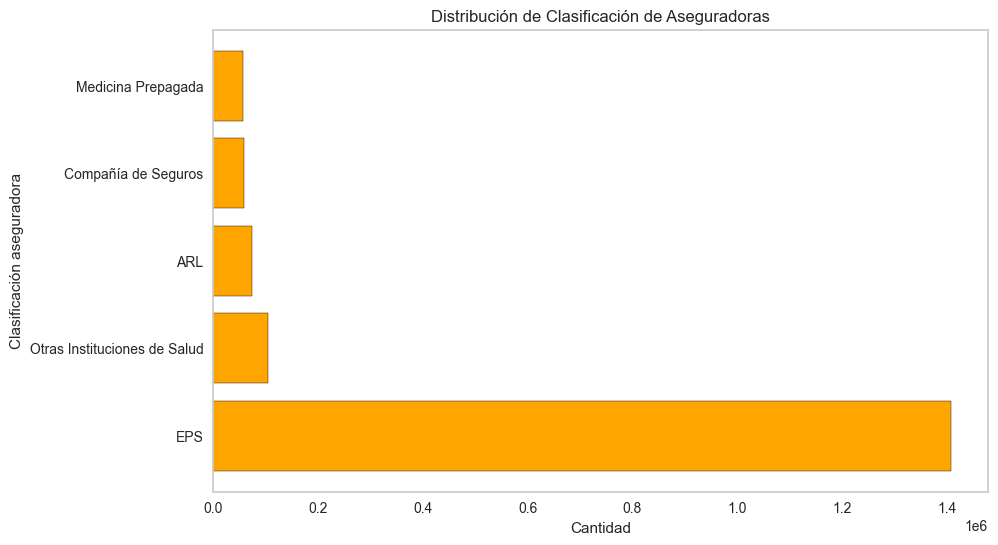

In [ ]:
import matplotlib.pyplot as plt

# Obtener los conteos
df = Preprocess_df_eps2['Clasificación aseguradora'].value_counts().reset_index()
df.columns = ['Clasificación aseguradora', 'Cantidad']

# Crear la gráfica de barras horizontal
plt.figure(figsize=(10, 6))
plt.barh(df["Clasificación aseguradora"], df["Cantidad"], color='orange', edgecolor='black')
plt.xlabel("Cantidad")
plt.ylabel("Clasificación aseguradora")
plt.title("Distribución de Clasificación de Aseguradoras")

# Eliminar las líneas de cuadrícula
plt.grid(False)

# Mostrar la gráfica
plt.show()




### Tipo Usuario

In [ ]:
Preprocess_df['TipoUsuario'].value_counts()

TipoUsuario
1    735376
2    486384
5    235672
3     70863
4     27537
7       859
6       414
8       182
Name: count, dtype: int64

In [ ]:
dic_tipo_usuario = {1:'Régimen Contributivo', 2:'Régimen Subsidiado', 3:'Vinculado/particular', 4:'Vinculado/particular',
                    5:'Otro', 6:'Victima (Contributivo/Subsidiado/No Asegurado)', 7:'Victima (Contributivo/Subsidiado/No Asegurado)', 8:'Victima (Contributivo/Subsidiado/No Asegurado)'}

Preprocess_df['TpoUsuario_nuevo'] = Preprocess_df['TipoUsuario'].map(dic_tipo_usuario)

In [ ]:
Preprocess_df['TpoUsuario_nuevo'].value_counts()

TpoUsuario_nuevo
Régimen Contributivo                              735376
Régimen Subsidiado                                486384
Otro                                              235672
Vinculado/particular                               98400
Victima (Contributivo/Subsidiado/No Asegurado)      1455
Name: count, dtype: int64

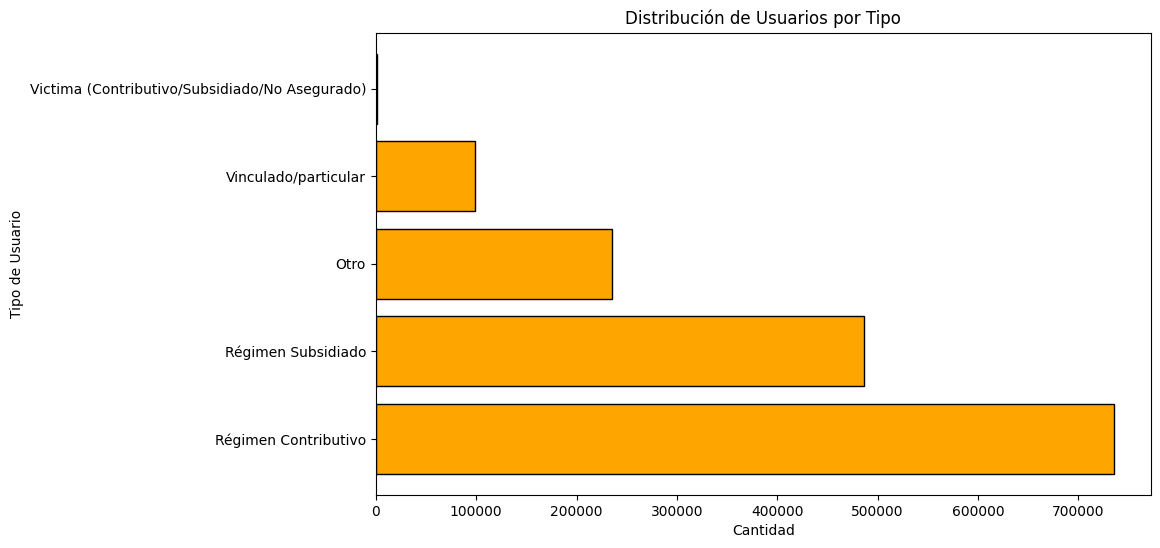

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Datos
data = {
    'TpoUsuario_nuevo': [
        'Régimen Contributivo', 'Régimen Subsidiado', 'Otro', 
        'Vinculado/particular', 'Victima (Contributivo/Subsidiado/No Asegurado)'
    ],
    'count': [735376, 486384, 235672, 98400, 1455]
}

df = pd.DataFrame(data)

# Gráfico de barras horizontal
plt.figure(figsize=(10, 6))
plt.barh(df['TpoUsuario_nuevo'], df['count'], color='orange', edgecolor='black')
plt.xlabel('Cantidad')
plt.ylabel('Tipo de Usuario')
plt.title('Distribución de Usuarios por Tipo')
plt.show()


### ZonaResidencia

In [ ]:
Preprocess_df.ZonaResidencia.value_counts()

ZonaResidencia
U       1509961
R         47321
\"\"          5
Name: count, dtype: int64

In [ ]:
Preprocess_df = Preprocess_df[(Preprocess_df['ZonaResidencia'] == 'U') | (Preprocess_df['ZonaResidencia'] == 'R')]
Preprocess_df.ZonaResidencia.value_counts()

ZonaResidencia
U    1509961
R      47321
Name: count, dtype: int64

### 'FechaIngreso' y 'HoraIngreso'

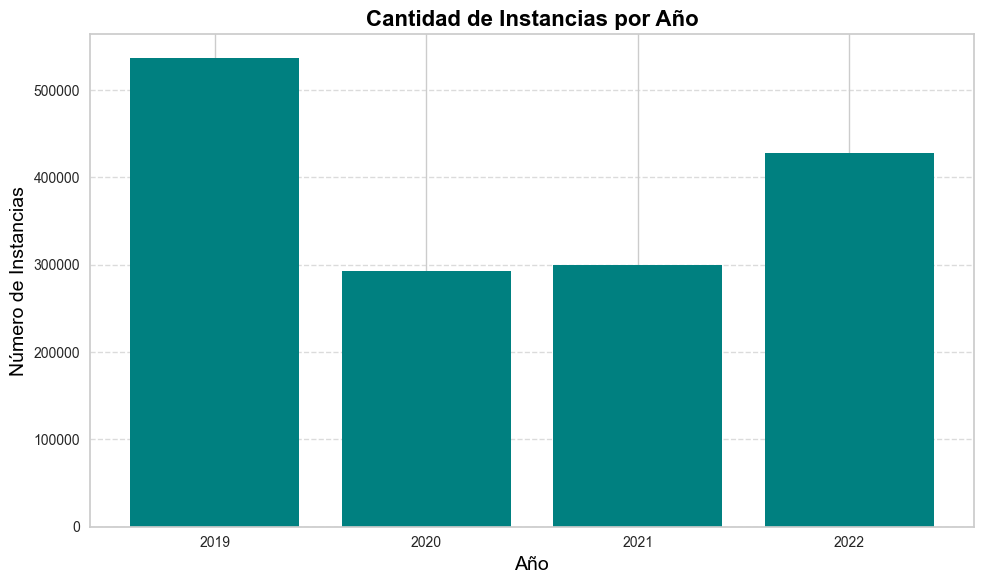

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Convertir 'FechaIngreso' a datetime
Preprocess_df['FechaIngreso'] = pd.to_datetime(Preprocess_df['FechaIngreso'], errors='coerce')

# Extraer el año de 'FechaIngreso'
Preprocess_df['Año'] = Preprocess_df['FechaIngreso'].dt.year

# Agrupar por año y contar el número de instancias
instancias_por_ano = Preprocess_df.groupby('Año').size().reset_index(name='Cantidad de Instancias')

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(10, 6))

# Crear el gráfico de barras
ax.bar(instancias_por_ano['Año'], instancias_por_ano['Cantidad de Instancias'], color='teal')

# Agregar un título y etiquetas con un estilo profesional
ax.set_title('Cantidad de Instancias por Año', fontsize=16, fontweight='bold', color='black')
ax.set_xlabel('Año', fontsize=14, color='black')
ax.set_ylabel('Número de Instancias', fontsize=14, color='black')

# Mejorar la legibilidad de las etiquetas del eje X (rotación a 90 grados)
ax.tick_params(axis='x', rotation=0)

# Asegurarse de que el eje X muestre solo valores enteros (años)
ax.set_xticks(instancias_por_ano['Año'])
ax.set_xticklabels(instancias_por_ano['Año'].astype(int))

# Agregar líneas de cuadrícula y ajustar el estilo
ax.grid(True, axis='y', linestyle='--', alpha=0.7)

# Ajustar los márgenes para que el título y las etiquetas no se corten
plt.tight_layout()

# Mostrar el gráfico
plt.show()




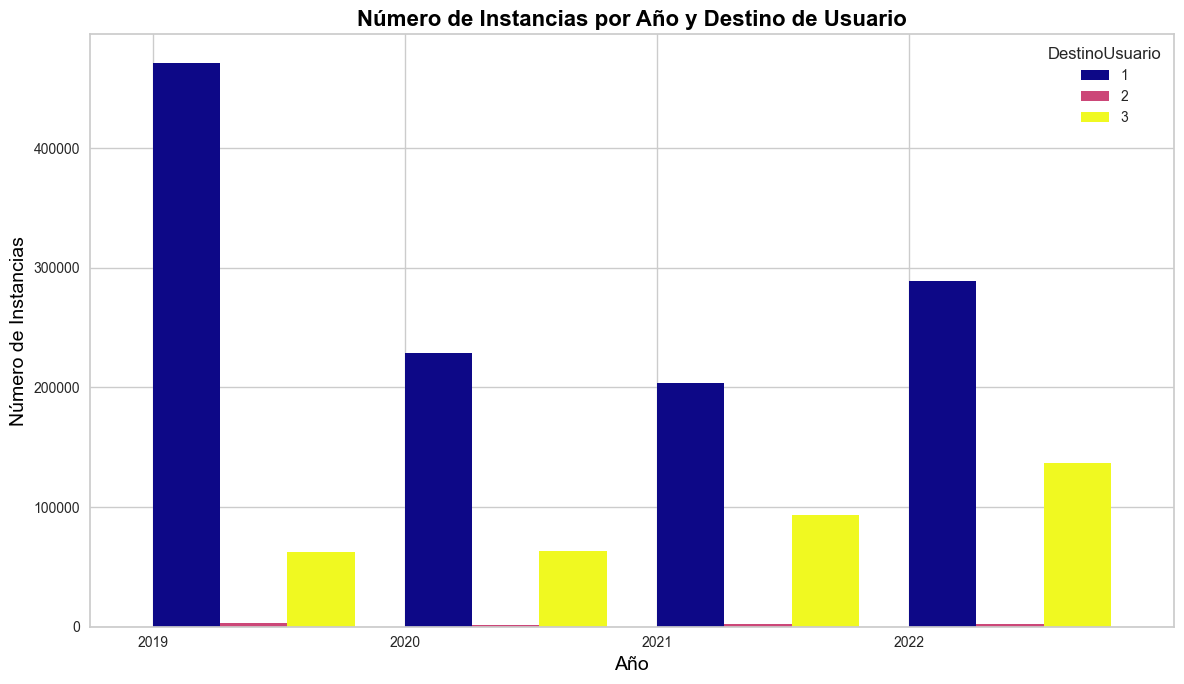

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Convertir 'FechaIngreso' a datetime
Preprocess_df['FechaIngreso'] = pd.to_datetime(Preprocess_df['FechaIngreso'], errors='coerce')

# Extraer el año de 'FechaIngreso'
Preprocess_df['Año'] = Preprocess_df['FechaIngreso'].dt.year

# Agrupar por año y destino de usuario, contando las instancias
destino_usuario_por_ano = Preprocess_df.groupby(['Año', 'DestinoUsuario']).size().unstack(fill_value=0)

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(12, 7))

# Crear el gráfico de barras (sin apilar) con una paleta de colores diferente
destino_usuario_por_ano.plot(kind='bar', ax=ax, width=0.8, cmap='plasma', position=0)

# Agregar un título y etiquetas
ax.set_title('Número de Instancias por Año y Destino de Usuario', fontsize=16, fontweight='bold', color='black')
ax.set_xlabel('Año', fontsize=14, color='black')
ax.set_ylabel('Número de Instancias', fontsize=14, color='black')

# Mejorar la legibilidad de las etiquetas del eje X (rotación a 90 grados)
ax.tick_params(axis='x', rotation=0)

# Ajustar el espacio entre las barras para que se vea más claro
plt.tight_layout()

# Mostrar el gráfico
plt.show()


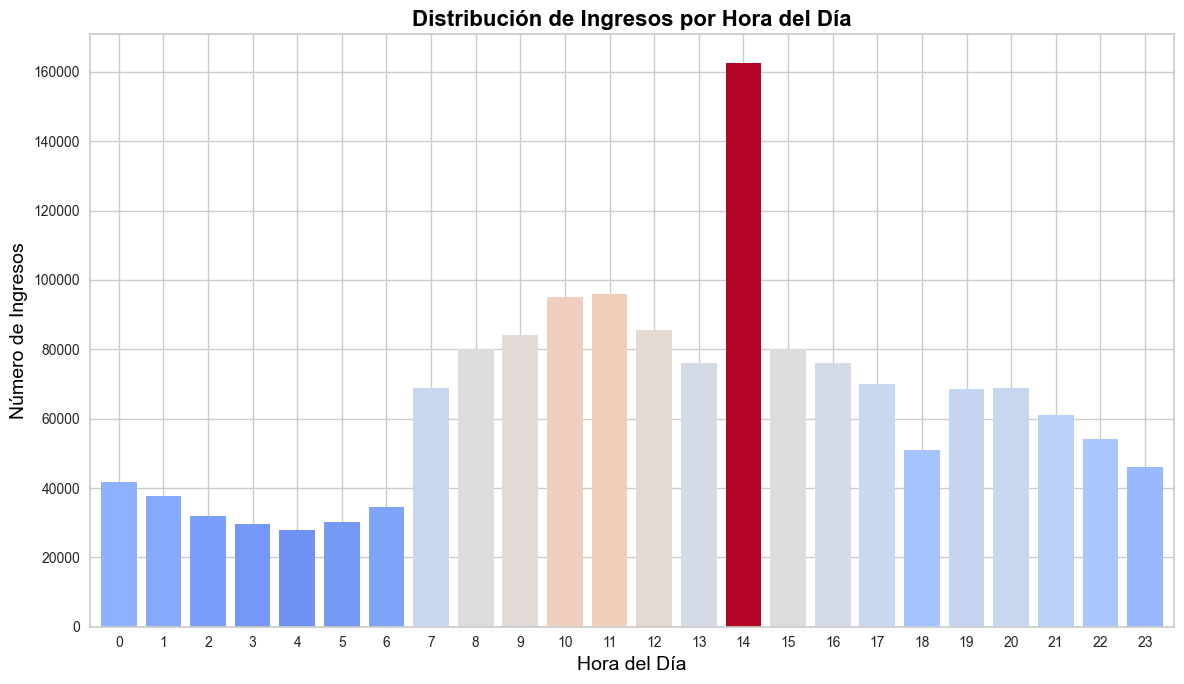

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Convertir 'HoraIngreso' a formato datetime y extraer la hora
Preprocess_df['HoraIngreso'] = pd.to_datetime(Preprocess_df['HoraIngreso'], errors='coerce')
Preprocess_df['Hora'] = Preprocess_df['HoraIngreso'].dt.hour

# Agrupar por hora y contar las instancias
ingresos_por_hora = Preprocess_df.groupby('Hora').size()

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(12, 7))

# Crear el gráfico de barras con una paleta de colores diferente
ingresos_por_hora.plot(kind='bar', ax=ax, color=plt.cm.coolwarm(ingresos_por_hora / max(ingresos_por_hora)), width=0.8)

# Agregar un título y etiquetas
ax.set_title('Distribución de Ingresos por Hora del Día', fontsize=16, fontweight='bold', color='black')
ax.set_xlabel('Hora del Día', fontsize=14, color='black')
ax.set_ylabel('Número de Ingresos', fontsize=14, color='black')

# Mejorar la legibilidad de las etiquetas del eje X (rotación a 0 grados para horas)
ax.tick_params(axis='x', rotation=0)

# Ajustar el espacio entre las barras
plt.tight_layout()

# Mostrar el gráfico
plt.show()


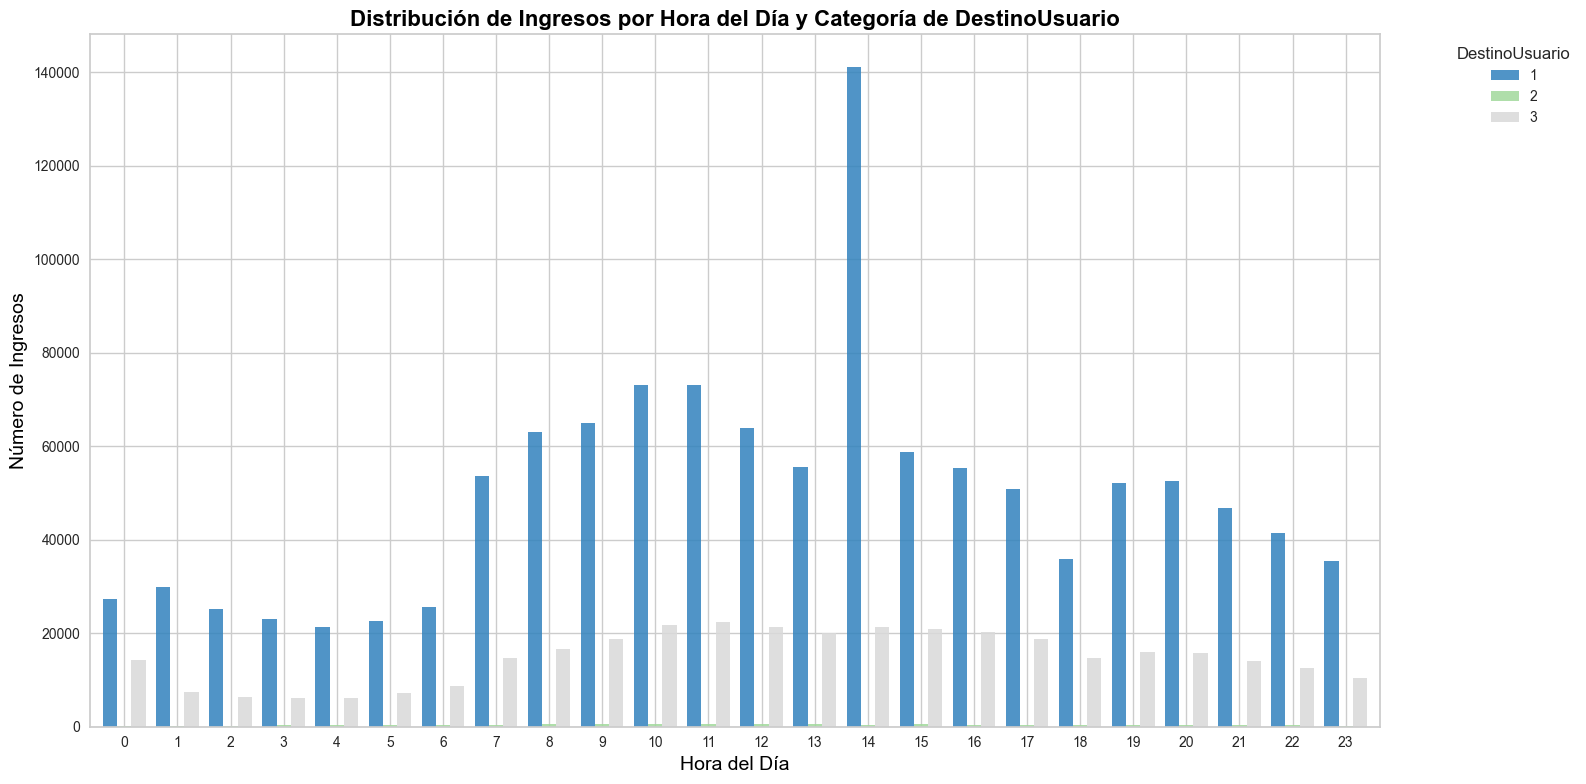

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Convertir 'HoraIngreso' a formato datetime y extraer la hora
Preprocess_df['HoraIngreso'] = pd.to_datetime(Preprocess_df['HoraIngreso'], errors='coerce')
Preprocess_df['Hora'] = Preprocess_df['HoraIngreso'].dt.hour

# Agrupar por hora y categoría de 'DestinoUsuario' y contar instancias
ingresos_por_hora_categoria = Preprocess_df.groupby(['Hora', 'DestinoUsuario']).size().unstack(fill_value=0)

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(16, 8))

# Crear un gráfico de barras agrupadas
ingresos_por_hora_categoria.plot(kind='bar', ax=ax, width=0.8, colormap='tab20c', alpha=0.85)

# Agregar título y etiquetas
ax.set_title('Distribución de Ingresos por Hora del Día y Categoría de DestinoUsuario', fontsize=16, fontweight='bold', color='black')
ax.set_xlabel('Hora del Día', fontsize=14, color='black')
ax.set_ylabel('Número de Ingresos', fontsize=14, color='black')

# Rotar las etiquetas del eje X
ax.tick_params(axis='x', rotation=0)

# Agregar una leyenda bien posicionada
ax.legend(title='DestinoUsuario', bbox_to_anchor=(1.05, 1), loc='upper left')

# Ajustar el diseño para evitar superposición
plt.tight_layout()

# Mostrar el gráfico
plt.show()

### HoraSalida

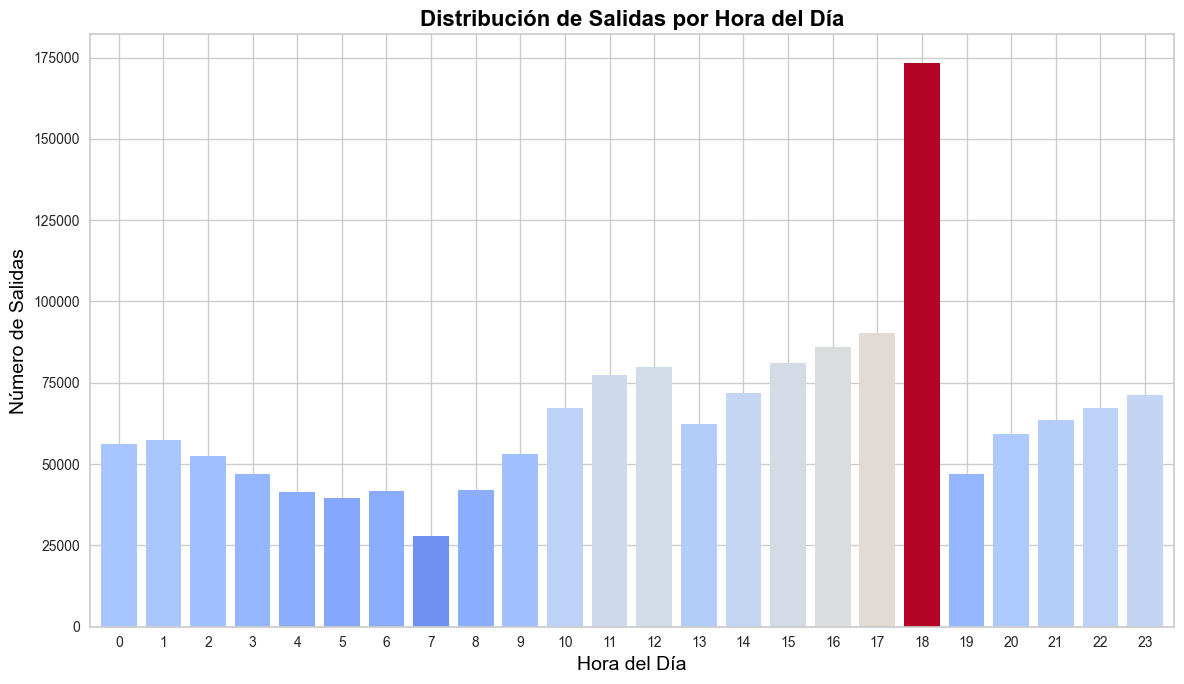

In [ ]:
# Convertir 'HoraSalida' a formato datetime y extraer la hora
Preprocess_df['HoraSalida'] = pd.to_datetime(Preprocess_df['HoraSalida'], errors='coerce')
Preprocess_df['HoraSalidaHora'] = Preprocess_df['HoraSalida'].dt.hour

# Agrupar por hora y contar las instancias
salidas_por_hora = Preprocess_df.groupby('HoraSalidaHora').size()

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(12, 7))

# Crear el gráfico de barras con una paleta de colores diferente
salidas_por_hora.plot(kind='bar', ax=ax, color=plt.cm.coolwarm(salidas_por_hora / max(salidas_por_hora)), width=0.8)

# Agregar un título y etiquetas
ax.set_title('Distribución de Salidas por Hora del Día', fontsize=16, fontweight='bold', color='black')
ax.set_xlabel('Hora del Día', fontsize=14, color='black')
ax.set_ylabel('Número de Salidas', fontsize=14, color='black')

# Mejorar la legibilidad de las etiquetas del eje X (rotación a 0 grados para horas)
ax.tick_params(axis='x', rotation=0)

# Ajustar el espacio entre las barras
plt.tight_layout()

# Mostrar el gráfico
plt.show()


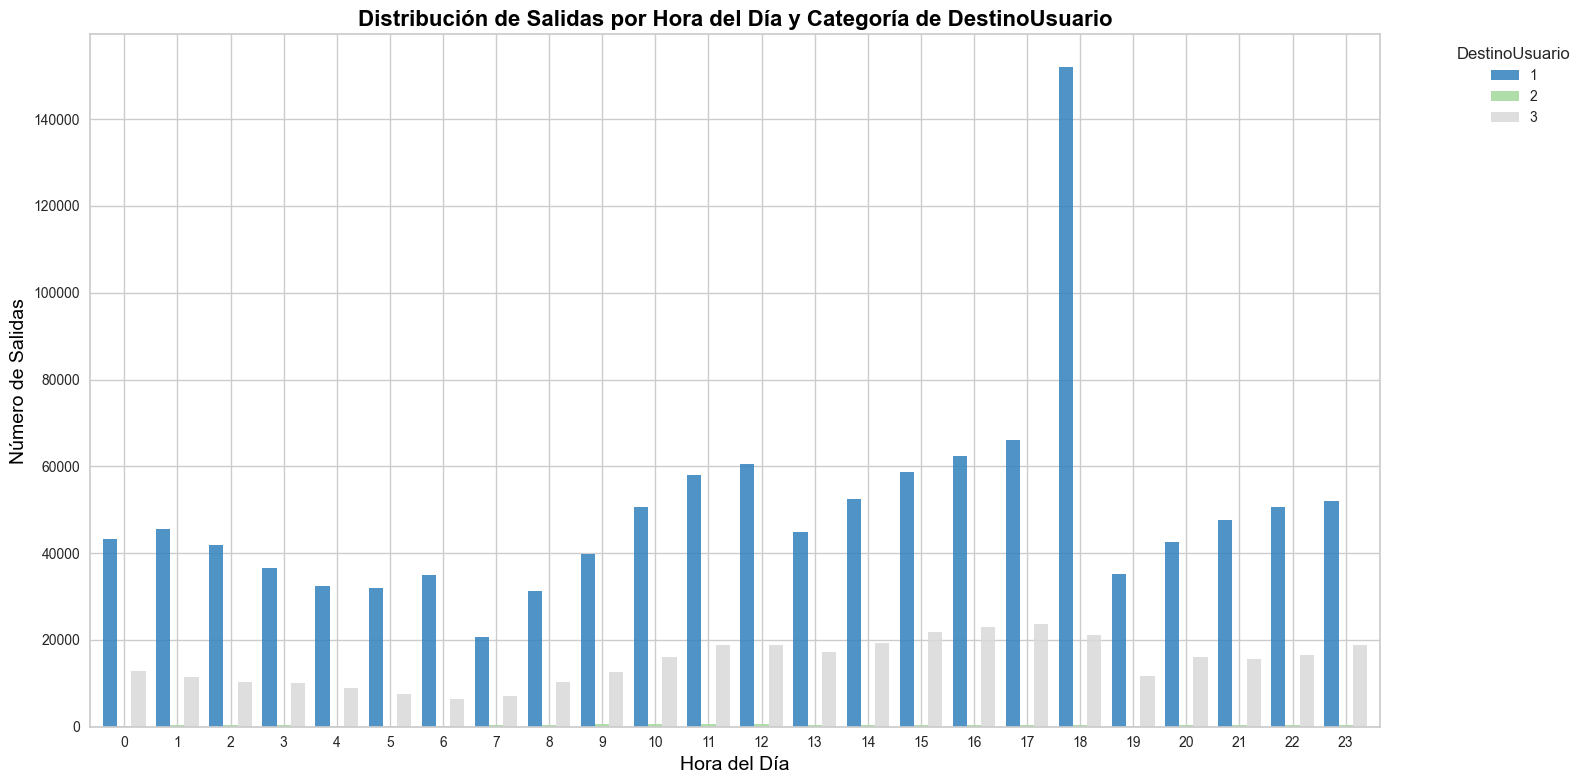

In [ ]:
# Convertir 'HoraSalida' a formato datetime y extraer la hora
Preprocess_df['HoraSalida'] = pd.to_datetime(Preprocess_df['HoraSalida'], errors='coerce')
Preprocess_df['HoraSalidaHora'] = Preprocess_df['HoraSalida'].dt.hour

# Agrupar por hora y categoría de 'DestinoUsuario' y contar instancias
salidas_por_hora_categoria = Preprocess_df.groupby(['HoraSalidaHora', 'DestinoUsuario']).size().unstack(fill_value=0)

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(16, 8))

# Crear un gráfico de barras agrupadas
salidas_por_hora_categoria.plot(kind='bar', ax=ax, width=0.8, colormap='tab20c', alpha=0.85)

# Agregar título y etiquetas
ax.set_title('Distribución de Salidas por Hora del Día y Categoría de DestinoUsuario', fontsize=16, fontweight='bold', color='black')
ax.set_xlabel('Hora del Día', fontsize=14, color='black')
ax.set_ylabel('Número de Salidas', fontsize=14, color='black')

# Rotar las etiquetas del eje X
ax.tick_params(axis='x', rotation=0)

# Agregar una leyenda bien posicionada
ax.legend(title='DestinoUsuario', bbox_to_anchor=(1.05, 1), loc='upper left')

# Ajustar el diseño para evitar superposición
plt.tight_layout()

# Mostrar el gráfico
plt.show()

## Nuevas características

### TiempoDeEstancia horas

In [ ]:
# Asegurar que las columnas sean de tipo datetime
Preprocess_df['HoraIngreso'] = pd.to_datetime(Preprocess_df['HoraIngreso'], errors='coerce')
Preprocess_df['HoraSalida'] = pd.to_datetime(Preprocess_df['HoraSalida'], errors='coerce')

# Crear la nueva columna "Tiempo de Estancia"
Preprocess_df['TiempoDeEstancia horas'] = (Preprocess_df['HoraSalida'] - Preprocess_df['HoraIngreso']).dt.total_seconds() / 3600

# Inspeccionar el resultado
Preprocess_df[['HoraIngreso', 'HoraSalida', 'TiempoDeEstancia horas']].head()


HoraIngreso          HoraSalida  TiempoDeEstancia horas
0 2025-02-01 23:38:00 2025-02-01 13:55:00               -9.716667
1 2025-02-01 05:17:00 2025-02-01 07:33:00                2.266667
2 2025-02-01 07:29:00 2025-02-01 11:25:00                3.933333
3 2025-02-01 12:47:00 2025-02-01 03:56:00               -8.850000
4 2025-02-01 09:16:00 2025-02-01 10:00:00                0.733333

In [ ]:
Preprocess_df.isnull().sum()

NumeroFactura                                    0
Ano                                              0
FechaIngreso                                     0
HoraIngreso                                      0
FechaSalida                                      0
HoraSalida                                       0
cod_unificado                                    0
CodigoPrestador                                  0
Nombre prestador                                 0
Prestador:publica/privada                        0
Tipo Prestador                                   0
CodMunicipio                                     0
Municipio                                        0
Clasifiación casos municipio                     0
CodDepto                                         0
Departamento                                     0
Region_departamento                              0
Cobertura servicios básicos departamento         0
CausaExterna                                     0
CodigoDiagnosticoPrincipalSalid

In [ ]:
# Contar los valores negativos en la columna "TiempoDeEstancia"
valores_negativos = Preprocess_df[Preprocess_df['TiempoDeEstancia horas'] < 0].shape[0]

print(f"Cantidad de valores negativos en 'TiempoDeEstancia': {valores_negativos}")


Cantidad de valores negativos en 'TiempoDeEstancia': 341460


In [ ]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np

# Filtrar las filas con valores negativos en "TiempoDeEstancia"
negativos = Preprocess_df['TiempoDeEstancia horas'] < 0

# Seleccionar las columnas relevantes para la imputación
columnas_relevantes = [
    'CodigoPrestador', 'HoraIngreso', 
    'CausaExterna', 'CodigoDiagnosticoPrincipalSalida', 
    'DestinoUsuario', 'EstadoSalida', 'TipoUsuario', 
    'Edad', 'Sexo', 'CodMunicipio', 'TiempoDeEstancia horas'
]

# Crear un DataFrame solo con las columnas relevantes
df_knn = Preprocess_df[columnas_relevantes].copy()

# Convertir variables categóricas a numéricas usando LabelEncoder
label_encoders = {}
for col in ['CodigoPrestador', 'CausaExterna', 'CodigoDiagnosticoPrincipalSalida', 
            'DestinoUsuario', 'EstadoSalida', 'TipoUsuario', 'Sexo', 'CodMunicipio']:
    le = LabelEncoder()
    df_knn[col] = le.fit_transform(df_knn[col].astype(str))
    label_encoders[col] = le

# Convertir 'HoraIngreso' a hora militar para usarla como una variable numérica
df_knn['HoraIngreso'] = pd.to_datetime(df_knn['HoraIngreso']).dt.hour

# Reemplazar explícitamente los valores negativos por NaN
Preprocess_df.loc[negativos, 'TiempoDeEstancia horas'] = np.nan

# Aplicar KNN Imputer para imputar los valores faltantes
imputer = KNNImputer(n_neighbors=5)
df_knn_imputed = imputer.fit_transform(df_knn)

# Convertir el resultado imputado de nuevo a DataFrame
df_knn_imputed = pd.DataFrame(df_knn_imputed, columns=columnas_relevantes)

# Reemplazar los valores imputados en el DataFrame original
Preprocess_df['TiempoDeEstancia horas'] = df_knn_imputed['TiempoDeEstancia horas']

# Asegurarnos de que no hay valores negativos después de la imputación
Preprocess_df['TiempoDeEstancia horas'] = Preprocess_df['TiempoDeEstancia horas'].apply(lambda x: max(x, 0))

# Verificar los resultados
print("Valores imputados correctamente. Resumen de 'TiempoDeEstancia horas' después de imputación:")
print(Preprocess_df['TiempoDeEstancia horas'].describe())


Valores imputados correctamente. Resumen de 'TiempoDeEstancia horas' después de imputación:
count    1.557277e+06
mean     2.971454e+00
std      3.384652e+00
min      0.000000e+00
25%      0.000000e+00
50%      2.150000e+00
75%      4.300000e+00
max      2.391667e+01
Name: TiempoDeEstancia horas, dtype: float64


In [ ]:
# Contar los valores negativos en la columna "TiempoDeEstancia"
valores_negativos = Preprocess_df[Preprocess_df['TiempoDeEstancia horas'] < 0].shape[0]

print(f"Cantidad de valores negativos en 'TiempoDeEstancia horas': {valores_negativos}")

Cantidad de valores negativos en 'TiempoDeEstancia horas': 0


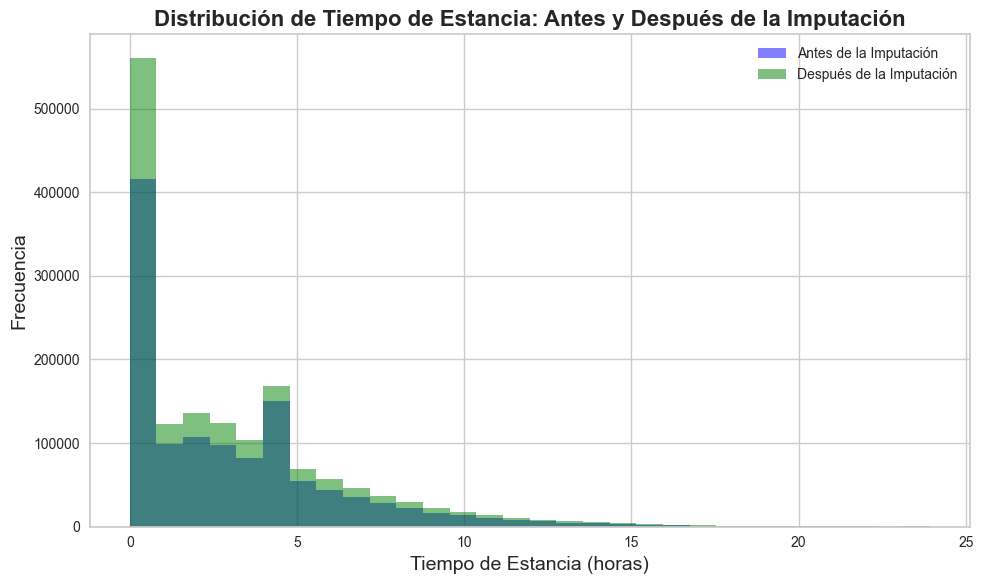

In [ ]:
# Filtrar los valores negativos en "TiempoDeEstancia horas" para no incluirlos en el antes
pre_imputacion = Preprocess_df['TiempoDeEstancia horas'].copy()
pre_imputacion[negativos] = np.nan  # Reemplazar los negativos por NaN

# Crear el gráfico
plt.figure(figsize=(10, 6))

# Histograma de 'TiempoDeEstancia horas' antes de la imputación (sin negativos)
plt.hist(pre_imputacion.dropna(), bins=30, alpha=0.5, label='Antes de la Imputación', color='blue')

# Histograma de 'TiempoDeEstancia horas' después de la imputación
plt.hist(Preprocess_df['TiempoDeEstancia horas'].dropna(), bins=30, alpha=0.5, label='Después de la Imputación', color='green')

# Agregar título y etiquetas
plt.title('Distribución de Tiempo de Estancia: Antes y Después de la Imputación', fontsize=16, fontweight='bold')
plt.xlabel('Tiempo de Estancia (horas)', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)

# Agregar leyenda
plt.legend()

# Mejorar la presentación del gráfico
plt.tight_layout()

# Mostrar el gráfico
plt.show()

In [ ]:
Preprocess_df.isnull().sum()

NumeroFactura                                    0
Ano                                              0
FechaIngreso                                     0
HoraIngreso                                      0
FechaSalida                                      0
HoraSalida                                       0
cod_unificado                                    0
CodigoPrestador                                  0
Nombre prestador                                 0
Prestador:publica/privada                        0
Tipo Prestador                                   0
CodMunicipio                                     0
Municipio                                        0
Clasifiación casos municipio                     0
CodDepto                                         0
Departamento                                     0
Region_departamento                              0
Cobertura servicios básicos departamento         0
CausaExterna                                     0
CodigoDiagnosticoPrincipalSalid

In [ ]:
Preprocess_df = Preprocess_df.dropna(subset=['TiempoDeEstancia horas'])

In [ ]:
Preprocess_df.isnull().sum()

NumeroFactura                                    0
Ano                                              0
FechaIngreso                                     0
HoraIngreso                                      0
FechaSalida                                      0
HoraSalida                                       0
cod_unificado                                    0
CodigoPrestador                                  0
Nombre prestador                                 0
Prestador:publica/privada                        0
Tipo Prestador                                   0
CodMunicipio                                     0
Municipio                                        0
Clasifiación casos municipio                     0
CodDepto                                         0
Departamento                                     0
Region_departamento                              0
Cobertura servicios básicos departamento         0
CausaExterna                                     0
CodigoDiagnosticoPrincipalSalid

### Es festivo(S/N)

In [ ]:
# Asegúrate de que la columna 'FechaIngreso' esté en el DataFrame y tenga formato datetime
Preprocess_df['FechaIngreso'] = pd.to_datetime(Preprocess_df['FechaIngreso'])

# Crear un calendario de festivos en Colombia
colombian_holidays = holidays.Colombia(years=Preprocess_df['FechaIngreso'].dt.year.unique())

# Crear la nueva variable 'Es festivo (S/N)'
Preprocess_df['Es festivo (S/N)'] = Preprocess_df['FechaIngreso'].apply(lambda x: 'S' if x in colombian_holidays else 'N')

# Verificar el resultado
Preprocess_df[['FechaIngreso', 'Es festivo (S/N)']]

FechaIngreso Es festivo (S/N)
0         2019-12-26                N
1         2019-12-21                N
2         2019-12-23                N
3         2019-12-29                N
4         2019-12-29                N
...              ...              ...
1557277   2021-04-06                N
1557278   2021-04-13                N
1557279   2021-04-13                N
1557280   2021-04-07                N
1557281   2021-04-10                N

[1557277 rows x 2 columns]

In [ ]:
Preprocess_df['Es festivo (S/N)'].value_counts()

Es festivo (S/N)
N    1492176
S      65101
Name: count, dtype: int64

In [ ]:
Preprocess_df.isnull().sum()

NumeroFactura                                    0
Ano                                              0
FechaIngreso                                     0
HoraIngreso                                      0
FechaSalida                                      0
HoraSalida                                       0
cod_unificado                                    0
CodigoPrestador                                  0
Nombre prestador                                 0
Prestador:publica/privada                        0
Tipo Prestador                                   0
CodMunicipio                                     0
Municipio                                        0
Clasifiación casos municipio                     0
CodDepto                                         0
Departamento                                     0
Region_departamento                              0
Cobertura servicios básicos departamento         0
CausaExterna                                     0
CodigoDiagnosticoPrincipalSalid

### Es víspera (S/N)

In [ ]:
# Asegúrate de que la columna 'FechaIngreso' esté en el DataFrame y tenga formato datetime
Preprocess_df['FechaIngreso'] = pd.to_datetime(Preprocess_df['FechaIngreso'])

# Identificar si es víspera de festivo
def is_eve_of_important_date(date):
    next_day = date + timedelta(days=1)
    return 'S' if next_day in colombian_holidays else 'N'

# Crear la nueva columna 'Es víspera (S/N)'
Preprocess_df['Es víspera (S/N)'] = Preprocess_df['FechaIngreso'].apply(is_eve_of_important_date)

# Verificar el resultado
Preprocess_df[['FechaIngreso', 'Es festivo (S/N)', 'Es víspera (S/N)']]


FechaIngreso Es festivo (S/N) Es víspera (S/N)
0         2019-12-26                N                N
1         2019-12-21                N                N
2         2019-12-23                N                N
3         2019-12-29                N                N
4         2019-12-29                N                N
...              ...              ...              ...
1557277   2021-04-06                N                N
1557278   2021-04-13                N                N
1557279   2021-04-13                N                N
1557280   2021-04-07                N                N
1557281   2021-04-10                N                N

[1557277 rows x 3 columns]

In [ ]:
Preprocess_df['Es víspera (S/N)'].value_counts()

Es víspera (S/N)
N    1493037
S      64240
Name: count, dtype: int64

In [ ]:
Preprocess_df.isnull().sum()

NumeroFactura                                    0
Ano                                              0
FechaIngreso                                     0
HoraIngreso                                      0
FechaSalida                                      0
HoraSalida                                       0
cod_unificado                                    0
CodigoPrestador                                  0
Nombre prestador                                 0
Prestador:publica/privada                        0
Tipo Prestador                                   0
CodMunicipio                                     0
Municipio                                        0
Clasifiación casos municipio                     0
CodDepto                                         0
Departamento                                     0
Region_departamento                              0
Cobertura servicios básicos departamento         0
CausaExterna                                     0
CodigoDiagnosticoPrincipalSalid

### Día Laborable

In [ ]:
# Identificar si es un día laborable
def is_working_day(date):
    # Verificar si es festivo o domingo
    if date.weekday() == 6 or date in colombian_holidays:  # 6 es domingo
        return 'N'  # No es laborable
    return 'S'  # Es laborable

# Crear la nueva columna 'Día Laborable'
Preprocess_df['Día Laborable'] = Preprocess_df['FechaIngreso'].apply(is_working_day)

# Verificar el resultado
Preprocess_df[['FechaIngreso', 'Es festivo (S/N)', 'Día Laborable']]

FechaIngreso Es festivo (S/N) Día Laborable
0         2019-12-26                N             S
1         2019-12-21                N             S
2         2019-12-23                N             S
3         2019-12-29                N             N
4         2019-12-29                N             N
...              ...              ...           ...
1557277   2021-04-06                N             S
1557278   2021-04-13                N             S
1557279   2021-04-13                N             S
1557280   2021-04-07                N             S
1557281   2021-04-10                N             S

[1557277 rows x 3 columns]

In [ ]:
Preprocess_df['Día Laborable'].value_counts()

Día Laborable
S    1306709
N     250568
Name: count, dtype: int64

In [ ]:
Preprocess_df.isnull().sum()

NumeroFactura                                    0
Ano                                              0
FechaIngreso                                     0
HoraIngreso                                      0
FechaSalida                                      0
HoraSalida                                       0
cod_unificado                                    0
CodigoPrestador                                  0
Nombre prestador                                 0
Prestador:publica/privada                        0
Tipo Prestador                                   0
CodMunicipio                                     0
Municipio                                        0
Clasifiación casos municipio                     0
CodDepto                                         0
Departamento                                     0
Region_departamento                              0
Cobertura servicios básicos departamento         0
CausaExterna                                     0
CodigoDiagnosticoPrincipalSalid

In [ ]:
# Asegúrate de que la columna 'FechaIngreso' sea de tipo datetime
Preprocess_df['FechaIngreso'] = pd.to_datetime(Preprocess_df['FechaIngreso'])

# Crear nuevas columnas para el día de la semana y el mes
Preprocess_df['Día de la semana'] = Preprocess_df['FechaIngreso'].dt.day_name()  # Nombre del día
Preprocess_df['Mes'] = Preprocess_df['FechaIngreso'].dt.month_name()  # Nombre del mes

# Verificar el resultado
Preprocess_df[['FechaIngreso', 'Día de la semana', 'Mes']]

FechaIngreso Día de la semana       Mes
0         2019-12-26         Thursday  December
1         2019-12-21         Saturday  December
2         2019-12-23           Monday  December
3         2019-12-29           Sunday  December
4         2019-12-29           Sunday  December
...              ...              ...       ...
1557277   2021-04-06          Tuesday     April
1557278   2021-04-13          Tuesday     April
1557279   2021-04-13          Tuesday     April
1557280   2021-04-07        Wednesday     April
1557281   2021-04-10         Saturday     April

[1557277 rows x 3 columns]

In [ ]:
Preprocess_df.isnull().sum()

NumeroFactura                                    0
Ano                                              0
FechaIngreso                                     0
HoraIngreso                                      0
FechaSalida                                      0
HoraSalida                                       0
cod_unificado                                    0
CodigoPrestador                                  0
Nombre prestador                                 0
Prestador:publica/privada                        0
Tipo Prestador                                   0
CodMunicipio                                     0
Municipio                                        0
Clasifiación casos municipio                     0
CodDepto                                         0
Departamento                                     0
Region_departamento                              0
Cobertura servicios básicos departamento         0
CausaExterna                                     0
CodigoDiagnosticoPrincipalSalid

### Rango horario

In [ ]:
Preprocess_df.HoraIngreso

0         2025-02-01 23:38:00
1         2025-02-01 05:17:00
2         2025-02-01 07:29:00
3         2025-02-01 12:47:00
4         2025-02-01 09:16:00
                  ...        
1557277   2025-02-01 08:30:00
1557278   2025-02-01 09:31:00
1557279   2025-02-01 09:31:00
1557280   2025-02-01 19:32:00
1557281   2025-02-01 15:06:00
Name: HoraIngreso, Length: 1557277, dtype: datetime64[ns]

In [ ]:
# Convertir las columnas 'HoraIngreso' y 'HoraSalidaHora' a formato datetime (si no lo están)
Preprocess_df['HoraIngreso'] = pd.to_datetime(Preprocess_df['HoraIngreso'], format='%H:%M:%S', errors='coerce')
Preprocess_df['HoraSalida'] = pd.to_datetime(Preprocess_df['HoraSalida'], format='%H:%M:%S', errors='coerce')

# Crear función para clasificar el rango horario
def rango_horario(datetime_obj):
    if pd.isna(datetime_obj):  # Manejar valores nulos
        return None
    hora = datetime_obj.hour  # Extraer solo la hora
    if 0 <= hora < 6:
        return "Madrugada"
    elif 6 <= hora < 12:
        return "Mañana"
    elif 12 <= hora < 18:
        return "Tarde"
    else:
        return "Noche"

# Aplicar la función a las columnas 'HoraIngreso' y 'HoraSalida'
Preprocess_df['Rango horario ingreso'] = Preprocess_df['HoraIngreso'].apply(rango_horario)
Preprocess_df['Rango horario salida'] = Preprocess_df['HoraSalida'].apply(rango_horario)

# Verificar el resultado
Preprocess_df[['FechaIngreso', 'HoraIngreso', 'Rango horario ingreso', 'HoraSalida', 'Rango horario salida']]


FechaIngreso         HoraIngreso Rango horario ingreso  \
0         2019-12-26 2025-02-01 23:38:00                 Noche   
1         2019-12-21 2025-02-01 05:17:00             Madrugada   
2         2019-12-23 2025-02-01 07:29:00                Mañana   
3         2019-12-29 2025-02-01 12:47:00                 Tarde   
4         2019-12-29 2025-02-01 09:16:00                Mañana   
...              ...                 ...                   ...   
1557277   2021-04-06 2025-02-01 08:30:00                Mañana   
1557278   2021-04-13 2025-02-01 09:31:00                Mañana   
1557279   2021-04-13 2025-02-01 09:31:00                Mañana   
1557280   2021-04-07 2025-02-01 19:32:00                 Noche   
1557281   2021-04-10 2025-02-01 15:06:00                 Tarde   

                 HoraSalida Rango horario salida  
0       2025-02-01 13:55:00                Tarde  
1       2025-02-01 07:33:00               Mañana  
2       2025-02-01 11:25:00               Mañana  
3       2025-02-01 03:56:00            Madrugada  
4       2025-02-01 10:00:00               Mañana  
...                     ...                  ...  
1557277 2025-02-01 10:36:00               Mañana  
1557278 2025-02-01 21:32:00                Noche  
1557279 2025-02-01 21:32:00                Noche  
1557280 2025-02-01 14:47:00                Tarde  
1557281 2025-02-01 01:39:00            Madrugada  

[1557277 rows x 5 columns]

### Día del mes

In [ ]:
Preprocess_df['Día del mes'] = Preprocess_df['FechaIngreso'].dt.day

### Fin de semana (S/N)

In [ ]:
Preprocess_df['Es fin de semana'] = Preprocess_df['FechaIngreso'].dt.weekday.isin([5, 6]).map({True: 'S', False: 'N'})

### Variables relacionadas con la estancia

In [ ]:
def clasificar_estancia(horas):
    if horas < 6:
        return "Corta"
    elif 6 <= horas <= 24:
        return "Media"
    else:
        return "Larga"

Preprocess_df['Clasificación estancia'] = Preprocess_df['TiempoDeEstancia horas'].apply(clasificar_estancia)

### Variables relacionadas con demografía

In [ ]:
def clasificar_edad(edad):
    if edad < 12:
        return "Niño"
    elif 12 <= edad < 18:
        return "Adolescente"
    elif 18 <= edad < 60:
        return "Adulto"
    else:
        return "Adulto Mayor"

Preprocess_df['Grupo etario'] = Preprocess_df['Edad'].apply(clasificar_edad)

### Diagnósticos críticos

In [ ]:
df_CIE_10 = pd.read_excel('data/clasificación CIE10.xlsx')
# Preprocess_df

In [ ]:
Preprocess_df_2 = pd.merge(Preprocess_df, df_CIE_10[['Codigo','ClasificaciónSalida']], how='left', left_on='CodigoDiagnosticoPrincipalSalida', right_on='Codigo')

In [ ]:
Preprocess_df_2.isnull().sum()

NumeroFactura                                    0
Ano                                              0
FechaIngreso                                     0
HoraIngreso                                      0
FechaSalida                                      0
HoraSalida                                       0
cod_unificado                                    0
CodigoPrestador                                  0
Nombre prestador                                 0
Prestador:publica/privada                        0
Tipo Prestador                                   0
CodMunicipio                                     0
Municipio                                        0
Clasifiación casos municipio                     0
CodDepto                                         0
Departamento                                     0
Region_departamento                              0
Cobertura servicios básicos departamento         0
CausaExterna                                     0
CodigoDiagnosticoPrincipalSalid

In [ ]:
codigo_null = Preprocess_df_2[Preprocess_df_2['ClasificaciónSalida'].isna()]

In [ ]:
codigo_null.CodigoDiagnosticoPrincipalSalida.unique()

array(['O60X', 's903', 'R501', 'M725', 'R500', 'X596', 'g459', 'Q314'],
      dtype=object)

In [ ]:
data = {
    'CodigoDiagnosticoPrincipalSalida': ['O60X', 'S903', 's903' , 'R501', 'M725', 'R500', 'X596', 'G459','g459','Q314', 'Z999'],
}

df = pd.DataFrame(data)

# Tabla de relación entre códigos y clasificaciones
relation = {
    'O60X': 'Complicaciones del embarazo',
    'S903': 'Lesiones en la región del tobillo y del pie',
    's903': 'Lesiones en la región del tobillo y del pie',
    'R501': 'Fiebre de origen desconocido',
    'M725': 'Trastornos de tejidos blandos',
    'R500': 'Fiebre de origen desconocido',
    'X596': 'Exposición a fuerzas naturales',
    'G459': 'Enfermedades cerebrovasculares',
    'g459': 'Enfermedades cerebrovasculares',
    'Q314': 'Malformaciones congénitas del sistema respiratorio',
}

# Actualizar la columna 'ClasificaciónSalida' con base en la relación
Preprocess_df_2['ClasificaciónSalida'] = Preprocess_df_2['CodigoDiagnosticoPrincipalSalida'].map(relation).combine_first(Preprocess_df_2['ClasificaciónSalida'])

# # Usar una función lambda para asignar valores según la relación
# Preprocess_df_2['ClasificaciónSalida'] = Preprocess_df_2['CodigoDiagnosticoPrincipalSalida'].apply(
#     lambda x: relation[x] if x in relation else x
# )

In [ ]:
Preprocess_df_2.isnull().sum()

NumeroFactura                                    0
Ano                                              0
FechaIngreso                                     0
HoraIngreso                                      0
FechaSalida                                      0
HoraSalida                                       0
cod_unificado                                    0
CodigoPrestador                                  0
Nombre prestador                                 0
Prestador:publica/privada                        0
Tipo Prestador                                   0
CodMunicipio                                     0
Municipio                                        0
Clasifiación casos municipio                     0
CodDepto                                         0
Departamento                                     0
Region_departamento                              0
Cobertura servicios básicos departamento         0
CausaExterna                                     0
CodigoDiagnosticoPrincipalSalid

In [ ]:
Preprocess_df_2 = Preprocess_df_2.drop(columns=['Codigo'])

In [ ]:
# Crear un listado con las clasificaciones consideradas como "críticas"
clasificaciones_criticas = [
    'Alto riesgo, transmisión internacional', 'Alto riesgo, transmisión alimentaria', 
    'Transmisión alimentaria', 'Enfermedad endémica', 'Enfermedad emergente',
    'Alto riesgo, enfermedad endémica', 'Emergente, alto riesgo', 'Zoonótica, alto riesgo',
    'Alto riesgo, bioterrorismo', 'Enfermedad zoonótica', 'Alto riesgo, mortalidad neonatal',
    'Alto riesgo, mortalidad maternal', 'Alto riesgo', 'Alto riesgo, mortalidad',
    'Alto riesgo, transmisión vertical', 'Enfermedad de transmisión sexual (ETS)',
    'Alto riesgo, enfermedad de transmisión sexual', 'Alto riesgo, ETS', 'ETS',
    'Enfermedad tropical desatendida', 'Enfermedad tropical desatendida, causa de ceguera',
    'Enfermedad zoonótica, alto riesgo', 'Alto riesgo, eliminación global', 
    'Alto riesgo, zoonótica, transmisión internacional', 'Alto riesgo, transmisión por vectores',
    'Enfermedad endémica, transmisión alimentaria', 'Alto riesgo, transmisión por sangre',
    'Enfermedad endémica, transmisión alimentaria o sanguínea', 'Enfermedad crónica, alto riesgo',
    'Alto riesgo, epidemia global', 'Enfermedad endémica, zoonótica', 'Enfermedad endémica, oportunista',
    'Enfermedad oportunista', 'Enfermedad tropical desatendida, alto riesgo',
    'Enfermedad tropical desatendida, en eliminación', 'Emergencia médica (metabólica)',
    'Infección bacteriana grave', 'Emergencia respiratoria', 'Enfermedad cardiovascular grave',
    'Emergencia cardiovascular crítica', 'Enfermedad vascular crítica', 'Enfermedad cerebrovascular grave',
    'Infección respiratoria aguda', 'Enfermedad infecciosa de alto riesgo', 'Emergencia quirúrgica abdominal',
    'Complicación obstétrica grave', 'Muerte materna', 'Muerte fetal', 'Lesión traumática grave'
]

# Crear una nueva columna para indicar si la clasificación es crítica
Preprocess_df_2['ClasificaciónSalidaCrítica'] = Preprocess_df_2['ClasificaciónSalida'].apply(lambda x: 'SI' if x in clasificaciones_criticas else 'NO')

In [ ]:
Preprocess_df_2.head(10)

NumeroFactura   Ano FechaIngreso         HoraIngreso FechaSalida  \
0        288306  2019   2019-12-26 2025-02-01 23:38:00  2019-12-27   
1    4129237242  2019   2019-12-21 2025-02-01 05:17:00  2019-12-21   
2    4129237242  2019   2019-12-23 2025-02-01 07:29:00  2019-12-23   
3    4129237242  2019   2019-12-29 2025-02-01 12:47:00  2019-12-29   
4    4129237242  2019   2019-12-29 2025-02-01 09:16:00  2019-12-29   
5    4129237242  2019   2019-12-20 2025-02-01 04:23:00  2019-12-20   
6      CL375831  2019   2019-12-16 2025-02-01 07:31:00  2019-12-16   
7        275951  2019   2019-11-17 2025-02-01 14:49:00  2019-11-19   
8        275947  2019   2019-11-17 2025-02-01 14:49:00  2019-11-19   
9    4129237242  2019   2019-12-29 2025-02-01 05:36:00  2019-12-29   

           HoraSalida  cod_unificado  CodigoPrestador  \
0 2025-02-01 13:55:00            501      50010217203   
1 2025-02-01 07:33:00            501      50010425930   
2 2025-02-01 11:25:00            501      50010425930   
3 2025-02-01 03:56:00            501      50010425930   
4 2025-02-01 10:00:00            501      50010425930   
5 2025-02-01 06:09:00            801      50010425930   
6 2025-02-01 11:50:00            501      50010909923   
7 2025-02-01 15:54:00            501      50010217203   
8 2025-02-01 15:54:00            501      50010217203   
9 2025-02-01 09:27:00           5088      50010425930   

              Nombre prestador Prestador:publica/privada  ...  \
0   CLINICA MEDELLIN OCCIDENTE              IPS Privadas  ...   
1  IPS SURA LAS VEGAS MEDELLIN              IPS Privadas  ...   
2  IPS SURA LAS VEGAS MEDELLIN              IPS Privadas  ...   
3  IPS SURA LAS VEGAS MEDELLIN              IPS Privadas  ...   
4  IPS SURA LAS VEGAS MEDELLIN              IPS Privadas  ...   
5  IPS SURA LAS VEGAS MEDELLIN              IPS Privadas  ...   
6   CLINICA CENTRAL FUNDADORES              IPS Privadas  ...   
7   CLINICA MEDELLIN OCCIDENTE              IPS Privadas  ...   
8   CLINICA MEDELLIN OCCIDENTE              IPS Privadas  ...   
9  IPS SURA LAS VEGAS MEDELLIN              IPS Privadas  ...   

  Día de la semana       Mes Rango horario ingreso Rango horario salida  \
0         Thursday  December                 Noche                Tarde   
1         Saturday  December             Madrugada               Mañana   
2           Monday  December                Mañana               Mañana   
3           Sunday  December                 Tarde            Madrugada   
4           Sunday  December                Mañana               Mañana   
5           Friday  December             Madrugada               Mañana   
6           Monday  December                Mañana               Mañana   
7           Sunday  November                 Tarde                Tarde   
8           Sunday  November                 Tarde                Tarde   
9           Sunday  December             Madrugada               Mañana   

   Día del mes Es fin de semana Clasificación estancia  Grupo etario  \
0           26                N                  Corta        Adulto   
1           21                S                  Corta        Adulto   
2           23                N                  Corta        Adulto   
3           29                S                  Corta        Adulto   
4           29                S                  Corta        Adulto   
5           20                N                  Corta        Adulto   
6           16                N                  Corta        Adulto   
7           17                S                  Corta  Adulto Mayor   
8           17                S                  Corta  Adulto Mayor   
9           29                S                  Corta        Adulto   

             ClasificaciónSalida ClasificaciónSalidaCrítica  
0        Transmisión alimentaria                         SI  
1    Signos y síntomas generales                         NO  
2             Trastorno urinario                         NO  
3           Lesiones

In [ ]:
Preprocess_df_2.isnull().sum()

NumeroFactura                                    0
Ano                                              0
FechaIngreso                                     0
HoraIngreso                                      0
FechaSalida                                      0
HoraSalida                                       0
cod_unificado                                    0
CodigoPrestador                                  0
Nombre prestador                                 0
Prestador:publica/privada                        0
Tipo Prestador                                   0
CodMunicipio                                     0
Municipio                                        0
Clasifiación casos municipio                     0
CodDepto                                         0
Departamento                                     0
Region_departamento                              0
Cobertura servicios básicos departamento         0
CausaExterna                                     0
CodigoDiagnosticoPrincipalSalid

In [ ]:
Preprocess_df = Preprocess_df_2.copy()

In [ ]:
Preprocess_df.to_csv('data/Preprocess_df_1_exp2.csv', index=False, encoding="utf-8-sig")